# Projet optimisation

## Etude du problème d'optimisation

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import casadi

### Question 1

On cherche à minimiser la fonction coût


$$L(x,y) = K\left(x_{N}- \frac{L}{2}\right)^{2} + dx^{2} \displaystyle\sum_{i=0}^{N}y_{i}^{2}$$


associée au problème de minimisation sous contraintes de la distance quadratique des points à l'axe des abscisses. En effet le terme de gauche est la contrainte 
$c(x,y) = x_{N} - \frac{L}{2}$
tirée de la condition
$x_{N}= \frac{L}{2}$
multipliée par le multiplicateur de Lagrange $K$ associé, le terme de droite est la fonction de $x$ et $y$ à proprement minimiser, en effet c'est la somme des distances des points du tuyau à la droite reliant les points initial et final, respectivement $(x_{0},y_{0})=(0,0)$ et $(x_{N},y_{N})=(\frac{L}{2},0)$.


On voit que si les points s'écartent de ladite droite, la fonction coût croît.

### Question 2

Il est plus aisé de s'imposer comme contrainte $y_{N}=0$ que $x_{N}=\frac{L}{2}$, en effet dans le premier cas une droite telle que 


$$\forall i\in\{0,1,...,N\},\:(x_{i},y_{i})=(idx,0)$$


comme condition initiale suffit, tandis que dans le second cas une condition initiale simple n'est plus évidente.

### Question 3

Soit un arc $\Gamma$ orienté régulier de classe $C^{2}$ dans le plan, représentant le tuyau, paramétré par la fonction
$f : t\in I\subset\mathbb{R}\mapsto(x(t),y(t))\in\mathbb{R}^{2}$ où $I$ est un intervalle de $\mathbb{R}$. On se place dans le repère orthonormé de Frenet
$(M(t)=(x(t),y(t)),\overrightarrow{T}(t),\overrightarrow{N}(t))$
avec


$$
\forall t\in\mathbb{R}, \overrightarrow{T}(t) = \frac{f'(t)}{||f'(t)||}, \overrightarrow{N}(t) = rot_{\frac{\pi}{2}}(\overrightarrow{T}(t))
$$


avec $rot_{\frac{\pi}{2}}$ l'opérateur effectuant une rotation dans le plan de $+\frac{\pi}{2}$ du vecteur pris en argument, et donc

$$
\forall t\in\mathbb{R}, ||\overrightarrow{T}(t)||=||\overrightarrow{N}(t)||=1
$$


On pose $x_{i} = x(i\times dx)$, idem pour $y_{i}$, avec $i\in\{0,1,...,N\}$.
Un développement limité de $x$ en $idx+dx$ au second ordre nous donne :


$$
x_{i+1} \approx x_{i} + x'_{i}dx + \frac{1}{2}x''_{i}dx^2
$$


Avec $x'_{i} = x'(idx)$ et $x''_{i} = x''(idx)$. Idem en $idx-dx$ :


$$
x_{i-1} \approx x_{i} - x'_{i}dx + \frac{1}{2}x''_{i}dx^2
$$


La somme nous donne


$$
x_{i-1}+x_{i-1} \approx 2x_{i}+x''_{i}dx^2
$$


D'où


$$
x''_{i} \approx \frac{x_{i-1}-2x_{i}+x_{i-1}}{dx^{2}}
$$


On procède identiquement avec $y$ et on obtient


$$
y''_{i} \approx \frac{y_{i-1}-2y_{i}+y_{i-1}}{dx^{2}}
$$


Avec la formule


$$
f''(t) = s''(t).\overrightarrow{T}(t) + \gamma(t)s'(t)^{2}.\overrightarrow{N}(t)
$$


Où $s$ est l'abscisse curviligne de $\Gamma$ telle que pour tous points de $\Gamma$ de paramètres $t_{1},t_{2}\in\mathbb{R}, t_{1}<t_{2}$ la longueur d'arc entre ces points vaut :


$$
L_{\Gamma}(t_{1},t_{2}) = s(t_{2})-s(t_{1})
$$


comme l'on a discrétisé la variable $t\in\mathbb{R}$ en $idx$ avec $i\in\{0,1,...,N\}$, on a alors avec les notations évidentes précédentes : $\forall i\in\{0,1,...,N\}$


$$
s_{i}=idx, s_{i}'= \frac{dx}{dx} = 1,s_{i}''=0
$$

D'où l'on tire

$$
f_{i}'' = \gamma_{i}s_{i}'^{2}.\overrightarrow{N_{i}} = \gamma_{i}.\overrightarrow{N_{i}}
$$


En norme :


$$
x_{i}''^{2}+y_{i}''^{2} = \gamma_{i}^{2}
$$


Soit


$$
\left(\frac{x_{i-1}-2x_{i}+x_{i-1}}{dx^{2}}\right)^{2} + \left(\frac{y_{i-1}-2y_{i}+y_{i-1}}{dx^{2}}\right)^{2} \approx \gamma_{i}^{2}
$$


Ainsi la condition de courbure limite se traduit par : $\forall i \in\{0,1,...,n\}$


$$
\gamma_{i}^{2}\leq \gamma^{2}
$$


i.e.


$$
(x_{i-1}-2x_{i}+x_{i-1})^{2}+(y_{i-1}-2y_{i}+y_{i-1})^{2} \leq \gamma^{2} dx^{4}
$$


Donc imposer une courbure limite au tuyau revient géométriquement à contraindre la norme de la dérivée seconde du paramétrage $f$ de $\Gamma$ en chaque point $(x_{i},y_{i})$ où $i\in\{0,1,...,N\}$, et physiquement à faire en sorte que le tuyau ne se torde pas trop afin qu'il ne se rompe pas.

### Question 4

Avec $K\in\mathbb{R_{+}^{*}}$ tel que $K>>dx$, on pose


$$
f : (x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1} \mapsto K\left(x_{N}-\frac{L}{2}\right)^{2}+dx^{2}\displaystyle\sum^{N}_{i=0}y_{i}^{2}\in\mathbb{R}
$$


la fonction à minimiser, puis


$$
c_{eq} : (x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1} \mapsto\: (x_{0},y_{0},y_{N}, (x_{1}-x_{0})^{2} + (y_{1}-y_{0})^{2} - dx^{2},...,(x_{N}-x_{N-1})^{2} + (y_{N}-y_{N-1})^{2} - dx^{2})\in\mathbb{R}^{N+3}
$$


les contraintes égalité, puis


$$
c_{ineq} : (x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1} \mapsto\: ((x_{2}+x_{0}-2x_{1})^{2} + (y_{2}+y_{0}-2y_{1})^{2} - dx^{4}\gamma^{2},...,(x_{N}+x_{N-2}-2x_{N-1})^{2} + (y_{N}+y_{N-2}-2y_{N-1})^{2} - dx^{4}\gamma^{2},x_{0}-x_{1},...,x_{N-1}-x_{N},-y_{1})\in\mathbb{R}^{2N}
$$


les contraintes inégalité.


Le problème de minimisation s'écrit alors :


$$
\min_{c_{eq}(z)=0\:,\:c_{ineq}(z)\leq0}f(z)
$$


Où $z=(x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1}$ avec $x$ et $y$ les variables de décision.

Ainsi on a $n=2N+2$ variables de décision.

## Etude et résolution numériques

### Question 5

Pour le problème formulé précédemment, la présence simultanée de contraintes égalité et inégalité rend l'utilisation directe des algorithmes du cours impossible. Une solution consisterait à transformer les contraintes égalité en contraintes inégalité par la réécriture suivante :


$$c(z)=0\iff c(z)\leq0, c(z)\geq0$$


Cependant la famille des gradients des contraintes actives n'est alors plus libre, i.e. les contraintes ne sont plus qualifiées et les conditions de KKT ne sont plus vérifiées.


Une autre solution serait de modifier la fonction coût de sorte à y intégrer toutes les contraintes égalité, mais en introduisant tout autant de multiplicateurs de Lagrange. On se ramènerait alors à un problème de minimisation différentiable en dimension finie sous contraintes inégalité où l'on chercherait un point selle du lagrangien mais le nombre de variables de décision important (ici $n=3N+6$ en comptant $K$) rendrait la résolution plus longue, d'autant plus que l'augmentation du nombre de points $N$ est souhaitable afin d'avoir une meilleure modélisation du tuyau.


Pour la suite nous emploierons la bibliothèque Python CasADI.

### Question 6

In [2]:
# Paramètres

L = 10 #m
N = 60
K = 10
gamma = 3 #m-1

In [3]:
#Fonction triangle pour l'initialisation

def triangle(L,N):
    dx = L/N
    x0 = np.arange(0,L/2**0.5 + dx/(2*2**0.5),dx/2**0.5)
    y0 = np.concatenate((np.arange(0,L/(2*2**0.5),dx/2**0.5),np.arange(L/(2*2**0.5),-dx/2**0.5,-dx/2**0.5)))
    return x0, y0

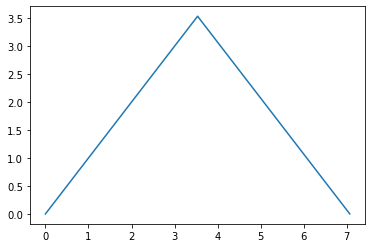

In [4]:
x0,y0 = triangle(L,N)
plt.plot(x0,y0)

In [5]:
# Fonction solve pour résoudre le problème avec CasADI

def solve(N,K,L,gamma,x0,y0):
    
    # constantes
    
    dx = L/N
    
    # résolution CasADI
    
    opti = casadi.Opti()
    
    x = opti.variable(N+1)
    y = opti.variable(N+1)
    
    f = K*(x[-1]-L/2)**2 + dx**2*casadi.sumsqr(y)
    opti.minimize(f)
    
    # contraintes égalité
    
    opti.subject_to(x[0]==0)
    opti.subject_to(y[0]==0)
    opti.subject_to(y[-1]==0)
    for i in range(1,N+1):
        opti.subject_to((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2 - dx**2==0)
    
    # contraintes inégalité
    
    for i in range(2,N+1):
        opti.subject_to((x[i]+x[i-2]-2*x[i-1])**2 + (y[i]+y[i-2]-2*y[i-1])**2 - dx**4*gamma**2<=0)
    for i in range(1,N+1):
        opti.subject_to(x[i-1] - x[i]<=0)
    opti.subject_to(-y[1]<=0)
    
    opti.set_initial(x,x0)
    opti.set_initial(y,y0)
    opti.solver("ipopt")
    sol = opti.solve()
    
    return sol.value(x),sol.value(y)

# Fonction cout pour calculer la valeur de la fonction cout

def cout(N,K,L,x,y):
    dx = L/N
    return K*(x[-1]-L/2)**2 + dx**2*np.sum(np.power(y,2))

In [6]:
x,y = solve(N,K,L,gamma,x0,y0)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

 116 3.7114063e-001 5.81e-006 4.98e-002  -5.7 2.01e-003  -0.9 1.00e+000 6.07e-001h  1
 117 3.7110069e-001 1.67e-005 4.55e-004  -5.7 8.05e-003  -1.4 1.00e+000 1.00e+000f  1
 118 3.7100167e-001 4.06e-006 4.38e-004  -5.7 3.71e-003  -0.9 1.00e+000 1.00e+000h  1
 119 3.7085121e-001 8.84e-005 2.96e-002  -5.7 3.60e-002  -1.4 3.07e-001 4.87e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 3.7074925e-001 7.73e-005 1.46e-002  -5.7 1.31e-002  -1.0 5.48e-001 1.37e-001f  1
 121 3.7065241e-001 6.09e-005 4.22e-002  -5.7 5.85e-003  -0.6 1.00e+000 2.18e-001f  1
 122 3.7050376e-001 4.90e-005 5.18e-002  -5.7 1.18e-002  -1.0 3.95e-001 2.41e-001f  1
 123 3.7045900e-001 4.64e-005 1.31e-001  -5.7 4.79e-002  -1.5 2.89e-001 5.23e-002f  1
 124 3.7045070e-001 4.50e-005 2.64e-001  -5.7 8.50e-003  -1.1 1.00e+000 3.07e-002f  1
 125 3.7040258e-001 4.45e-005 3.50e-001  -5.7 5.07e-001    -  4.57e-002 1.20e-002f  1
 126 3.7039623e-001 4.39e-005 2.26e-001  -5.7 1.40e-001  -1

La fonction coût vaut : 0.3680889706488747


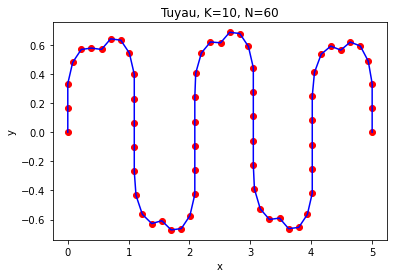

In [7]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=10, N=60")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Avec $\frac{L}{2}=5m$ ici, on a visiblement une solution acceptable.

### Question 7

Avec $K=100$ :

In [8]:
K = 100

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 153 3.6893817e-001 4.05e-004 2.16e-002  -5.7 3.50e-002  -1.3 5.70e-001 7.16e-001f  1
 154 3.6892453e-001 3.99e-004 2.14e-002  -5.7 4.29e-002  -1.8 1.61e-002 1.45e-002h  1
 155 3.6891790e-001 3.94e-004 2.20e-002  -5.7 1.03e-001  -2.3 4.27e-003 1.44e-002h  1
 156 3.6890169e-001 3.79e-004 2.69e-002  -5.7 1.82e-002  -1.0 2.47e-001 3.97e-002f  1
 157 3.6886953e-001 2.47e-004 8.23e-002  -5.7 7.65e-003  -1.4 9.22e-001 3.50e-001f  1
 158 3.6891245e-001 1.82e-004 5.81e-002  -5.7 6.24e-002  -1.9 4.13e-001 3.30e-001H  1
 159 3.6871744e-001 4.68e-005 1.93e-002  -5.7 3.10e-003  -1.5 1.00e+000 7.44e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 3.6866672e-001 2.49e-005 9.64e-003  -5.7 1.54e-002  -2.0 1.00e+000 5.58e-001f  1
 161 3.6857347e-001 3.36e-005 7.87e-003  -5.7 6.27e-002  -2.4 2.91e-001 2.61e-001f  1
 162 3.6852293e-001 1.85e-005 4.07e-002  -5.7 4.09e-003  -1.1 1.00e+000 4.50e-001f  1
 163 3.6844945e-001 1.99e-006 1.63e-002  -5.7 5.04e-003  -1

 241 2.9818236e-001 5.30e-004 2.00e-001  -5.7 1.72e-002  -1.3 1.00e+000 1.82e-001h  1
 242 2.9780018e-001 4.38e-004 1.75e-001  -5.7 4.83e-002  -1.8 2.53e-001 1.76e-001h  1
 243 2.9673964e-001 1.55e-004 5.35e-002  -5.7 3.03e-002  -1.4 7.45e-001 6.70e-001f  1
 244 2.9655681e-001 1.31e-004 1.38e-001  -5.7 1.22e-002  -0.9 6.68e-001 1.61e-001f  1
 245 2.9502014e-001 1.79e-004 9.95e-002  -5.7 6.39e-002  -1.4 6.72e-001 3.30e-001f  1
 246 2.9406506e-001 1.22e-004 1.06e-001  -5.7 2.00e-002  -1.0 8.47e-001 3.97e-001f  1
 247 2.9403882e-001 1.16e-004 1.99e-001  -5.7 1.12e-002  -1.5 7.26e-001 5.23e-002h  1
 248 2.9346803e-001 5.98e-005 7.99e-002  -5.7 1.95e-002  -1.0 5.75e-001 6.34e-001f  1
 249 2.9347605e-001 3.96e-006 9.42e-004  -5.7 4.51e-003  -1.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 2.9333472e-001 1.26e-005 9.35e-004  -5.7 8.90e-003  -2.0 1.00e+000 9.70e-001h  1
 251 2.9329654e-001 9.86e-006 4.65e-002  -5.7 1.15e-002    

La fonction coût vaut : 0.2927700726051806


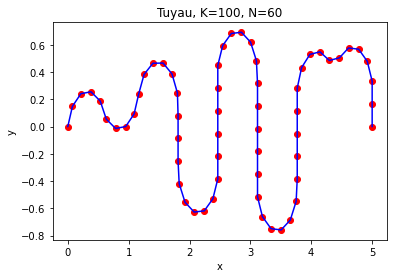

In [9]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=100, N=60")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Puis avec $K=10^{5}$ :

In [10]:
K = 1e5

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  79 1.0867548e+001 5.17e-005 1.22e-003  -5.7 4.70e-002    -  9.60e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 1.0858320e+001 1.14e-006 2.11e-005  -5.7 2.01e-003  -2.0 1.00e+000 1.00e+000h  1
  81 1.0846261e+001 3.78e-005 2.70e-005  -5.7 5.57e-003  -2.5 1.00e+000 1.00e+000h  1
  82 1.0840309e+001 8.31e-006 2.50e-005  -5.7 2.70e-003  -2.0 1.00e+000 1.00e+000h  1
  83 1.0820015e+001 2.42e-004 4.46e-005  -5.7 1.44e-002  -2.5 1.00e+000 1.00e+000h  1
  84 1.0807590e+001 8.39e-006 2.43e-005  -5.7 2.95e-003  -2.1 1.00e+000 1.00e+000h  1
  85 1.0775922e+001 2.06e-004 4.44e-005  -5.7 1.23e-002  -2.6 1.00e+000 1.00e+000h  1
  86 1.0754643e+001 1.12e-005 2.52e-005  -5.7 3.45e-003  -2.1 1.00e+000 1.00e+000h  1
  87 1.0700751e+001 1.53e-004 3.53e-005  -5.7 1.14e-002  -2.6 1.00e+000 1.00e+000h  1
  88 1.0674656e+001 1.34e-005 2.86e-005  -5.7 4.41e-003  -2.2 1.00e+000 1.00e+000h  1
  89 1.0606277e+001 1.81e-004 2.69e-005  -5.7 1.18e-002  -2

 236 3.5941398e-001 1.22e-005 1.57e-006  -8.6 2.74e-003  -3.2 1.00e+000 1.00e+000h  1
 237 3.5937702e-001 1.35e-005 7.87e-006  -8.6 9.28e-003  -3.7 1.00e+000 1.37e-001h  2
 238 3.5922003e-001 7.36e-006 8.57e-006  -8.6 5.73e-003  -4.2 1.00e+000 7.17e-001H  1
 239 3.5856109e-001 1.89e-004 1.50e-005  -8.6 4.24e-002  -4.7 2.26e-001 6.42e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 240 3.5704937e-001 1.05e-004 7.00e-006  -8.6 1.54e-002  -4.2 1.00e+000 8.24e-001f  1
 241 3.5688626e-001 5.24e-005 6.36e-005  -8.6 2.86e-002  -4.7 4.02e-001 1.50e-001f  1
 242 3.5637864e-001 4.36e-005 7.89e-006  -8.6 1.86e-002  -4.3 1.00e+000 3.87e-001f  1
 243 3.5599346e-001 4.05e-005 1.79e-005  -8.6 2.65e-002  -4.8 6.09e-001 5.33e-001f  1
 244 3.5540483e-001 5.29e-004 4.40e-005  -8.6 2.43e-001  -5.2 8.60e-002 1.85e-001f  1
 245 3.5528368e-001 5.14e-004 9.99e-005  -8.6 3.55e-001  -4.8 1.76e-001 2.95e-002f  1
 246 3.5379223e-001 1.97e-004 3.33e-005  -8.6 1.72e-002  -4

 383 2.4842919e-001 8.96e-005 1.87e-005  -8.6 2.93e-002  -4.5 5.04e-001 9.31e-001f  1
 384 2.4789829e-001 2.66e-005 1.05e-006  -8.6 1.45e-002  -4.1 1.00e+000 1.00e+000f  1
 385 2.4678802e-001 2.63e-004 6.74e-006  -8.6 7.22e-002  -4.6 4.01e-001 5.69e-001h  1
 386 2.4569508e-001 4.46e-005 9.37e-005  -8.6 1.86e-002  -4.2 6.22e-001 1.00e+000f  1
 387 2.4477298e-001 7.55e-005 5.68e-005  -8.6 4.61e-002  -4.6 1.00e+000 3.82e-001h  1
 388 2.4458318e-001 6.18e-005 1.12e-004  -8.6 1.22e-002    -  4.66e-001 1.85e-001f  1
 389 2.4423825e-001 2.30e-004 9.74e-005  -8.6 1.56e-001  -5.1 1.92e-001 8.40e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 2.4407135e-001 2.87e-005 5.28e-005  -8.6 7.14e-003    -  1.00e+000 6.93e-001f  1
 391 2.4397081e-001 4.67e-007 6.08e-008  -8.6 2.25e-003    -  1.00e+000 1.00e+000f  1
 392 2.4396615e-001 2.47e-008 3.71e-010  -8.6 3.95e-004    -  1.00e+000 1.00e+000h  1
 393 2.4355845e-001 1.26e-005 1.21e-006  -9.0 5.44e-003    

La fonction coût vaut : 0.2435718060482217


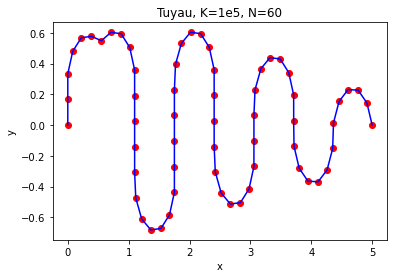

In [11]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=1e5, N=60")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Puis avec $K=0,1$ :

In [12]:
K = 1e-1

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 7

La fonction coût vaut : 0.1713008493074084


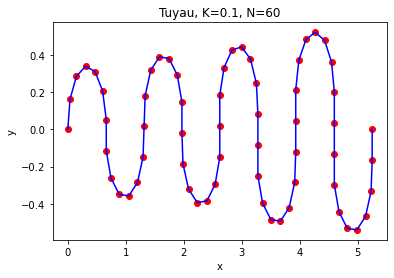

In [13]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=0.1, N=60")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Ainsi le paramètre $K$ est positivement corrélé à la valeur de la fonction coût et permet que la contrainte $x_{N}=\frac{L}{2}$ soit respectée à condition que $K>>1$, sinon, comme on peut le voir pour $K=0,1$, la contrainte n'est plus respectée.


Cela est en accord avec la nature de $K$, car comme multiplicateur de Lagrange, s'il tend vers zéro la contrainte associée n'est alors plus respectée.

### Question 8

Ici on garde $K=10^{5}$ et on procède d'abord avec $N=60$ :

In [14]:
K = 1e5

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 147 3.7494881e-001 3.42e-004 6.71e-006  -8.6 5.14e-002  -3.9 1.00e+000 4.79e-001f  1
 148 3.7417347e-001 4.55e-004 2.29e-005  -8.6 1.56e-001    -  1.45e-001 1.53e-002h  1
 149 3.7333622e-001 3.08e-004 3.25e-005  -8.6 8.32e-003  -4.4 8.97e-001 2.72e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 3.7189488e-001 1.16e-006 1.94e-007  -8.6 1.79e-003  -3.9 1.00e+000 1.00e+000f  1
 151 3.7189525e-001 2.48e-008 5.88e-008  -8.6 2.06e-004  -3.5 1.00e+000 1.00e+000h  1
 152 3.7189624e-001 1.50e-008 1.93e-008  -8.6 1.84e-004  -4.0 1.00e+000 1.00e+000h  1
 153 3.7189511e-001 7.13e-008 1.51e-008  -8.6 4.45e-004  -4.5 1.00e+000 1.00e+000h  1
 154 3.7186144e-001 4.43e-007 7.17e-008  -8.6 4.85e-003  -4.9 1.00e+000 1.00e+000H  1
 155 3.7185680e-001 1.28e-008 4.09e-008  -8.6 1.68e-004  -3.6 1.00e+000 1.00e+000h  1
 156 3.7185433e-001 5.48e-008 3.51e-008  -8.6 4.38e-004  -4.1 1.00e+000 1.00e+000h  1
 157 3.7182325e-001 2.12e-007 1.69e-007  -8.6 4.41e-003  -4

 292 3.3192050e-001 2.76e-004 7.04e-005  -8.6 1.75e-001  -5.1 1.59e-001 2.89e-002f  1
 293 3.3111509e-001 1.91e-004 1.10e-004  -8.6 3.03e-002  -4.7 9.40e-001 3.13e-001f  1
 294 3.2960101e-001 4.20e-005 2.25e-006  -8.6 1.29e-002  -4.2 9.79e-001 1.00e+000f  1
 295 3.2945825e-001 4.14e-005 2.83e-005  -8.6 5.64e-002  -4.7 1.73e-001 3.79e-002h  1
 296 3.2803579e-001 1.10e-004 1.04e-005  -8.6 1.96e-002  -4.3 7.81e-001 1.00e+000f  1
 297 3.2664004e-001 3.33e-005 4.15e-006  -8.6 1.21e-002  -3.9 9.08e-001 1.00e+000h  1
 298 3.2417679e-001 1.87e-004 3.11e-005  -8.6 5.85e-002  -4.3 7.82e-001 4.38e-001h  1
 299 3.2381748e-001 1.26e-004 4.18e-005  -8.6 6.81e-002  -4.8 4.49e-001 3.43e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 300 3.2025908e-001 4.14e-004 2.23e-005  -8.6 6.33e-002  -4.4 8.21e-001 6.26e-001f  1
 301 3.1735099e-001 3.88e-004 7.78e-005  -8.6 1.25e-001  -4.9 2.47e-001 4.40e-001f  1
 302 3.1665948e-001 7.37e-004 3.40e-005  -8.6 7.44e-002  -4

La fonction coût vaut : 0.2435718060482217


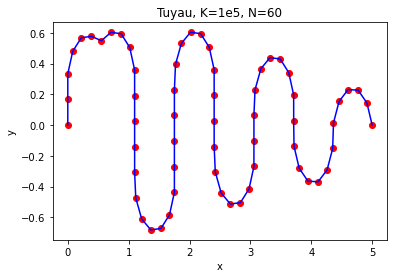

In [15]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=1e5, N=60")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Puis avec $N=160$ :

In [16]:
N = 160

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      643
Number of nonzeros in inequality constraint Jacobian.:     1275
Number of nonzeros in Lagrangian Hessian.............:      960

Total number of variables............................:      322
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      163
Total number of inequality constraints...............:      320
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      320

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  85 4.0876369e+000 4.34e-006 1.30e-004  -8.6 2.43e-003  -2.4 1.00e+000 6.36e-001h  1
  86 4.0872925e+000 2.71e-006 6.70e-004  -8.6 6.86e-004  -2.0 8.01e-001 4.04e-001f  1
  87 4.0863481e+000 2.24e-006 3.81e-004  -8.6 2.72e-003  -2.5 1.00e+000 4.05e-001f  1
  88 4.0854918e+000 6.84e-007 7.08e-006  -8.6 7.68e-004  -2.0 1.00e+000 1.00e+000f  1
  89 4.0844405e+000 6.03e-006 9.35e-006  -8.6 5.51e-003  -2.5 4.11e-001 4.01e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  90 4.0833883e+000 1.45e-006 9.19e-006  -8.6 1.12e-003  -2.1 1.00e+000 1.00e+000f  1
  91 4.0821093e+000 6.59e-006 1.40e-004  -8.6 5.71e-003  -2.6 6.36e-001 3.53e-001h  1
  92 4.0808323e+000 3.85e-006 1.17e-005  -8.6 1.61e-003  -2.1 1.00e+000 1.00e+000f  1
  93 4.0776318e+000 3.17e-005 1.57e-004  -8.6 5.81e-003  -2.6 1.00e+000 7.10e-001h  1
  94 4.0770882e+000 2.69e-005 3.02e-004  -8.6 1.04e-003  -2.2 9.94e-001 3.25e-001f  1
  95 4.0760600e+000 1.96e-005 8.40e-004  -8.6 3.32e-003  -2

 187 3.7809771e+000 3.44e-005 1.86e-003  -8.6 1.06e-002  -3.2 6.28e-001 1.56e-001f  1
 188 3.7797303e+000 2.58e-005 1.87e-003  -8.6 4.09e-003  -2.8 1.05e-001 2.66e-001f  1
 189 3.7776959e+000 2.19e-005 1.64e-003  -8.6 1.69e-002  -3.3 6.05e-001 1.45e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 3.7752616e+000 1.03e-005 8.75e-004  -8.6 4.39e-003  -2.8 4.97e-001 5.26e-001f  1
 191 3.7702406e+000 2.13e-004 9.78e-004  -8.6 3.99e-002  -3.3 1.77e-001 4.64e-001f  1
 192 3.7693792e+000 1.97e-004 5.45e-004  -8.6 6.30e-003  -2.9 3.69e-001 2.07e-001f  1
 193 3.7688456e+000 1.67e-004 1.15e-003  -8.6 3.14e-003  -2.5 1.00e+000 3.37e-001f  1
 194 3.7668981e+000 8.85e-005 4.45e-004  -8.6 5.27e-003  -2.9 3.53e-001 5.25e-001f  1
 195 3.7659842e+000 5.08e-005 5.16e-004  -8.6 1.88e-003  -2.5 1.00e+000 6.48e-001f  1
 196 3.7653039e+000 3.93e-005 4.89e-004  -8.6 6.44e-003  -3.0 6.81e-001 1.44e-001f  1
 197 3.7638429e+000 1.05e-006 5.85e-006  -8.6 2.13e-003  -2

 283 3.5086640e+000 1.32e-005 1.42e-004  -8.6 5.45e-003  -3.0 1.00e+000 8.73e-001f  1
 284 3.5055211e+000 1.04e-005 3.17e-004  -8.6 1.79e-002  -3.4 3.11e-001 2.17e-001f  1
 285 3.4996293e+000 1.20e-005 4.27e-004  -8.6 5.62e-003  -3.0 6.29e-001 1.00e+000f  1
 286 3.4978103e+000 1.34e-005 1.47e-003  -8.6 3.74e-002  -3.5 3.26e-001 7.42e-002h  1
 287 3.4953423e+000 2.37e-005 1.04e-003  -8.6 6.90e-003  -3.1 1.00e+000 3.32e-001f  1
 288 3.4926280e+000 1.85e-005 5.59e-004  -8.6 1.91e-002  -3.5 2.64e-001 1.57e-001f  1
 289 3.4914044e+000 1.51e-005 7.68e-004  -8.6 7.33e-003  -3.1 3.44e-001 1.71e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 3.4883509e+000 2.06e-005 6.88e-004  -8.6 2.53e-002  -3.6 1.08e-001 1.44e-001f  1
 291 3.4868178e+000 1.05e-005 5.23e-004  -8.6 7.59e-003  -3.2 2.18e-001 2.40e-001f  1
 292 3.4846666e+000 3.21e-006 2.82e-004  -8.6 3.90e-003  -2.7 1.00e+000 7.87e-001f  1
 293 3.4820219e+000 3.71e-006 2.04e-004  -8.6 1.11e-002  -3

 402 2.6112013e+000 4.18e-006 2.06e-004  -8.6 2.80e-002  -3.7 1.31e-001 1.43e-001f  1
 403 2.5957131e+000 6.93e-006 2.16e-003  -8.6 1.10e-002  -3.3 2.89e-001 1.00e+000f  1
 404 2.5954196e+000 6.90e-006 3.18e-003  -8.6 3.25e-001  -3.8 2.21e-002 4.43e-003h  1
 405 2.5935461e+000 6.87e-006 2.90e-003  -8.6 2.35e-001  -4.3 7.13e-003 1.18e-002f  1
 406 2.5913087e+000 4.70e-006 1.93e-003  -8.6 4.50e-003  -2.9 2.57e-001 3.49e-001f  1
 407 2.5751938e+000 1.49e-005 6.51e-004  -8.6 1.30e-002  -3.4 2.16e-001 8.34e-001f  1
 408 2.5676500e+000 6.90e-006 9.55e-005  -8.6 5.22e-003  -3.0 9.22e-001 1.00e+000f  1
 409 2.5447353e+000 3.52e-005 5.30e-006  -8.6 1.59e-002  -3.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410 2.5423148e+000 3.42e-005 1.95e-005  -8.6 6.24e-002  -3.9 3.59e-002 3.30e-002h  1
 411 2.5312821e+000 3.61e-005 5.89e-004  -8.6 1.62e-002  -3.5 1.35e-001 4.24e-001f  1
 412 2.5279610e+000 7.68e-005 5.79e-004  -8.6 2.23e-001  -4

 512 1.1699503e+000 1.88e-005 3.21e-006  -8.6 2.32e-002  -3.8 1.00e+000 1.00e+000f  1
 513 1.1482792e+000 2.89e-005 2.02e-004  -8.6 7.96e-002  -4.3 5.30e-001 3.07e-001h  1
 514 1.1409322e+000 2.57e-005 1.39e-004  -8.6 2.79e-002  -3.9 3.07e-001 2.77e-001f  1
 515 1.1348661e+000 2.93e-005 1.66e-003  -8.6 1.00e-001  -4.4 2.91e-001 8.02e-002f  1
 516 1.1305319e+000 3.26e-005 2.29e-003  -8.6 3.54e-001  -4.9 9.58e-002 2.17e-002f  1
 517 1.1136684e+000 3.44e-005 2.05e-003  -8.6 7.32e-002  -4.4 3.44e-002 2.10e-001f  1
 518 1.0878981e+000 3.06e-005 1.83e-003  -8.6 3.27e-001  -4.9 5.06e-002 1.13e-001f  1
 519 1.0551882e+000 1.92e-005 1.15e-003  -8.6 8.75e-002  -4.5 3.72e-001 3.74e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 520 1.0344440e+000 7.13e-006 8.86e-004  -8.6 3.36e-002  -4.1 1.00e+000 6.29e-001f  1
 521 1.0316908e+000 5.50e-006 6.44e-004  -8.6 1.19e-002  -3.6 2.05e-001 2.28e-001f  1
 522 9.9611288e-001 6.36e-006 2.58e-004  -8.6 3.75e-002  -4

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 620 1.3250806e-001 1.09e-004 3.54e-004  -8.6 8.43e-002  -5.6 2.16e-001 5.50e-002f  1
 621 1.3175438e-001 1.07e-004 6.55e-004  -8.6 5.27e-001  -6.1 1.45e-003 1.94e-002f  1
 622 1.2888953e-001 2.86e-005 5.83e-004  -8.6 3.02e-002  -4.8 4.89e-001 1.00e+000f  1
 623 1.2757569e-001 2.55e-005 4.96e-004  -8.6 1.35e-001  -5.2 1.90e-001 1.58e-001h  1
 624 1.2724485e-001 2.04e-005 4.67e-004  -8.6 3.39e-002  -4.8 2.84e-001 2.07e-001f  1
 625 1.2549933e-001 5.33e-005 3.37e-004  -8.6 1.94e-001  -5.3 5.28e-002 1.76e-001f  1
 626 1.2511756e-001 8.43e-005 1.28e-003  -8.6 6.67e-002  -4.9 4.82e-001 1.03e-001f  1
 627 1.2425178e-001 7.03e-005 8.31e-004  -8.6 8.11e-002  -5.3 4.53e-001 1.38e-001f  1
 628 1.2250981e-001 7.43e-005 9.19e-004  -8.6 4.12e-001  -5.8 1.09e-002 7.64e-002f  1
 629 1.2112774e-001 6.47e-005 9.29e-004  -8.6 1.75e-001  -6.3 2.96e-001 1.32e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 730 8.2296368e-002 1.20e-005 5.17e-005  -8.6 1.59e-001    -  1.65e-001 5.44e-002h  2
 731 8.2248273e-002 8.52e-006 1.34e-007  -8.6 6.03e-003  -4.9 1.00e+000 1.00e+000h  1
 732 8.2249151e-002 2.05e-005 8.38e-006  -8.6 6.58e+000    -  2.51e-003 2.87e-003h  2
 733 8.1993422e-002 1.21e-005 3.63e-007  -8.6 2.04e-002  -5.4 1.00e+000 1.00e+000h  1
 734 8.1966940e-002 1.19e-004 1.27e-005  -8.6 1.91e-001  -5.9 6.56e-002 4.33e-002h  2
 735 8.1934951e-002 1.26e-004 1.21e-004  -8.6 2.66e-002  -4.6 1.00e+000 1.21e-001h  2
 736 8.1807764e-002 3.85e-005 4.83e-007  -8.6 7.30e-003  -5.0 1.00e+000 1.00e+000h  1
 737 8.1539617e-002 4.06e-006 9.44e-007  -8.6 1.77e-002  -5.5 8.83e-001 8.93e-001H  1
 738 8.1423393e-002 6.04e-006 1.93e-005  -8.6 3.65e-002  -6.0 2.94e-001 3.62e-001f  1
 739 8.1253770e-002 2.73e-005 3.15e-005  -8.6 2.39e-002  -5.6 6.30e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740 8.1071382e-002 3.33e-006 3.75e-007  -8.6 8.26e-003  -5

La fonction coût vaut : 0.07776901124731311


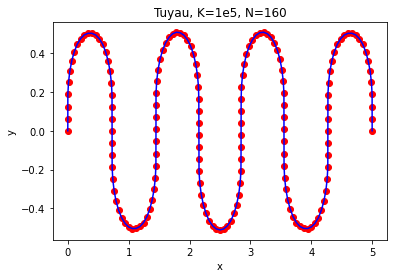

In [17]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=1e5, N=160")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Finalement avec $N=260$ :

In [18]:
N = 260

x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1043
Number of nonzeros in inequality constraint Jacobian.:     2075
Number of nonzeros in Lagrangian Hessian.............:     1560

Total number of variables............................:      522
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      263
Total number of inequality constraints...............:      520
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      520

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  92 2.5044234e+000 1.42e-004 8.06e-004  -8.6 1.10e-002  -3.2 2.76e-001 7.28e-001f  1
  93 2.5037041e+000 1.03e-004 9.67e-004  -8.6 3.68e-003  -2.8 1.00e+000 4.26e-001f  1
  94 2.5030060e+000 8.84e-005 9.93e-004  -8.6 2.11e-002  -3.2 2.02e-001 1.35e-001f  1
  95 2.5026566e+000 7.07e-005 5.84e-004  -8.6 2.11e-003  -2.8 1.00e+000 1.97e-001f  1
  96 2.5012213e+000 5.19e-005 4.42e-004  -8.6 8.73e-003  -3.3 5.68e-001 2.70e-001f  1
  97 2.5006884e+000 3.78e-005 8.35e-004  -8.6 2.46e-003  -2.9 6.94e-001 2.73e-001f  1
  98 2.4989764e+000 2.68e-005 4.78e-004  -8.6 1.11e-002  -3.3 6.70e-001 2.88e-001f  1
  99 2.4980609e+000 1.55e-005 5.74e-004  -8.6 1.86e-003  -2.9 1.00e+000 4.19e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 2.4947271e+000 4.74e-005 4.37e-004  -8.6 1.15e-002  -3.4 3.05e-001 5.14e-001f  1
 101 2.4934796e+000 2.58e-005 4.10e-004  -8.6 2.11e-003  -3.0 8.67e-001 4.90e-001f  1
 102 2.4928507e+000 9.02e-006 3.29e-004  -8.6 1.15e-003  -2

 183 2.3276085e+000 4.79e-005 1.41e-003  -8.6 4.58e-003  -3.3 5.29e-001 3.62e-001f  1
 184 2.3235969e+000 3.04e-005 7.32e-004  -8.6 1.77e-002  -3.7 3.23e-001 3.92e-001f  1
 185 2.3226465e+000 2.37e-005 1.38e-003  -8.6 6.60e-003  -3.3 6.21e-001 2.24e-001f  1
 186 2.3223463e+000 1.99e-005 1.06e-003  -8.6 5.10e-003  -2.9 2.24e-001 2.09e-001f  1
 187 2.3212831e+000 1.84e-005 8.40e-004  -8.6 6.63e-003  -3.4 3.21e-001 2.67e-001f  1
 188 2.3201033e+000 4.56e-006 1.21e-003  -8.6 2.79e-003  -2.9 5.68e-001 8.36e-001f  1
 189 2.3195841e+000 1.10e-006 3.31e-006  -8.6 1.23e-003  -2.5 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 2.3179876e+000 1.36e-005 4.26e-004  -8.6 2.86e-003  -3.0 1.00e+000 9.01e-001h  1
 191 2.3159626e+000 4.82e-006 4.53e-004  -8.6 7.73e-003  -3.5 2.45e-001 3.94e-001f  1
 192 2.3156299e+000 2.57e-005 7.72e-004  -8.6 1.89e-002  -3.0 2.97e-001 1.50e-001f  1
 193 2.3154271e+000 1.71e-005 4.90e-004  -8.6 1.85e-003  -2

 278 2.1376130e+000 1.60e-005 7.23e-004  -8.6 7.02e-003  -3.4 3.20e-001 2.72e-001f  1
 279 2.1330634e+000 1.58e-005 1.38e-003  -8.6 4.43e-002  -3.9 8.00e-002 2.71e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 280 2.1309028e+000 1.82e-005 7.95e-004  -8.6 9.75e-003  -3.5 3.76e-001 3.46e-001f  1
 281 2.1283557e+000 2.36e-005 1.39e-003  -8.6 2.65e-002  -4.0 3.14e-001 1.47e-001f  1
 282 2.1259303e+000 1.31e-005 5.28e-004  -8.6 9.74e-003  -3.5 2.60e-001 3.90e-001f  1
 283 2.1239808e+000 1.16e-005 4.46e-004  -8.6 4.27e-002  -4.0 1.20e-001 8.96e-002f  1
 284 2.1220284e+000 7.53e-006 8.14e-004  -8.6 1.00e-002  -3.6 1.81e-001 2.89e-001f  1
 285 2.1193687e+000 6.04e-006 8.80e-006  -8.6 6.23e-003  -3.2 1.00e+000 1.00e+000f  1
 286 2.1171701e+000 9.69e-006 1.18e-003  -8.6 1.51e-002  -3.6 7.10e-001 2.63e-001h  1
 287 2.1143252e+000 9.17e-006 1.39e-003  -8.6 6.00e-002  -4.1 2.06e-001 1.09e-001f  1
 288 2.1130541e+000 1.12e-005 1.26e-003  -8.6 1.32e-002  -3

 387 1.7010055e+000 1.76e-005 2.11e-003  -8.6 2.19e-001  -4.9 7.25e-002 1.11e-002f  1
 388 1.6943179e+000 1.52e-005 1.88e-003  -8.6 5.56e-002  -4.4 7.06e-002 1.25e-001f  1
 389 1.6851672e+000 1.25e-005 9.04e-004  -8.6 2.02e-002  -4.0 6.91e-001 4.55e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 390 1.6733613e+000 1.02e-005 1.03e-003  -8.6 6.56e-002  -4.5 3.18e-001 1.98e-001f  1
 391 1.6668225e+000 7.93e-006 7.88e-004  -8.6 2.22e-002  -4.1 4.14e-001 2.97e-001f  1
 392 1.6585809e+000 2.93e-006 1.13e-003  -8.6 8.16e-003  -3.6 5.08e-001 1.00e+000f  1
 393 1.6555364e+000 3.29e-007 3.06e-004  -8.6 3.08e-003  -3.2 9.17e-001 1.00e+000h  1
 394 1.6467618e+000 2.92e-006 2.11e-006  -8.6 9.43e-003  -3.7 1.00e+000 1.00e+000h  1
 395 1.6425793e+000 4.29e-006 1.87e-003  -8.6 3.04e-002  -4.2 4.34e-001 1.66e-001h  1
 396 1.6340206e+000 4.12e-006 1.55e-003  -8.6 1.08e-002  -3.7 3.99e-001 9.12e-001f  1
 397 1.6307907e+000 4.69e-006 9.97e-004  -8.6 4.68e-002  -4

 476 1.0836501e+000 2.06e-005 2.21e-003  -8.6 1.30e-001  -4.9 6.18e-002 2.67e-002f  1
 477 1.0832085e+000 2.02e-005 3.58e-003  -8.6 5.52e-002  -4.5 9.56e-002 1.45e-002f  1
 478 1.0805453e+000 1.96e-005 4.07e-003  -8.6 1.30e-001  -4.9 4.52e-002 2.97e-002f  1
 479 1.0697728e+000 1.34e-005 1.89e-003  -8.6 4.93e-002  -4.5 4.11e-001 3.00e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 480 1.0548446e+000 1.14e-005 1.31e-003  -8.6 1.42e-001  -5.0 7.63e-002 1.44e-001f  1
 481 1.0527507e+000 6.29e-006 1.31e-003  -8.6 6.58e-003  -3.7 2.54e-001 4.13e-001f  1
 482 1.0417316e+000 2.73e-006 8.87e-004  -8.6 1.97e-002  -4.1 5.22e-001 7.45e-001f  1
 483 1.0392714e+000 9.84e-006 8.48e-004  -8.6 3.44e-001  -4.6 6.12e-002 5.13e-002f  1
 484 1.0375914e+000 9.75e-006 1.05e-003  -8.6 1.04e+000  -5.1 2.68e-003 8.99e-003f  1
 485 1.0058759e+000 1.86e-005 2.63e-003  -8.6 7.18e-002  -4.7 2.77e-001 6.42e-001f  1
 486 1.0024589e+000 2.03e-005 1.92e-003  -8.6 2.57e-002  -4

 573 1.7488965e-001 2.12e-007 5.62e-007  -8.6 1.16e-002  -4.3 1.00e+000 1.00e+000h  1
 574 1.6663875e-001 2.18e-006 5.46e-007  -8.6 3.36e-002  -4.8 1.00e+000 1.00e+000h  1
 575 1.5177017e-001 1.25e-005 2.94e-004  -8.6 8.99e-002  -5.3 9.45e-001 7.11e-001h  1
 576 1.4229157e-001 1.64e-005 2.05e-004  -8.6 2.02e-001  -5.7 1.55e-001 2.12e-001f  1
 577 1.2594985e-001 1.24e-005 5.62e-004  -8.6 8.94e-002  -5.3 3.84e-001 9.35e-001f  1
 578 1.2367700e-001 7.61e-006 3.47e-004  -8.6 3.19e-002  -4.9 3.96e-001 3.92e-001f  1
 579 1.2250055e-001 5.34e-006 2.59e-004  -8.6 1.20e-002  -4.5 1.00e+000 5.29e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 580 1.1647130e-001 2.94e-006 7.68e-007  -8.6 3.46e-002  -4.9 1.00e+000 1.00e+000f  1
 581 1.0249813e-001 1.66e-005 1.71e-004  -8.6 8.91e-002  -5.4 7.35e-001 1.00e+000h  1
 582 9.6333213e-002 1.42e-005 1.75e-004  -8.6 1.76e-001  -5.9 1.83e-001 2.51e-001h  1
 583 9.2626013e-002 1.33e-005 1.59e-004  -8.6 3.38e-001  -6

 676 4.8435608e-002 8.81e-008 1.35e-007  -8.6 1.63e-003  -5.6 1.00e+000 1.00e+000h  1
 677 4.8402406e-002 1.38e-008 6.79e-007  -8.6 8.71e-003    -  1.00e+000 1.00e+000H  1
 678 4.8396830e-002 2.18e-007 1.49e-007  -8.6 3.17e-003  -6.1 1.00e+000 1.00e+000h  1
 679 4.8391582e-002 2.21e-007 2.73e-004  -8.6 1.41e-002  -6.5 8.70e-001 1.25e-001h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 680 4.8377416e-002 1.91e-008 6.19e-008  -8.6 6.35e-003  -6.1 1.00e+000 1.00e+000H  1
 681 4.8373013e-002 1.49e-007 2.43e-004  -8.6 2.65e-002  -6.6 5.64e-001 1.40e-001h  3
 682 4.8372648e-002 2.62e-007 7.09e-004  -8.6 4.69e-002  -7.1 4.55e-001 7.34e-002h  3
 683 4.8368526e-002 4.44e-008 2.83e-008  -8.6 1.91e-003  -5.7 1.00e+000 1.00e+000h  1
 684 4.8367394e-002 1.12e-007 5.36e-004  -8.6 1.50e-002    -  1.00e+000 1.73e-001h  3
 685 4.8365956e-002 1.13e-007 9.49e-008  -8.6 3.04e-003  -6.2 1.00e+000 1.00e+000h  1
 686 4.8357848e-002 2.79e-008 3.68e-007  -8.6 5.72e-003    

La fonction coût vaut : 0.04834895154950366


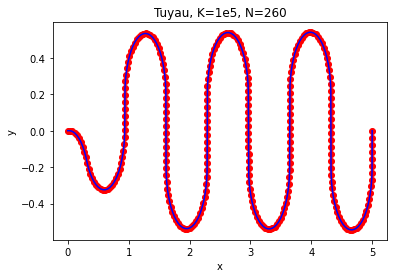

In [19]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=1e5, N=260")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Pour chaque nombre de points $N$ différent, on a une solution différente. Cela montre que le manque de résolution au niveau de la discrétisation du tuyau influence significativement le résultat. On remarque que la valeur de la fonction coût diminue avec la valeur de $N$, ainsi on peut conjecturer qu'un nombre de points qui tend vers l'infini permet de modéliser au mieux la courbe du tuyau, continue, et ainsi d'obtenir la meilleure solution (celle qui minimise la fonction coût) dans le cadre de notre modélisation des contraintes.

### Question 9

In [20]:
# Fonction droite pour l'initialisation

def droite(L,N):
    dx = L/N
    x0 = np.arange(0,L+dx,dx)
    y0 = np.zeros(len(x0))
    return x0, y0

On prend $N=60$ et $K=10$ et on trace pour une condition initiale sous forme d'une droite sur l'axe des abscisses :

In [21]:
N = 60
K = 10

x0,y0 = droite(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 140 2.1853401e+002 9.13e-004 1.75e+001  -1.7 3.31e-002   2.7 8.55e-001 4.69e-001f  1
 141 2.1712349e+002 8.09e-004 3.32e+001  -1.7 1.04e-001   2.2 3.99e-001 2.52e-001f  1
 142 2.1686793e+002 7.08e-004 6.10e+001  -1.7 2.94e-002   2.7 4.03e-001 1.17e-001f  1
 143 2.1071684e+002 1.19e-002 5.56e+001  -1.7 2.35e-001   2.2 9.87e-002 4.56e-001f  1
 144 2.1067517e+002 1.16e-002 2.31e+002  -1.7 3.17e-002   2.6 3.24e-001 2.61e-002h  1
 145 2.0448283e+002 8.46e-003 6.45e+001  -1.7 1.24e-001   2.1 1.99e-002 6.50e-001f  1
 146 2.0338310e+002 9.03e-003 3.50e+001  -1.7 5.02e-002   2.5 7.86e-001 2.90e-001f  1
 147 2.0182253e+002 7.37e-003 3.70e+001  -1.7 1.24e-001   2.1 4.49e-002 1.68e-001f  1
 148 2.0128691e+002 6.48e-003 9.54e+001  -1.7 3.91e-002   2.5 1.00e+000 1.62e-001f  1
 149 1.9871435e+002 5.25e-003 6.48e+001  -1.7 1.34e-001   2.0 6.59e-001 2.15e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 1.9698933e+002 2.92e-003 7.51e+001  -1.7 4.10e-002   2

 283 3.9583069e-001 8.88e-004 3.06e-002  -3.8 5.58e-002  -0.3 1.00e+000 9.77e-001h  1
 284 3.8865615e-001 4.69e-004 3.22e-002  -3.8 2.96e-002   0.1 1.00e+000 1.00e+000f  1
 285 3.8127616e-001 4.63e-003 4.75e-002  -3.8 6.63e-002  -0.3 1.00e+000 6.87e-001h  1
 286 3.7762358e-001 2.80e-004 6.14e-003  -3.8 1.91e-002  -0.8 1.00e+000 1.00e+000f  1
 287 3.7798588e-001 4.22e-005 2.83e-003  -3.8 6.98e-003  -0.4 1.00e+000 1.00e+000h  1
 288 3.7688422e-001 2.84e-004 4.89e-003  -3.8 3.10e-002  -0.9 1.00e+000 1.00e+000h  1
 289 3.7571104e-001 2.31e-005 3.91e-003  -3.8 1.11e-002  -0.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 3.7394302e-001 3.75e-004 6.58e-003  -3.8 3.79e-002  -0.9 1.00e+000 1.00e+000h  1
 291 3.7347404e-001 3.73e-004 1.05e-001  -3.8 3.94e-001  -1.4 1.10e-001 2.12e-002h  2
 292 3.7304768e-001 3.68e-004 1.10e-001  -3.8 1.17e+000  -1.9 1.86e-002 1.59e-002h  2
 293 3.7183332e-001 6.57e-005 5.66e-003  -3.8 1.16e-002  -0

La fonction coût vaut : 0.3606116547155712


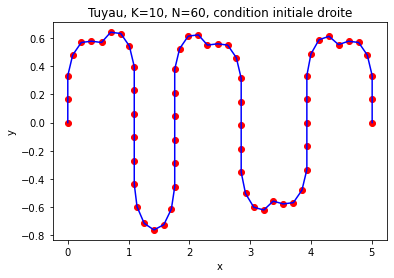

In [22]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=10, N=60, condition initiale droite")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

On procède de la même façon pour une condition initiale sous forme de triangle rectangle :

In [23]:
x0,y0 = triangle(L,N)

x,y = solve(N,K,L,gamma,x0,y0)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      475
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      120
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      120

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 110 3.7123875e-001 1.59e-006 1.92e-002  -5.7 5.35e-003  -0.7 1.00e+000 4.33e-001H  1
 111 3.7119666e-001 3.59e-005 2.66e-002  -5.7 2.72e-002  -1.2 4.60e-001 2.05e-001f  1
 112 3.7117869e-001 1.45e-005 3.18e-002  -5.7 5.94e-003  -0.8 8.45e-001 1.17e-001f  1
 113 3.7117634e-001 1.45e-005 3.42e-002  -5.7 3.22e-001  -1.3 2.09e-002 3.88e-004f  2
 114 3.7117686e-001 2.21e-005 2.91e-001  -5.7 5.05e+000  -0.8 6.95e-003 1.18e-005f  2
 115 3.7117854e-001 2.21e-005 2.92e-001  -5.7 3.97e-001  -1.3 9.27e-002 2.72e-004h  9
 116 3.7114063e-001 5.81e-006 4.98e-002  -5.7 2.01e-003  -0.9 1.00e+000 6.07e-001h  1
 117 3.7110069e-001 1.67e-005 4.55e-004  -5.7 8.05e-003  -1.4 1.00e+000 1.00e+000f  1
 118 3.7100167e-001 4.06e-006 4.38e-004  -5.7 3.71e-003  -0.9 1.00e+000 1.00e+000h  1
 119 3.7085121e-001 8.84e-005 2.96e-002  -5.7 3.60e-002  -1.4 3.07e-001 4.87e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 3.7074925e-001 7.73e-005 1.46e-002  -5.7 1.31e-002  -1

La fonction coût vaut : 0.3680889706488747


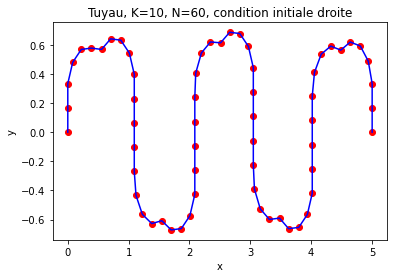

In [24]:
print("La fonction coût vaut :",cout(N,K,L,x,y))

plt.scatter(x,y,color='r')
plt.plot(x,y,color='b')

plt.title("Tuyau, K=10, N=60, condition initiale droite")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Les courbes ainsi que les valeurs de la fonction coût sont différentes pour des initialisations différentes, ainsi on n'a pas unicité de la solution, ce qui signifie qu'il existe plusieurs minima locaux pour la fonction $f$ sur son ensemble de définition contraint. Cela est dû au caractère non-convexe du problème.


Avec le hessien de $f$ valant en $(x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1}$ :


$$
H_{f}(x,y)=\begin{pmatrix} 0_{N,N} & 0_{N,N+2} \\
0_{N+2,N} & M \end{pmatrix}
$$


Où


$$
M = \begin{pmatrix} 2K & 0 & 0 & \cdots & 0 \\
0 & 2dx & 0 & \cdots & \vdots \\
0 & 0 & \ddots & \ddots & 0 \\
\vdots & \vdots & \ddots & 2dx & 0 \\
0 & \cdots & 0 & 0 & 2dx \\
\end{pmatrix}
$$


Avec $K>0$ et $dx>0$ la hessienne de $f$ est positive en tout $(x,y)\in\mathbb{R}^{N+1}\times\mathbb{R}^{N+1}$, ce qui revient à dire que $f$ est convexe.


Cependant l'ensemble restreint par les contraintes sur lequel elle est définie ne l'est pas, d'où la non-unicité des solutions.

## Minimum global

### Question 10

In [25]:
# Fonction solve2 pour résoudre le problème avec CasADI avec la contrainte du parterre de fleurs en plus

def solve2(N,K,L,gamma,x0,y0,xp,yp,R):
    
    # constantes
    
    dx = L/N
    
    # résolution CasADI
    
    opti = casadi.Opti()
    
    x = opti.variable(N+1)
    y = opti.variable(N+1)
    
    f = K*(x[-1]-L/2)**2 + dx**2*casadi.sumsqr(y)
    opti.minimize(f)
    
    # contraintes égalité
    
    opti.subject_to(x[0]==0)
    opti.subject_to(y[0]==0)
    opti.subject_to(y[-1]==0)
    for i in range(1,N+1):
        opti.subject_to((x[i]-x[i-1])**2 + (y[i]-y[i-1])**2 - dx**2==0)
    
    # contraintes inégalité
    
    for i in range(2,N+1):
        opti.subject_to((x[i]+x[i-2]-2*x[i-1])**2 + (y[i]+y[i-2]-2*y[i-1])**2 - dx**4*gamma**2<=0)
    for i in range(1,N+1):
        opti.subject_to(x[i-1] - x[i]<=0)
    for i in range(0,N+1):
        opti.subject_to(R**2 - (x[i]-xp)**2 - (y[i]-yp)**2<=0)
    opti.subject_to(-y[1]<=0)
    
    opti.set_initial(x,x0)
    opti.set_initial(y,y0)
    opti.solver("ipopt")
    sol = opti.solve()
    
    return sol.value(x),sol.value(y)

L'ajout de cette contrainte ne modifie pas le caractère non-convexe évoqué à la question précédente, en effet on restreint davantage l'ensemble des solutions.

### Question 11

In [26]:
xp,yp = 2,0.3
R = 0.3

In [27]:
x0,y0 = triangle(L,N)

x1,y1 = solve2(N,K,L,gamma,x0,y0,xp,yp,R)

x0,y0 = droite(L,N)

x2,y2 = solve2(N,K,L,gamma,x0,y0,xp,yp,R)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      243
Number of nonzeros in inequality constraint Jacobian.:      597
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       63
Total number of inequality constraints...............:      181
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      181

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  96 3.9145057e-001 5.50e-003 5.37e-001  -3.8 8.20e+000  -2.1 1.07e-002 5.12e-003h  1
  97 3.9005433e-001 4.98e-003 3.97e-001  -3.8 1.52e-001  -1.6 3.27e-001 9.05e-002h  1
  98 3.8175874e-001 3.02e-003 5.58e-001  -3.8 1.87e-001  -1.2 1.00e+000 4.29e-001f  1
  99 3.7503243e-001 2.65e-003 4.92e-001  -3.8 5.64e-001  -1.7 1.95e-001 1.64e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 100 3.6990587e-001 5.01e-003 3.86e-001  -3.8 2.48e-001  -1.3 2.30e-001 2.25e-001h  1
 101 3.6652617e-001 2.53e-003 3.02e-001  -3.8 3.49e-001  -1.7 2.25e-001 3.21e-001f  1
 102 3.6479128e-001 2.28e-003 1.87e-001  -3.8 2.15e-001  -1.3 2.81e-001 1.60e-001h  1
 103 3.6333023e-001 1.03e-003 2.01e-001  -3.8 3.09e-001  -1.8 4.12e-001 6.16e-001f  1
 104 3.5842604e-001 2.12e-003 3.89e-001  -3.8 7.42e-001  -2.3 1.64e-001 3.83e-001f  1
 105 3.5471835e-001 1.28e-003 2.39e-001  -3.8 8.23e-002  -0.9 7.58e-001 4.09e-001h  1
 106 3.5151891e-001 8.92e-004 1.93e-001  -3.8 2.10e-001  -1

 218 2.0829175e-001 1.49e-004 1.61e-002  -5.7 4.43e-002    -  5.60e-001 1.00e+000f  1
 219 2.0827679e-001 1.10e-004 7.11e-003  -5.7 1.05e-002    -  6.09e-001 3.78e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220 2.0826434e-001 2.08e-005 9.38e-005  -5.7 1.05e-002    -  1.00e+000 1.00e+000f  1
 221 2.0826008e-001 4.31e-006 6.66e-006  -5.7 2.94e-003    -  1.00e+000 1.00e+000h  1
 222 2.0818212e-001 4.78e-006 1.92e-003  -8.6 1.24e-002    -  7.93e-001 7.01e-001h  1
 223 2.0815293e-001 4.74e-007 3.24e-004  -8.6 1.47e-003    -  9.99e-001 9.54e-001h  1
 224 2.0815145e-001 2.48e-008 8.20e-007  -8.6 1.28e-003    -  1.00e+000 1.00e+000f  1
 225 2.0815141e-001 3.60e-009 1.57e-007  -8.6 5.98e-004    -  1.00e+000 1.00e+000h  1
 226 2.0815140e-001 4.07e-010 1.92e-008  -8.6 2.08e-004    -  1.00e+000 1.00e+000h  1
 227 2.0815130e-001 1.25e-010 4.17e-009  -9.0 8.68e-005    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 227

                           

  64 9.0608385e-001 4.92e-003 1.13e+001  -1.7 7.81e+000  -3.0 1.40e-001 2.80e-002h  4
  65 8.4017225e-001 7.25e-003 2.11e-001  -1.7 8.99e-001  -2.5 1.00e+000 1.00e+000h  1
  66 7.9061098e-001 6.70e-003 7.82e-001  -1.7 6.51e-001    -  7.93e-001 1.00e+000h  1
  67 7.5842683e-001 8.32e-004 8.46e-002  -1.7 1.71e-001    -  1.00e+000 1.00e+000h  1
  68 6.9148605e-001 6.96e-003 3.24e+000  -2.5 1.13e+000    -  6.79e-001 1.00e+000h  1
  69 6.2734010e-001 2.14e-002 1.13e+000  -2.5 6.58e-001    -  6.70e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 6.0920867e-001 7.42e-003 4.81e+000  -2.5 1.54e-001   1.5 5.02e-001 7.18e-001h  1
  71 5.9746777e-001 4.02e-004 1.18e+000  -2.5 7.09e-002   1.0 1.00e+000 1.00e+000h  1
  72 5.9616667e-001 2.06e-005 1.06e-001  -2.5 1.12e-002   0.5 1.00e+000 1.00e+000h  1
  73 5.9532877e-001 5.81e-005 1.45e-002  -2.5 1.22e-002   0.1 1.00e+000 1.00e+000h  1
  74 5.8693923e-001 1.10e-004 4.39e-002  -3.8 4.39e-002  -0

 179 2.3167486e-001 2.67e-005 4.97e-004  -5.7 4.68e-002  -2.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 2.3163188e-001 2.32e-005 9.09e-002  -5.7 6.26e-002  -1.8 8.25e-001 2.43e-001h  1
 181 2.3160080e-001 6.47e-005 8.96e-001  -5.7 2.84e+000  -2.3 1.20e-001 2.01e-002h  1
 182 2.3134315e-001 6.17e-007 1.78e-004  -5.7 8.22e-003    -  1.00e+000 1.00e+000f  1
 183 2.3131285e-001 5.88e-007 3.49e-005  -5.7 6.58e-003    -  1.00e+000 9.97e-001h  1
 184 2.3131189e-001 1.82e-009 1.68e-008  -5.7 3.77e-004    -  1.00e+000 1.00e+000f  1
 185 2.3120942e-001 1.34e-007 2.81e-004  -8.6 1.37e-003    -  9.81e-001 9.67e-001h  1
 186 2.3120623e-001 4.92e-010 1.83e-007  -8.6 2.36e-004    -  1.00e+000 1.00e+000h  1
 187 2.3120623e-001 1.42e-013 6.03e-011  -8.6 4.89e-006    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 187

                                   (scaled)                 (unscaled)
Objective...............:  2.3120622594644

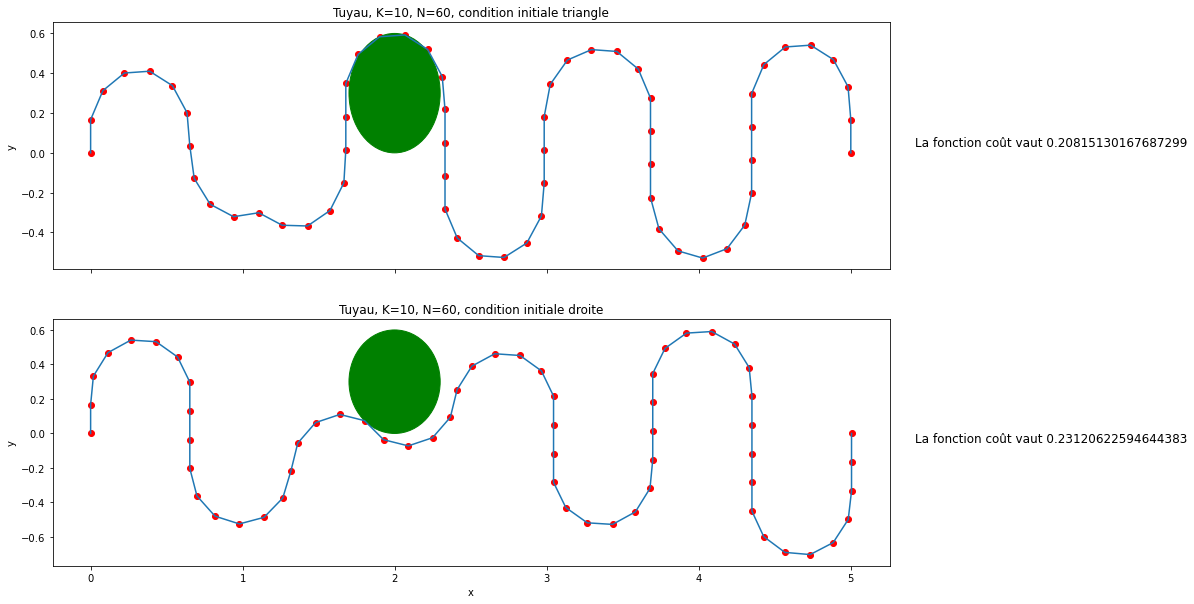

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

cercle1 = plt.Circle((xp, yp), R, color='g')
cercle2 = plt.Circle((xp, yp), R, color='g')

ax1, ax2 = axes

ax1.set_title("Tuyau, K=10, N=60, condition initiale triangle")
ax1.plot(x1, y1)
ax1.scatter(x1, y1, color='r')
ax1.add_patch(cercle1)
ax1.set_ylabel("y")
ax1.text(1.03, 0.5, f'La fonction coût vaut {cout(N,K,L,x1,y1)}', transform=ax1.transAxes, fontsize='large')
ax2.set_title("Tuyau, K=10, N=60, condition initiale droite")
ax2.plot(x2, y2)
ax2.scatter(x2, y2, color='r')
ax2.add_patch(cercle2)
ax2.set_ylabel("y")
ax2.text(1.03, 0.5, f'La fonction coût vaut {cout(N,K,L,x2,y2)}', transform=ax2.transAxes, fontsize='large')

ax2.set_xlabel("x")

plt.show()

Ici avec la condition du parterre de fleurs en plus, pour deux initialisations différentes on a clairement deux solutions différentes avec des coûts différents. On remarque que le manque de points permet au tuyau de chevaucher entre deux points le parterre, une plus grande résolution pourrait palier ce problème.


On procède donc à une augmentation du nombre de points avec $N=260$ :

In [29]:
N = 260

x0,y0 = triangle(L,N)

x1,y1 = solve2(N,K,L,gamma,x0,y0,xp,yp,R)

x0,y0 = droite(L,N)

x2,y2 = solve2(N,K,L,gamma,x0,y0,xp,yp,R)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1043
Number of nonzeros in inequality constraint Jacobian.:     2597
Number of nonzeros in Lagrangian Hessian.............:     1560

Total number of variables............................:      522
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      263
Total number of inequality constraints...............:      781
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      781

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

  79 8.9095158e-001 3.29e-004 5.12e+001  -3.8 1.42e+000  -2.5 5.50e-002 7.49e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 8.8587156e-001 3.01e-004 4.28e+001  -3.8 7.25e-001  -2.1 1.68e-001 8.66e-002h  1
  81 8.3507156e-001 1.93e-004 7.73e+001  -3.8 9.01e-001  -2.6 7.14e-002 4.50e-001h  1
  82 8.3470396e-001 1.72e-004 6.81e+001  -3.8 5.84e-002   2.4 1.15e-001 1.18e-001h  1
  83 8.3435862e-001 1.51e-004 6.12e+001  -3.8 5.05e-002   2.8 1.45e-001 1.25e-001h  1
  84 8.3419551e-001 1.41e-004 7.95e+002  -3.8 4.29e-002   3.2 2.11e-001 6.75e-002h  1
  85 8.3405817e-001 1.32e-004 1.69e+004  -3.8 4.04e-002   3.7 7.11e-001 6.09e-002h  1
  86 8.3395426e-001 1.26e-004 3.54e+004  -3.8 3.82e-002   4.1 2.79e-001 4.90e-002h  1
  87 8.3390353e-001 1.23e-004 1.06e+005  -3.8 3.65e-002   4.5 3.07e-001 2.52e-002h  1
  88 8.3384589e-001 1.19e-004 1.10e+005  -3.8 3.39e-002   4.0 7.48e-001 2.95e-002h  1
  89 8.3378430e-001 1.15e-004 2.32e+005  -3.8 3.42e-002   4

 167 3.6163903e-001 8.43e-005 6.57e+000  -3.8 5.49e+000    -  5.08e-002 5.13e-002h  1
 168 3.5298748e-001 8.54e-005 6.73e+000  -3.8 3.69e+000    -  4.62e-002 4.26e-002h  1
 169 3.4058935e-001 9.35e-005 1.00e+001  -3.8 8.77e+000    -  3.76e-002 2.76e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 170 3.3290507e-001 9.28e-005 9.74e+000  -3.8 3.02e+000    -  5.05e-002 4.74e-002h  1
 171 3.3284299e-001 8.90e-005 3.57e+001  -3.8 2.39e-002   2.3 5.64e-002 4.14e-002h  1
 172 3.3110591e-001 6.77e-005 1.74e+001  -3.8 1.98e-001    -  4.32e-001 2.42e-001f  1
 173 3.2626326e-001 3.47e-005 2.07e+001  -3.8 2.08e-001    -  7.67e-001 4.98e-001f  1
 174 3.1884992e-001 2.24e-005 1.29e+001  -3.8 3.50e-001    -  3.56e-001 3.95e-001h  1
 175 3.1141259e-001 3.01e-005 1.12e+001  -3.8 5.42e-001    -  3.61e-001 2.45e-001h  1
 176 3.0098040e-001 3.86e-005 1.18e+001  -3.8 6.65e-001    -  1.02e-001 3.04e-001h  1
 177 2.9419835e-001 3.70e-005 5.97e+000  -3.8 8.61e-001    

 262 8.2566641e-002 4.33e-006 3.61e+000  -5.7 1.46e-001    -  7.34e-001 3.61e-001f  1
 263 8.2056033e-002 3.89e-006 2.47e+000  -5.7 1.12e-001    -  3.04e-001 3.12e-001h  1
 264 8.1647614e-002 6.09e-006 1.87e+000  -5.7 1.46e-001    -  2.98e-001 2.58e-001f  1
 265 8.1573707e-002 1.86e-006 7.58e-003  -5.7 1.14e-003   0.8 1.00e+000 1.00e+000f  1
 266 8.0989726e-002 5.78e-006 5.63e-001  -5.7 2.71e-001    -  3.82e-001 9.90e-002h  1
 267 7.9657275e-002 4.53e-005 3.37e-001  -5.7 2.89e-001    -  1.22e-001 2.21e-001h  1
 268 7.8883945e-002 5.37e-005 2.61e-001  -5.7 4.34e-001    -  7.46e-002 9.18e-002h  1
 269 7.8303963e-002 5.30e-005 2.49e-001  -5.7 3.35e-001    -  7.77e-002 7.92e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270 7.7975937e-002 5.22e-005 1.01e+000  -5.7 1.30e+000    -  7.25e-002 2.33e-002h  1
 271 7.7060548e-002 5.24e-005 7.10e-001  -5.7 5.31e-001    -  5.18e-002 1.01e-001h  1
 272 7.6934699e-002 5.22e-005 1.38e+000  -5.7 4.85e+000    

 356 5.7484543e-002 8.20e-006 2.17e+000  -5.7 4.87e-001  -2.9 3.04e-002 2.52e-002f  1
 357 5.7440855e-002 8.09e-006 1.83e+000  -5.7 5.69e-001    -  2.41e-002 1.25e-002h  1
 358 5.7246187e-002 2.23e-005 1.82e+000  -5.7 1.73e+000  -3.4 1.83e-002 2.77e-002h  1
 359 5.7190354e-002 1.86e-005 2.43e+000  -5.7 2.54e-001  -3.0 1.52e-001 3.19e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360 5.6808717e-002 1.44e-005 1.74e+000  -5.7 9.44e-002  -2.6 1.40e-001 2.65e-001f  1
 361 5.6498287e-002 5.99e-006 1.37e+000  -5.7 3.39e-002  -2.1 2.38e-001 5.59e-001f  1
 362 5.6375948e-002 5.39e-006 2.40e+000  -5.7 1.14e-001  -2.6 4.70e-001 7.79e-002f  1
 363 5.5979740e-002 7.13e-006 2.02e+000  -5.7 2.80e-001  -3.1 3.43e-002 1.05e-001h  1
 364 5.5958296e-002 7.13e-006 2.76e+000  -5.7 7.77e-001    -  1.98e-002 2.85e-003h  1
 365 5.5793147e-002 9.17e-006 2.68e+000  -5.7 1.41e+000  -3.6 2.20e-002 1.51e-002h  1
 366 5.5627345e-002 1.10e-005 2.53e+000  -5.7 7.24e+000  -4

 453 4.8052639e-002 5.08e-006 1.53e+000  -5.7 9.00e-002  -3.9 1.89e-001 1.96e-001f  1
 454 4.8025131e-002 3.83e-006 1.41e+000  -5.7 1.22e-001    -  7.89e-002 2.68e-001f  1
 455 4.7986577e-002 5.60e-007 5.15e-003  -5.7 1.89e-002  -2.6 1.00e+000 1.00e+000f  1
 456 4.7934755e-002 2.49e-006 1.46e-001  -5.7 6.47e-002  -3.1 8.92e-001 7.91e-001h  1
 457 4.7930034e-002 1.55e-006 8.39e-001  -5.7 5.72e-003  -1.7 2.65e-001 3.86e-001f  1
 458 4.7918225e-002 1.52e-006 5.66e-004  -5.7 5.80e-003  -2.2 1.00e+000 1.00e+000f  1
 459 4.7909782e-002 1.06e-006 4.91e-001  -5.7 4.21e-002  -2.7 9.27e-001 3.39e-001H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460 4.7868256e-002 1.22e-006 2.29e-001  -5.7 5.43e-002  -3.2 6.17e-001 6.94e-001f  1
 461 4.7870137e-002 9.92e-007 4.46e-001  -5.7 6.69e-002    -  2.93e-001 3.73e-001f  1
 462 4.7861129e-002 8.24e-007 9.55e-001  -5.7 7.60e-002    -  3.58e-001 1.72e-001f  1
 463 4.7849529e-002 5.08e-006 7.51e-001  -5.7 1.39e-001  -3

  19 1.9684644e+002 8.84e-003 2.40e+004  -1.0 2.80e+001    -  1.61e-001 5.69e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20 1.7378268e+002 7.88e-003 3.09e+004  -1.0 3.76e+001    -  2.30e-003 1.06e-001f  1
  21 1.7363523e+002 4.15e-003 2.60e+005  -1.0 2.49e-001   3.7 1.27e-002 2.65e-001f  1
  22 1.7361344e+002 3.57e-003 2.47e+005  -1.0 2.91e-001   6.8 1.97e-002 5.15e-002h  1
  23 1.7005107e+002 2.18e-003 2.99e+005  -1.0 8.37e-001    -  9.48e-003 6.87e-001f  1
  24 1.6997803e+002 2.17e-003 2.97e+005  -1.0 5.89e-001    -  8.78e-001 2.07e-002h  1
  25 1.6993480e+002 2.13e-003 6.12e+005  -1.0 5.88e-001    -  7.34e-001 1.63e-002h  1
  26 1.6943670e+002 1.74e-003 6.80e+005  -1.0 5.84e-001    -  1.00e+000 1.91e-001f  1
  27 1.6927957e+002 1.63e-003 5.68e+005  -1.0 5.26e-001    -  1.00e+000 6.72e-002h  1
  28 1.6746314e+002 5.61e-004 9.62e+004  -1.0 5.01e-001    -  1.00e+000 8.23e-001f  1
  29 1.6741960e+002 5.23e-004 1.98e+005  -1.0 1.88e-001    

 115 3.1342400e-001 4.01e-004 9.06e+001  -3.8 3.33e+000    -  4.87e-001 6.78e-001f  1
 116 2.9629886e-001 4.27e-004 8.94e+002  -3.8 2.94e-001  -0.3 2.31e-001 9.64e-001h  1
 117 2.9613498e-001 4.06e-004 8.50e+002  -3.8 6.83e-002   4.6 1.84e-002 4.86e-002h  1
 118 2.9479886e-001 3.77e-004 1.58e+003  -3.8 1.17e+000    -  6.58e-001 7.39e-002h  1
 119 3.0500279e-001 3.05e-004 3.27e+003  -3.8 1.06e+000    -  1.00e+000 1.91e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 3.2537917e-001 2.39e-004 3.38e+003  -3.8 7.83e-001    -  1.00e+000 2.21e-001h  1
 121 3.5297377e-001 1.51e-004 1.55e+003  -3.8 5.34e-001    -  1.00e+000 3.73e-001h  1
 122 3.4725053e-001 7.08e-005 4.52e+002  -3.8 2.30e-001    -  1.00e+000 5.40e-001h  1
 123 2.9879423e-001 1.31e-006 2.65e+000  -3.8 2.75e-001    -  1.00e+000 1.00e+000h  1
 124 2.9895693e-001 1.59e-008 6.93e+000  -3.8 4.76e-004   4.2 1.00e+000 1.00e+000h  1
 125 2.9338669e-001 1.07e-006 5.51e+002  -3.8 5.41e-001    

 202 2.5457182e-001 1.25e-005 8.09e-001  -5.7 1.38e-002  -0.5 2.73e-001 1.67e-001f  1
 203 2.5453028e-001 9.37e-006 2.28e+000  -5.7 1.05e-002  -0.1 1.00e+000 2.46e-001f  1
 204 2.5423595e-001 3.89e-006 1.05e+000  -5.7 6.01e-003  -0.5 3.41e-001 6.02e-001f  1
 205 2.5390103e-001 1.59e-005 7.74e-001  -5.7 6.71e-002  -1.0 1.34e-001 2.21e-001f  1
 206 2.5380187e-001 1.14e-005 7.24e-001  -5.7 6.28e-003  -0.6 5.38e-001 1.81e-001f  1
 207 2.5359428e-001 1.34e-006 4.27e-003  -5.7 4.30e-003  -0.2 1.00e+000 1.00e+000f  1
 208 2.5314312e-001 5.79e-006 1.64e-001  -5.7 8.24e-003  -0.6 9.44e-001 7.45e-001h  1
 209 2.5292308e-001 8.90e-007 4.87e-003  -5.7 3.41e-003  -0.2 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 2.5251797e-001 1.42e-006 3.07e-001  -5.7 7.01e-003  -0.7 1.00e+000 6.04e-001h  1
 211 2.5228058e-001 3.24e-007 5.27e-002  -5.7 2.10e-003  -0.3 1.00e+000 9.49e-001f  1
 212 2.5154032e-001 1.97e-006 1.23e-003  -5.7 6.87e-003  -0

 302 2.0354926e-001 7.53e-006 1.01e+000  -5.7 2.21e-002  -1.2 3.29e-001 2.16e-001f  1
 303 2.0269422e-001 1.26e-005 7.75e-001  -5.7 6.77e-002  -1.7 2.20e-001 2.06e-001f  1
 304 2.0246413e-001 9.61e-006 7.66e-001  -5.7 2.13e-002  -1.3 3.26e-001 1.52e-001f  1
 305 2.0242636e-001 9.47e-006 7.60e-001  -5.7 1.47e+000  -1.8 1.18e-002 6.27e-003h  1
 306 2.0245642e-001 1.03e-005 2.34e+000  -5.7 3.66e-001  -1.3 1.48e-002 3.19e-002h  1
 307 2.0195878e-001 3.27e-006 5.14e-001  -5.7 1.03e-002  -0.9 7.91e-001 7.83e-001f  1
 308 2.0125164e-001 3.98e-006 3.87e-001  -5.7 3.40e-002  -1.4 6.52e-001 3.66e-001f  1
 309 2.0069052e-001 5.10e-005 5.74e-001  -5.7 2.72e-001  -1.9 1.27e-001 8.43e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 310 2.0015242e-001 3.75e-005 5.31e-001  -5.7 4.36e-002  -1.4 3.60e-001 2.41e-001f  1
 311 1.9976252e-001 1.80e-005 2.57e-001  -5.7 1.41e-002  -1.0 5.22e-001 4.78e-001f  1
 312 1.9939995e-001 1.16e-004 3.89e-001  -5.7 1.47e-001  -1

 403 1.5717775e-001 7.93e-006 7.66e-001  -5.7 4.89e-002  -1.6 2.55e-001 4.02e-001f  1
 404 1.5680886e-001 6.27e-006 1.10e+000  -5.7 1.48e-002  -1.1 1.00e+000 5.62e-001f  1
 405 1.5563302e-001 5.87e-006 3.84e-001  -5.7 5.07e-002  -1.6 4.90e-001 6.37e-001f  1
 406 1.5546780e-001 5.55e-006 1.41e+000  -5.7 2.51e-001  -2.1 1.20e-001 2.33e-002h  1
 407 1.5468183e-001 1.26e-005 9.46e-001  -5.7 5.14e-002  -1.7 1.92e-001 3.74e-001f  1
 408 1.5444455e-001 1.31e-005 1.62e+000  -5.7 1.76e-001  -2.1 1.06e-001 3.09e-002f  1
 409 1.5417063e-001 1.03e-005 2.07e+000  -5.7 1.25e-001  -1.7 1.79e-001 1.05e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 410 1.5348657e-001 1.49e-005 6.67e-001  -5.7 2.71e-002  -1.3 4.84e-001 7.53e-001f  1
 411 1.5298376e-001 2.08e-005 8.69e-001  -5.7 7.05e-002  -1.8 4.17e-001 1.74e-001f  1
 412 1.5247487e-001 1.89e-005 7.27e-001  -5.7 1.52e-001  -2.2 1.85e-001 6.46e-002f  1
 413 1.4992921e-001 1.56e-004 6.25e-001  -5.7 9.14e-001  -2

 502 1.0696963e-001 1.58e-005 1.77e+000  -5.7 3.01e-001  -2.7 3.19e-002 9.17e-002f  1
 503 1.0674151e-001 1.61e-005 1.67e+000  -5.7 1.03e+001  -3.2 4.65e-003 1.38e-003f  1
 504 1.0617123e-001 1.65e-005 1.57e+000  -5.7 3.52e-001  -2.8 5.03e-002 6.79e-002h  1
 505 1.0612095e-001 1.65e-005 1.50e+000  -5.7 1.97e+001    -  9.72e-004 1.70e-004h  1
 506 1.0591329e-001 1.69e-005 1.85e+000  -5.7 3.50e+000  -3.3 8.06e-003 6.05e-003f  1
 507 1.0590229e-001 1.69e-005 3.55e+000  -5.7 5.28e-001  -3.7 2.70e-002 3.18e-003h  1
 508 1.0549240e-001 1.66e-005 3.42e+000  -5.7 2.67e+000    -  2.52e-002 1.99e-002f  1
 509 1.0533303e-001 1.62e-005 3.32e+000  -5.7 5.00e-001  -3.3 3.80e-002 2.64e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 510 1.0531133e-001 1.62e-005 3.24e+000  -5.7 8.14e+000    -  1.72e-003 4.73e-004h  1
 511 1.0509330e-001 1.58e-005 3.34e+000  -5.7 8.69e-001    -  1.26e-002 2.75e-002f  1
 512 1.0487475e-001 1.60e-005 3.33e+000  -5.7 3.59e+000  -3

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 590 8.6553625e-002 1.16e-005 6.05e+000  -5.7 2.25e+000  -2.9 3.46e-002 3.76e-003h  1
 591 8.6139883e-002 9.87e-006 5.93e+000  -5.7 2.32e-001  -2.5 3.45e-001 1.36e-001f  1
 592 8.5909670e-002 8.62e-006 5.53e+000  -5.7 2.45e-001  -2.9 5.82e-002 9.29e-002h  1
 593 8.5271815e-002 1.38e-005 4.26e+000  -5.7 2.91e-001  -2.5 1.03e-001 1.56e-001f  1
 594 8.5028566e-002 1.14e-005 3.04e+000  -5.7 8.66e-002  -2.1 3.27e-001 1.81e-001f  1
 595 8.4913638e-002 1.09e-005 2.13e+000  -5.7 1.45e-001  -2.6 1.39e-001 4.65e-002h  1
 596 8.4389108e-002 1.55e-005 1.49e+000  -5.7 9.03e-002  -2.1 1.74e-001 3.60e-001f  1
 597 8.4338886e-002 1.54e-005 1.26e+000  -5.7 2.12e-001  -2.6 4.33e-002 1.50e-002h  1
 598 8.4095531e-002 1.63e-005 1.14e+000  -5.7 4.68e-001  -3.1 6.97e-002 3.38e-002f  1
 599 8.3842537e-002 2.26e-005 1.36e+000  -5.7 7.33e-001  -3.6 1.96e-002 3.66e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) 

 691 6.9728413e-002 1.60e-005 1.93e+000  -5.7 1.21e-001  -1.9 1.37e-001 1.56e-001f  1
 692 6.9726025e-002 1.50e-005 3.35e+000  -5.7 1.14e-002  -1.5 1.90e-001 5.67e-002f  1
 693 6.9478647e-002 8.85e-005 2.69e+000  -5.7 8.59e-002  -2.0 4.05e-002 4.64e-001f  1
 694 6.9318490e-002 7.21e-005 3.27e+000  -5.7 9.53e-002  -2.5 3.83e-002 9.61e-002f  1
 695 6.9295360e-002 8.07e-005 3.47e+000  -5.7 7.30e-001  -3.0 2.54e-004 2.70e-003f  1
 696 6.9293455e-002 7.85e-005 3.47e+000  -5.7 4.95e+000    -  5.70e-007 6.63e-005h  1
 697 6.9285762e-002 8.08e-005 3.53e+000  -5.7 1.52e+002  -3.4 2.85e-008 4.32e-006f  1
 698 6.9285739e-002 8.07e-005 3.53e+000  -5.7 5.77e+000    -  4.01e-007 2.46e-006f  2
 699 6.9285738e-002 8.07e-005 2.91e+001  -5.7 5.76e+000  -1.2 7.00e-003 8.80e-008h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 700 6.9231892e-002 7.66e-005 2.78e+001  -5.7 2.30e-001    -  4.59e-002 4.46e-002h  1
 701 6.9228054e-002 7.27e-005 2.10e+001  -5.7 2.31e-002  -1

 793 5.7708707e-002 1.81e-006 5.49e-001  -5.7 3.12e-002  -2.3 2.73e-001 2.32e-001f  1
 794 5.7669255e-002 2.66e-006 2.39e-001  -5.7 8.97e-003  -1.9 5.61e-001 5.68e-001f  1
 795 5.7614613e-002 5.23e-007 6.08e-001  -5.7 3.03e-002  -2.4 6.88e-001 4.53e-001f  1
 796 5.7537903e-002 7.02e-007 5.42e-001  -5.7 1.02e-001  -2.9 2.52e-001 2.11e-001f  1
 797 5.7506498e-002 8.10e-007 5.41e+000  -5.7 9.73e-002    -  1.65e-001 4.60e-001f  1
 798 5.7443305e-002 8.76e-007 6.92e+000  -5.7 1.60e+000  -3.3 3.95e-002 1.50e-002h  1
 799 5.7146502e-002 1.34e-005 2.77e+000  -5.7 2.92e-001  -2.9 1.55e-001 4.05e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 800 5.7140583e-002 1.28e-005 2.65e+000  -5.7 2.99e-002  -0.7 3.59e-002 4.38e-002h  1
 801 5.7140286e-002 1.24e-005 8.21e+000  -5.7 2.99e-002  -1.2 1.54e-001 3.27e-002h  1
 802 5.7090376e-002 9.23e-006 5.26e+000  -5.7 1.00e-002  -1.6 7.58e-001 2.54e-001f  1
 803 5.7060316e-002 8.79e-006 5.85e+000  -5.7 1.67e-001    

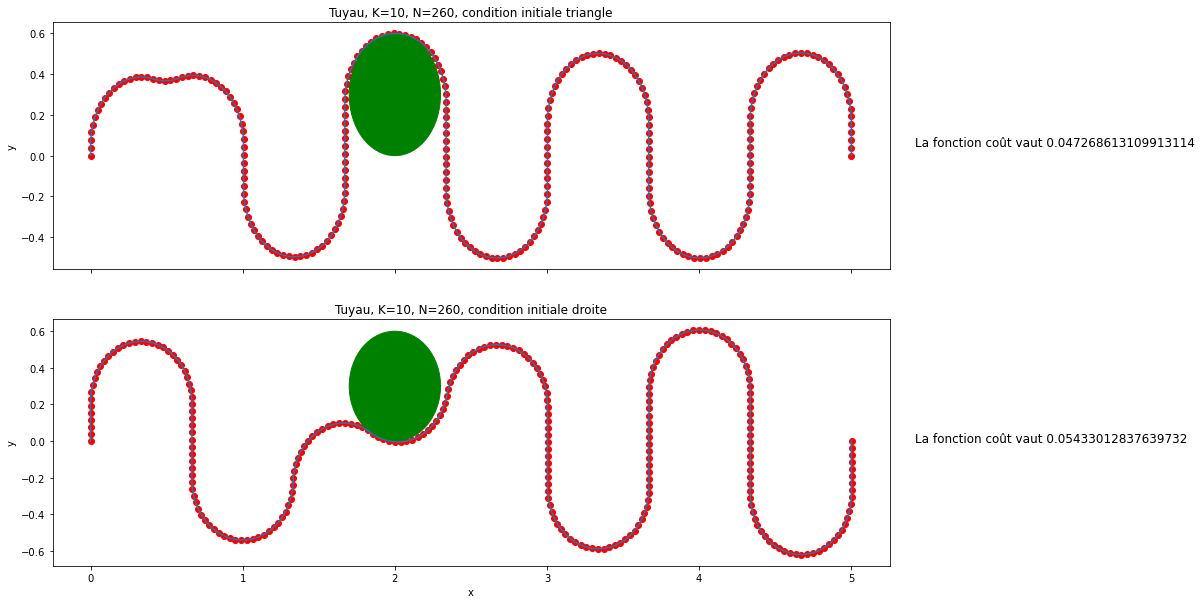

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

cercle1 = plt.Circle((xp, yp), R, color='g')
cercle2 = plt.Circle((xp, yp), R, color='g')

ax1, ax2 = axes

ax1.set_title("Tuyau, K=10, N=260, condition initiale triangle")
ax1.plot(x1, y1)
ax1.scatter(x1, y1, color='r')
ax1.add_patch(cercle1)
ax1.set_ylabel("y")
ax1.text(1.03, 0.5, f'La fonction coût vaut {cout(N,K,L,x1,y1)}', transform=ax1.transAxes, fontsize='large')

ax2.set_title("Tuyau, K=10, N=260, condition initiale droite")
ax2.plot(x2, y2)
ax2.scatter(x2, y2, color='r')
ax2.add_patch(cercle2)
ax2.set_ylabel("y")
ax2.text(1.03, 0.5, f'La fonction coût vaut {cout(N,K,L,x2,y2)}', transform=ax2.transAxes, fontsize='large')


ax2.set_xlabel("x")

plt.show()

La condition en plus n'affecte en rien le caractère non-convexe du problème étudié et la non-unicité des solutions, justement la contrainte du cercle de fleurs semble empêcher les résolutions aux différentes initialisation de converger vers la solution de l'autre, le tuyau étant contraint de rester d'un côté du parterre.

### Question 12

#### a)

Ce choix d'intégrer ces contraintes dans la fonction à minimiser permet de choisir une initialisation aléatoire plus simple, dont seulement le point $(x_{0},y_{0})$ serait contraint égal à $(0,0)$.

#### b)

Pour choisir les conditions initiales aléatoirement, on va procéder de la manière suivante :


Chaque point étant contraint distant de $dx$ du prochain, et avec pour tout $i\in\{0,1,...,N-1\}$


$$x_{i+1}\geq x_{i}$$


Alors le seul paramètre restant séparant chaque point est leur angle par rapport à l'axe des $x$. C'est ce qu'on va exploiter dans la suite.

In [31]:
# Fonction solve3 pour résoudre le problème avec CasADI avec la contrainte du parterre de fleurs et l'initialisation
# aléatoire

def solve3(N,K1,K2,x0,y0):
    
    # constantes
    
    dx = L/N

    # résolution CasADI
    
    opti = casadi.Opti()

    x = opti.variable(N+1)
    y = opti.variable(N+1)

    f = K1*(x[N] - L/2)**2 + K2*y[N]**2 + dx**2*casadi.sumsqr(y)
    opti.minimize(f)

    # contraintes égalité
    
    opti.subject_to(x[0] == 0)
    opti.subject_to(y[0] == 0)
    for i in range(N):
        opti.subject_to((x[i+1] - x[i])**2 + (y[i+1] - y[i])**2 - dx**2 == 0)

    # contraintes inégalité
    
    opti.subject_to(-y[1] <= 0)
    for i in range(N):
        opti.subject_to(x[i] - x[i+1] <= 0)
        opti.subject_to(R**2 - (x[i] - xp)**2 - (y[i] - yp)**2 <= 0)
    for i in range(N-1):
        opti.subject_to((x[i+2] - 2*x[i+1] + x[i])**2 + (y[i+2] - 2*y[i+1] + y[i])**2 - dx**4*gamma**2 <= 0)

    opti.set_initial(x, x0)
    opti.set_initial(y, y0)

    opti.solver('ipopt')
    sol = opti.solve()

    return sol.value(x), sol.value(y)

In [32]:
# Fonction aléatoire pour l'initialisation

def aleatoire(N):
    
    # constantes
    
    dx = L/N
    
    # initialisation
    
    x0, y0 = np.empty(N+1), np.empty(N+1)
    x0[0], y0[0] = 0, 0

    theta = np.pi*np.random.random()/2
    x0[1], y0[1] = x0[0] + dx*np.cos(theta), y0[0] + dx*np.sin(theta)

    i = 2
    
    # génération des points
    
    while i <= N:
        
        stop = False
        compteur = 0
        
        while stop == False:
            
            theta = np.pi*np.random.random() - np.pi/2
            x, y = x0[i-1] + dx*np.cos(theta), y0[i-1] + dx*np.sin(theta)
            
            if R**2 - (x - xp)**2 - (y - yp)**2 <= 0 and (x - 2*x0[i-1] + x0[i-2])**2 + (y - 2*y0[i-1] + y0[i-2])**2 - dx**4*gamma**2 <= 0:
                
                stop = True
                x0[i], y0[i] = x, y
                i = i + 1
                
            else:
                
                compteur = compteur + 1
                
                if compteur == 10: # 10 essais infructueux
                    
                    stop = True
                    i = i - 1
                    
    return x0, y0

In [33]:
def global_min(N,K1,K2,n):
    
    # constantes
    
    dx = L/N

    def cout(x,y):
        return K1*(x[N] - L/2)**2 + K2*y[N]**2 + (dx)**2*np.sum(y**2)

    x0,y0 = aleatoire(N)
    xres,yres = solve3(N,K1,K2,x0,y0)
    cres = cout(xres,yres)

    for i in range(2,n+1):
        x0,y0 = aleatoire(N)
        x,y = solve3(N,K1,K2,x0,y0)
        c = cout(x,y)
        if c<cres:
            cres,xres,yres = c,x,y
    
    return cres,xres,yres

In [34]:
N = 60
L = 10
gamma = 3
xp,yp,R = 2,0.3,0.3
K1,K2 = 10,10
n = 100

c,x,y = global_min(N,K1,K2,n)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 122 2.2052725e-001 9.55e-005 1.04e-003  -3.8 3.19e-002  -1.5 1.00e+000 1.00e+000h  1
 123 2.1674013e-001 1.52e-003 1.08e-001  -5.7 1.82e-001  -2.0 4.33e-001 5.63e-001h  1
 124 2.1487411e-001 1.06e-003 7.36e-002  -5.7 7.56e-002  -1.5 3.79e-001 3.94e-001h  1
 125 2.1300728e-001 8.73e-004 4.62e-002  -5.7 3.34e-001  -2.0 2.94e-001 2.19e-001h  1
 126 2.1112638e-001 3.22e-004 1.92e-001  -5.7 6.99e-002  -1.6 3.59e-001 6.50e-001h  1
 127 2.1046321e-001 1.02e-003 1.82e-001  -5.7 2.69e-001  -2.1 8.81e-002 7.66e-002h  1
 128 2.1019666e-001 7.14e-004 1.29e-001  -5.7 4.53e-002  -1.6 2.71e-001 2.36e-001h  1
 129 2.1013638e-001 6.77e-004 1.39e-001  -5.7 2.93e-002  -1.2 3.49e-001 5.04e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 2.0941755e-001 3.42e-004 7.19e-002  -5.7 3.63e-002  -1.7 8.28e-002 5.49e-001f  1
 131 2.0896959e-001 1.61e-004 3.95e-002  -5.7 3.08e-002  -1.3 4.22e-001 5.15e-001f  1
 132 2.0871102e-001 1.19e-004 5.39e-002  -5.7 7.15e-002  -1

  66 5.2995160e-001 8.60e-003 2.68e-001  -2.5 3.35e+000    -  1.86e-001 1.06e-001h  1
  67 4.9016983e-001 5.75e-003 6.76e-002  -2.5 3.74e-001  -1.8 1.00e+000 1.00e+000h  1
  68 4.6477382e-001 4.14e-003 2.38e-001  -2.5 7.37e-001    -  3.69e-001 5.68e-001H  1
  69 4.5997075e-001 3.91e-003 2.34e-001  -2.5 2.04e+000    -  2.02e-001 8.13e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.5438099e-001 4.26e-003 2.28e-001  -2.5 1.49e+000    -  2.16e-001 1.87e-001h  2
  71 4.2787932e-001 1.99e-003 1.47e-001  -2.5 4.97e-001  -2.3 7.18e-001 5.76e-001H  1
  72 4.2812831e-001 1.73e-003 4.64e-001  -2.5 1.16e+000    -  3.83e-001 1.47e-001h  2
  73 4.2639030e-001 1.63e-003 8.46e-001  -2.5 2.95e+000    -  2.81e-001 5.62e-002h  3
  74 4.2694540e-001 1.64e-003 1.07e+000  -2.5 5.36e+000    -  6.11e-002 2.45e-002h  3
  75 4.2649694e-001 1.52e-003 1.00e+000  -2.5 7.40e-001  -2.7 1.00e+000 1.58e-001h  3
  76 4.2354115e-001 1.46e-003 1.81e-002  -2.5 3.29e-001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 119 5.1932828e-001 1.53e-004 1.99e-001  -3.8 4.57e-002  -0.9 4.89e-001 1.09e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 5.1478028e-001 1.81e-004 3.98e-001  -3.8 1.74e-001  -1.4 9.73e-001 3.19e-001f  1
 121 5.1307672e-001 1.73e-003 3.31e-001  -3.8 1.69e+000  -1.8 7.25e-002 3.50e-002h  1
 122 5.0699537e-001 1.09e-003 2.08e-001  -3.8 2.03e-001  -1.4 4.43e-001 3.83e-001f  1
 123 5.0011880e-001 1.51e-004 1.16e-001  -3.8 5.92e-002  -1.0 6.14e-001 1.00e+000f  1
 124 4.9351865e-001 4.48e-003 2.44e-001  -3.8 9.44e-001  -1.5 2.23e-002 1.96e-001h  1
 125 4.9068178e-001 4.02e-003 2.54e-001  -3.8 1.84e-001  -1.0 2.59e-001 1.79e-001f  1
 126 4.8996572e-001 3.60e-003 2.58e-001  -3.8 2.26e-001  -0.6 7.82e-001 1.07e-001f  1
 127 4.7943519e-001 1.00e-003 6.57e-002  -3.8 9.40e-002  -1.1 1.00e+000 7.37e-001h  1
 128 4.7554802e-001 1.44e-004 2.21e-001  -3.8 2.65e-002  -0.7 4.94e-001 1.00e+000f  1
 129 4.6950305e-001 1.73e-004 3.43e-001  -3.8 6.30e-002  -1

 247 2.0793989e-001 3.26e-006 1.89e-004  -5.7 4.99e-003  -1.4 1.00e+000 1.00e+000h  1
 248 2.0793559e-001 3.41e-006 2.70e-002  -5.7 8.11e-001    -  1.29e-002 1.44e-003h  2
 249 2.0791931e-001 2.41e-007 1.10e-004  -5.7 8.18e-003  -1.9 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 2.0792220e-001 8.26e-008 2.08e-005  -5.7 1.51e-003    -  1.00e+000 1.00e+000h  1
 251 2.0792181e-001 1.62e-008 5.49e-007  -5.7 5.59e-004    -  1.00e+000 1.00e+000h  1
 252 2.0782212e-001 3.55e-006 4.64e-003  -8.6 6.29e-003    -  5.80e-001 8.25e-001h  1
 253 2.0779677e-001 5.43e-007 7.57e-004  -8.6 1.39e-003    -  9.74e-001 8.81e-001h  1
 254 2.0779319e-001 2.19e-009 3.80e-008  -8.6 1.49e-004    -  1.00e+000 1.00e+000f  1
 255 2.0779319e-001 1.12e-015 2.51e-014  -8.6 1.34e-007    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 255

                                   (scaled)                 (unscaled)
Objective...............:  1.6731470120163

  69 1.7281979e+000 1.19e-003 6.99e-002  -3.8 1.29e-001  -0.6 1.00e+000 6.41e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 1.7188110e+000 5.14e-004 4.62e-001  -3.8 4.20e-002  -0.1 1.00e+000 3.69e-001f  1
  71 1.6716849e+000 4.25e-004 2.23e-001  -3.8 1.17e-001  -0.6 1.00e+000 6.93e-001f  1
  72 1.6451069e+000 1.26e-004 3.03e-002  -3.8 4.72e-002  -0.2 1.00e+000 1.00e+000f  1
  73 1.6151051e+000 3.01e-004 7.02e-002  -3.8 1.45e-001  -0.7 7.09e-001 3.92e-001h  1
  74 1.6059025e+000 2.23e-004 5.31e-001  -3.8 4.19e-002  -0.2 2.16e-001 3.81e-001f  1
  75 1.5748942e+000 1.37e-003 2.34e-001  -3.8 2.30e-001  -0.7 2.28e-001 3.86e-001f  1
  76 1.5601994e+000 7.54e-004 3.41e-001  -3.8 6.79e-002  -0.3 1.00e+000 5.16e-001f  1
  77 1.5493476e+000 1.08e-003 5.32e-001  -3.8 4.17e-001  -0.8 4.68e-001 1.12e-001f  1
  78 1.5470290e+000 1.00e-003 1.66e-001  -3.8 6.53e-002  -0.3 1.00e+000 7.41e-002h  1
  79 1.4993310e+000 1.04e-003 9.99e-002  -3.8 1.95e-001  -0

 203 2.9446679e-001 6.52e-004 4.43e-001  -3.8 3.42e-001  -2.0 3.44e-001 5.18e-001f  1
 204 2.9184067e-001 4.41e-004 3.22e-001  -3.8 1.18e-001  -1.6 1.00e+000 3.89e-001f  1
 205 2.8934932e-001 6.80e-004 4.66e-001  -3.8 1.03e-001  -2.1 5.22e-001 1.00e+000f  1
 206 2.8735905e-001 5.50e-004 3.61e-001  -3.8 1.05e+000  -2.6 2.11e-001 2.23e-001h  1
 207 2.8548518e-001 1.16e-003 3.45e-001  -3.8 2.06e-001    -  4.81e-001 7.72e-001f  1
 208 2.8581909e-001 1.40e-003 8.26e-002  -3.8 2.67e-001  -2.1 7.02e-001 1.00e+000f  1
 209 2.8134017e-001 4.10e-004 4.96e-003  -3.8 1.10e-001  -1.7 1.00e+000 9.97e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 2.8059783e-001 4.16e-004 1.02e-001  -3.8 9.14e-001  -2.2 1.11e-001 4.97e-002h  1
 211 2.7953774e-001 3.92e-004 3.21e-001  -3.8 4.21e-001    -  3.06e-001 9.77e-002h  1
 212 2.8023208e-001 1.12e-003 2.56e-001  -3.8 2.12e+000  -2.7 2.81e-002 4.63e-002h  2
 213 2.7799978e-001 1.31e-003 2.39e-001  -3.8 1.23e+000  -2

  66 4.1922568e-001 2.50e-004 8.82e-003  -3.8 3.01e-002  -0.5 1.00e+000 1.00e+000f  1
  67 4.1468930e-001 7.84e-004 1.15e-001  -3.8 5.46e-001  -1.0 2.35e-001 1.01e-001h  1
  68 4.1116309e-001 3.10e-004 1.97e-001  -3.8 1.09e-001  -1.5 4.34e-001 6.27e-001f  1
  69 4.0252496e-001 7.78e-003 1.01e-001  -3.8 2.60e-001  -1.1 3.73e-001 4.57e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.0036812e-001 6.23e-003 9.93e-002  -3.8 1.53e-001  -1.5 2.69e-001 2.33e-001h  1
  71 3.9946191e-001 6.08e-003 9.76e-002  -3.8 3.53e+000  -2.0 2.35e-002 2.22e-002f  1
  72 3.9593605e-001 3.55e-003 1.59e-001  -3.8 1.60e-001  -1.6 1.86e-001 4.00e-001f  1
  73 3.9207258e-001 3.42e-003 4.04e-001  -3.8 9.91e-001  -1.2 1.59e-001 4.93e-002h  1
  74 3.8865696e-001 2.06e-003 2.61e-001  -3.8 1.02e-001  -0.7 1.00e+000 3.50e-001f  1
  75 3.8673465e-001 3.42e-004 5.76e-001  -3.8 4.57e-002  -1.2 2.37e-001 7.85e-001h  1
  76 3.8184124e-001 1.36e-003 2.19e-002  -3.8 7.81e-002  -0

 187 2.0835698e-001 2.50e-005 9.66e-003  -5.7 1.79e-001  -2.3 2.45e-001 1.17e-001f  1
 188 2.0829480e-001 2.58e-005 4.69e-004  -5.7 5.94e-002    -  1.00e+000 1.00e+000F  1
 189 2.0827497e-001 4.36e-006 8.11e-004  -5.7 1.82e-002    -  1.00e+000 9.63e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 2.0826818e-001 2.52e-006 1.85e-002  -5.7 2.42e-002  -2.8 3.56e-001 8.96e-001F  1
 191 2.0826804e-001 1.95e-007 1.88e-004  -5.7 8.37e-003  -2.4 1.00e+000 1.00e+000F  1
 192 2.0826935e-001 2.01e-006 3.03e-003  -5.7 1.07e-001  -2.9 1.60e-001 1.04e-001h  3
 193 2.0826917e-001 2.32e-006 2.46e-002  -5.7 2.08e-002  -2.4 1.00e+000 2.58e-001h  2
 194 2.0824253e-001 2.42e-005 1.41e-002  -5.7 1.02e-001  -2.9 4.88e-001 8.03e-001H  1
 195 2.0820976e-001 3.97e-005 1.64e-004  -5.7 5.11e-002  -2.5 1.00e+000 1.00e+000f  1
 196 2.0819233e-001 4.35e-005 8.88e-002  -5.7 5.32e-001  -3.0 2.36e-001 3.25e-002h  2
 197 2.0812426e-001 3.06e-007 2.27e-004  -5.7 1.25e-003  -0

  71 3.7316545e-001 1.05e-002 1.81e-001  -3.8 1.91e+000  -2.8 8.68e-002 1.11e-001h  1
  72 3.5055425e-001 1.07e-002 1.00e-001  -3.8 1.37e+000    -  1.18e-001 1.48e-001h  1
  73 3.3434774e-001 7.55e-003 3.87e-001  -3.8 2.21e-001  -1.5 2.21e-001 3.32e-001h  1
  74 3.2607703e-001 6.93e-003 3.28e-001  -3.8 5.36e-001    -  1.76e-001 1.83e-001h  1
  75 3.1824855e-001 5.81e-003 2.77e-001  -3.8 1.00e+000    -  1.45e-001 1.49e-001h  1
  76 3.0062329e-001 2.18e-003 7.67e-001  -3.8 1.46e-001  -1.1 3.11e-001 8.43e-001h  1
  77 2.9726313e-001 2.05e-003 6.48e-001  -3.8 7.88e-001    -  2.10e-001 8.44e-002h  1
  78 2.8978465e-001 2.65e-003 3.43e-001  -3.8 5.82e-001    -  1.32e-001 3.57e-001h  1
  79 2.8045959e-001 1.86e-003 2.64e-001  -3.8 3.40e-001  -1.5 2.88e-001 4.38e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 2.7357468e-001 4.42e-003 2.60e-001  -3.8 8.63e-001  -2.0 1.15e-001 1.55e-001h  1
  81 2.7098116e-001 5.21e-003 4.65e-001  -3.8 3.66e+000    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

 134 2.6783495e-001 4.99e-006 5.36e-002  -5.7 1.05e-001    -  1.87e-001 8.56e-002h  2
 135 2.6782999e-001 3.59e-006 1.71e-002  -5.7 1.80e-003  -1.1 1.00e+000 2.81e-001h  2
 136 2.6782765e-001 5.07e-006 3.45e-002  -5.7 4.43e-002    -  7.19e-001 1.99e-001h  3
 137 2.6781784e-001 2.45e-007 5.29e-005  -5.7 2.23e-003  -1.6 1.00e+000 1.00e+000h  1
 138 2.6780120e-001 2.51e-006 9.74e-003  -5.7 3.43e-002    -  7.90e-001 1.00e+000H  1
 139 2.6780863e-001 1.20e-006 1.09e-004  -5.7 1.73e-003  -1.2 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.6780641e-001 3.81e-006 2.54e-003  -5.7 3.93e-003  -1.7 7.39e-001 1.00e+000h  1
 141 2.6779960e-001 1.75e-006 1.43e-004  -5.7 2.55e-003  -1.3 1.00e+000 1.00e+000h  1
 142 2.6779300e-001 5.82e-005 1.32e-002  -5.7 1.61e-002  -1.7 6.06e-001 1.00e+000h  1
 143 2.6769570e-001 1.39e-005 3.97e-004  -5.7 7.95e-003  -1.3 1.00e+000 1.00e+000h  1
 144 2.6761848e-001 4.36e-005 4.82e-002  -5.7 6.44e-002  -1

  65 3.3596369e-001 4.07e-003 5.29e-001  -3.8 1.36e+000    -  3.32e-001 2.89e-001h  1
  66 3.3132373e-001 5.94e-003 4.07e-001  -3.8 9.74e-001    -  2.44e-001 2.60e-001h  1
  67 3.2335099e-001 5.03e-003 3.54e-001  -3.8 7.26e-001    -  1.81e-001 2.69e-001h  1
  68 3.0870594e-001 3.48e-003 2.60e-001  -3.8 3.37e-001    -  2.75e-001 6.18e-001h  1
  69 3.0064258e-001 1.28e-003 7.47e-002  -3.8 4.48e-002  -0.5 1.00e+000 6.52e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.9451352e-001 3.96e-004 5.76e-003  -3.8 3.26e-002  -1.0 9.46e-001 1.00e+000h  1
  71 2.9230946e-001 3.91e-004 4.08e-002  -3.8 7.06e-002  -1.5 5.81e-001 7.04e-001H  1
  72 2.9071445e-001 1.90e-003 8.13e-002  -3.8 3.02e-001  -1.9 7.25e-001 4.27e-001f  1
  73 2.8930567e-001 1.33e-003 4.70e-002  -3.8 6.92e-002  -1.5 4.90e-001 5.52e-001f  1
  74 2.8770254e-001 3.01e-004 6.33e-003  -3.8 2.90e-002  -1.1 1.00e+000 1.00e+000f  1
  75 2.8471866e-001 1.29e-003 7.86e-003  -3.8 2.53e-001  -1

  77 7.6183321e+000 1.27e-002 1.26e+000  -3.8 6.21e-001  -1.4 4.22e-001 2.99e-002h  1
  78 7.5200925e+000 4.33e-003 1.80e-001  -3.8 2.85e-001  -0.9 9.51e-001 7.09e-001f  1
  79 7.3478005e+000 3.31e-003 2.85e-001  -3.8 8.57e-001  -1.4 3.37e-001 4.33e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 7.2553097e+000 2.86e-003 1.05e+000  -3.8 3.70e+000  -1.9 2.47e-001 7.10e-002f  1
  81 7.1744726e+000 3.05e-003 1.67e+000  -3.8 7.21e+000  -2.4 1.16e-001 2.55e-002f  1
  82 7.0811197e+000 8.18e-003 1.65e+000  -3.8 5.04e+000  -1.9 1.61e-001 5.54e-002f  1
  83 7.0203255e+000 7.94e-003 5.25e+000  -3.8 5.33e+000  -2.4 2.08e-001 2.11e-002h  1
  84 6.5912945e+000 6.82e-003 3.38e+000  -3.8 3.84e+000  -2.0 9.07e-002 3.31e-001f  1
  85 6.5427552e+000 4.06e-003 3.14e+000  -3.8 2.35e-001  -0.7 2.68e-001 4.03e-001h  1
  86 6.3590379e+000 2.72e-003 1.74e+000  -3.8 4.27e-001  -1.1 3.94e-001 7.16e-001f  1
  87 6.2031527e+000 2.35e-003 1.45e+000  -3.8 1.00e+000  -1

 210 2.8998303e-001 2.37e-004 2.22e-001  -3.8 2.09e+001    -  1.07e-002 1.80e-003h  2
 211 2.8918305e-001 3.11e-004 1.94e-001  -3.8 1.91e+000    -  1.46e-002 2.24e-002h  2
 212 2.8828052e-001 2.82e-004 2.68e-001  -3.8 1.65e-001  -2.1 3.85e-001 1.46e-001h  2
 213 2.8565403e-001 1.06e-004 2.21e-003  -3.8 9.54e-002  -1.7 1.00e+000 1.00e+000h  1
 214 2.8242255e-001 2.69e-004 4.92e-002  -3.8 2.13e-001  -2.1 5.12e-001 6.35e-001h  1
 215 2.8062750e-001 1.67e-004 7.52e-002  -3.8 1.09e-001  -1.7 6.99e-001 5.95e-001f  1
 216 2.7999803e-001 3.73e-005 1.13e-001  -3.8 3.00e-002  -1.3 7.65e-001 1.00e+000f  1
 217 2.7844202e-001 2.69e-004 2.61e-001  -3.8 3.86e-001  -1.8 3.24e-001 1.82e-001h  2
 218 2.7592075e-001 1.11e-004 2.89e-003  -3.8 5.94e-002  -1.3 1.00e+000 1.00e+000h  1
 219 2.7329755e-001 2.35e-004 1.56e-001  -3.8 3.03e-001  -1.8 7.06e-001 3.06e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 220 2.7170855e-001 1.70e-004 1.75e-001  -3.8 6.24e-002  -1

      solver  :   t_proc      (avg)   t_wall      (avg)    n_eval
       nlp_f  |        0 (       0)        0 (       0)       417
       nlp_g  |  66.00ms (158.27us)  64.15ms (153.83us)       417
  nlp_grad_f  |   2.00ms (  5.76us)   2.00ms (  5.77us)       347
  nlp_hess_l  |  87.00ms (252.17us)  89.08ms (258.21us)       345
   nlp_jac_g  |  97.00ms (279.54us)  97.25ms (280.27us)       347
       total  |   1.03 s (  1.03 s)   1.03 s (  1.03 s)         1
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
          

  77 4.3131990e-001 1.88e-003 1.89e-001  -2.5 1.54e-001  -1.5 8.08e-001 1.00e+000f  1
  78 4.1453991e-001 7.72e-004 3.96e-001  -2.5 1.92e-001  -2.0 6.39e-001 1.00e+000H  1
  79 4.1305787e-001 4.95e-004 5.76e-002  -2.5 2.63e-001    -  8.55e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 4.1287881e-001 5.28e-004 3.28e-001  -2.5 3.58e+000  -2.5 8.40e-002 2.73e-002h  3
  81 4.0969924e-001 1.07e-003 9.69e-001  -2.5 5.84e-001  -2.1 9.82e-001 3.20e-001h  2
  82 4.0784806e-001 1.42e-003 1.11e+000  -2.5 2.46e+000    -  1.20e-001 4.67e-002h  2
  83 4.0236471e-001 7.63e-004 2.05e-002  -2.5 8.56e-002  -1.6 1.00e+000 1.00e+000h  1
  84 3.8499887e-001 1.58e-003 2.50e-001  -3.8 6.51e-001    -  2.71e-001 3.68e-001h  1
  85 3.6501765e-001 7.72e-004 1.72e-001  -3.8 1.50e-001  -1.2 7.26e-001 7.91e-001h  1
  86 3.5259516e-001 1.11e-003 1.23e-001  -3.8 6.66e-002  -0.8 8.24e-001 1.00e+000h  1
  87 3.3874683e-001 3.09e-002 5.21e-002  -3.8 2.16e-001  -1

  71 3.7031394e-001 1.19e-002 4.96e-001  -3.8 3.13e-001  -1.5 1.75e-001 3.51e-001h  1
  72 3.6518581e-001 1.11e-002 4.27e-001  -3.8 5.39e-001  -2.0 1.59e-001 7.18e-002h  1
  73 3.5764643e-001 1.02e-002 3.33e-001  -3.8 9.97e-001  -1.6 2.68e-001 1.18e-001h  1
  74 3.5230004e-001 1.02e-002 3.35e-001  -3.8 5.67e+000  -2.1 1.80e-002 8.61e-003h  1
  75 3.5387731e-001 1.02e-002 3.37e-001  -3.8 9.67e-001  -1.6 1.80e-002 2.24e-002h  3
  76 3.4802071e-001 1.67e-002 3.75e-001  -3.8 8.73e-001  -1.2 1.09e-001 1.77e-001h  1
  77 3.3499990e-001 1.15e-002 2.56e-001  -3.8 5.45e-001  -1.7 2.20e-001 2.38e-001h  1
  78 3.3164675e-001 1.24e-002 2.42e-001  -3.8 1.95e+001    -  8.53e-003 5.45e-003h  1
  79 3.2769047e-001 1.09e-002 1.72e-001  -3.8 4.38e-001    -  2.09e-001 1.30e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 3.2575571e-001 1.02e-002 1.50e-001  -3.8 3.11e-001  -2.2 1.30e-001 1.19e-001f  1
  81 3.2230253e-001 9.04e-003 1.90e-001  -3.8 3.87e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

 130 2.3839803e-001 1.16e-005 3.17e-003  -3.8 6.22e-002    -  1.00e+000 1.00e+000h  1
 131 2.3838239e-001 1.26e-005 4.46e-004  -3.8 4.07e-002    -  1.00e+000 1.00e+000h  1
 132 2.3601801e-001 8.20e-005 2.00e-001  -5.7 1.12e-001    -  3.62e-001 6.26e-001h  1
 133 2.3450188e-001 7.38e-005 1.34e-001  -5.7 4.34e-002  -2.2 3.88e-001 5.05e-001h  1
 134 2.3258538e-001 1.55e-004 8.27e-002  -5.7 1.19e-001  -2.7 3.79e-001 7.55e-001h  1
 135 2.3163760e-001 7.48e-005 2.89e-002  -5.7 9.13e-002  -2.3 8.91e-001 1.00e+000h  1
 136 2.3129787e-001 3.52e-005 2.83e-002  -5.7 5.18e-002  -1.8 1.00e+000 7.24e-001h  1
 137 2.3117045e-001 8.71e-006 1.58e-003  -5.7 3.48e-002    -  1.00e+000 1.00e+000f  1
 138 2.3108065e-001 1.50e-006 1.78e-003  -5.7 1.24e-002    -  1.00e+000 9.47e-001h  1
 139 2.3107536e-001 1.09e-009 4.33e-009  -5.7 2.94e-004    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.3097743e-001 6.10e-007 1.75e-004  -8.6 4.70e-003    

  76 3.3636368e+000 4.43e-003 9.96e-001  -2.5 2.16e+000  -1.7 3.67e-001 6.81e-001f  1
  77 3.0914346e+000 2.31e-003 1.23e+000  -2.5 7.69e-001  -1.3 1.00e+000 5.89e-001h  1
  78 2.6614335e+000 7.67e-003 8.15e-001  -2.5 2.14e+000  -1.8 2.46e-001 4.50e-001h  1
  79 2.4711830e+000 9.45e-003 1.20e+000  -2.5 1.36e+001  -2.3 1.07e-001 5.39e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 2.1125971e+000 1.15e-002 7.23e-001  -2.5 2.61e+000  -1.8 1.42e-001 3.44e-001h  1
  81 2.0519699e+000 1.16e-002 7.58e-001  -2.5 2.55e+002  -2.3 3.41e-003 2.49e-003h  1
  82 1.9415988e+000 1.07e-002 8.22e-001  -2.5 4.17e+000  -1.9 3.01e-001 8.56e-002h  1
  83 1.8380705e+000 1.36e-002 8.48e-001  -2.5 1.26e+001  -2.4 3.85e-002 2.44e-002h  1
  84 1.4480451e+000 1.24e-002 1.00e+000  -2.5 3.47e+000  -1.9 7.77e-002 3.08e-001h  1
  85 1.3616363e+000 1.13e-002 4.83e-001  -2.5 1.94e+000  -1.5 2.36e-001 9.91e-002h  1
  86 1.2473664e+000 1.23e-002 3.89e-001  -2.5 6.28e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 128 3.1242980e-001 7.70e-005 2.83e-003  -3.8 3.54e-002  -1.1 1.00e+000 1.00e+000f  1
 129 3.0946202e-001 3.74e-004 1.64e-002  -3.8 1.70e-001  -1.6 4.28e-001 3.87e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 3.0812340e-001 4.38e-004 1.43e-001  -3.8 3.93e-001  -2.1 1.90e-001 1.20e-001f  1
 131 3.0847385e-001 6.29e-004 1.98e-001  -3.8 2.35e-001    -  3.40e-001 6.27e-001f  1
 132 3.0704894e-001 6.28e-004 1.79e-001  -3.8 8.55e-002  -1.6 2.29e-001 4.47e-001f  1
 133 3.0615390e-001 1.09e-004 4.89e-002  -3.8 2.06e-002  -1.2 1.00e+000 7.74e-001f  1
 134 3.0469953e-001 1.29e-004 4.04e-002  -3.8 1.03e+000  -1.7 2.63e-002 2.78e-002h  2
 135 3.0180080e-001 3.61e-004 1.55e-001  -3.8 7.16e-002  -1.3 1.00e+000 6.72e-001h  1
 136 2.9858324e-001 1.23e-003 6.69e-001  -3.8 1.71e-001  -1.7 4.76e-001 1.00e+000f  1
 137 2.9763715e-001 1.06e-003 4.83e-001  -3.8 6.26e-002  -1.3 2.85e-001 2.14e-001h  1
 138 2.9594606e-001 1.44e-004 2.63e-001  -3.8 1.99e-002  -0

  69 4.4824707e-001 7.43e-003 3.00e+000  -2.5 2.67e+000    -  6.01e-001 6.43e-002h  4
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.4287443e-001 4.93e-003 2.83e-002  -2.5 7.41e-001    -  1.00e+000 1.00e+000h  1
  71 4.4150292e-001 4.90e-003 7.63e-001  -2.5 4.15e+000    -  1.13e-001 1.41e-002h  4
  72 4.4123533e-001 4.89e-003 1.51e+000  -2.5 1.25e+001  -3.0 3.10e-002 1.03e-003h  6
  73 4.4084851e-001 4.84e-003 2.84e+000  -2.5 1.98e+000    -  3.31e-001 1.97e-002h  5
  74 4.3776215e-001 1.17e-002 3.17e-002  -2.5 4.96e-001    -  1.00e+000 1.00e+000h  1
  75 4.1653754e-001 7.29e-003 5.52e-001  -2.5 7.70e-001  -2.5 7.34e-001 4.24e-001H  1
  76 4.0310339e-001 2.24e-003 6.28e-002  -2.5 6.72e-001  -3.0 1.00e+000 1.00e+000H  1
  77 4.1400197e-001 2.08e-003 2.07e-002  -2.5 1.96e-001    -  1.00e+000 1.00e+000h  1
  78 3.9341006e-001 1.34e-002 5.09e-002  -3.8 1.64e+000    -  2.70e-001 2.90e-001h  1
  79 3.6536991e-001 1.60e-002 1.49e-001  -3.8 1.12e+000    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

 118 6.6192995e-001 3.15e-003 2.36e+000  -3.8 9.27e-002  -0.5 9.67e-002 2.03e-001h  1
 119 6.5948722e-001 1.84e-003 1.42e+000  -3.8 8.69e-002  -0.1 3.42e-001 4.01e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 6.5228802e-001 3.62e-004 1.53e-001  -3.8 4.94e-002  -0.6 6.27e-001 1.00e+000f  1
 121 6.3936579e-001 3.22e-004 2.72e-002  -3.8 1.23e-001  -1.0 8.75e-001 9.63e-001h  1
 122 6.2519409e-001 2.63e-003 1.44e-001  -3.8 4.28e-001  -1.5 5.90e-002 3.35e-001f  1
 123 6.0782616e-001 1.19e-003 2.64e-002  -3.8 1.67e-001  -1.1 9.24e-001 1.00e+000f  1
 124 6.0490151e-001 9.39e-004 2.33e-001  -3.8 8.74e-002  -0.7 1.00e+000 3.44e-001h  1
 125 5.9482528e-001 3.42e-003 1.29e-001  -3.8 2.24e-001  -1.1 2.50e-001 3.76e-001f  1
 126 5.9415944e-001 3.48e-003 5.53e-001  -3.8 6.86e+000  -0.7 1.54e-002 1.90e-003h  2
 127 5.9257947e-001 2.55e-003 2.22e-001  -3.8 3.70e-002  -0.3 6.08e-001 2.68e-001h  1
 128 5.8788297e-001 4.67e-003 4.49e-001  -3.8 1.09e-001  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 122 3.6285400e-001 9.33e-004 1.26e-002  -3.8 1.97e-002  -0.6 1.00e+000 9.16e-001h  1
 123 3.6018114e-001 7.44e-004 5.90e-003  -3.8 5.77e-002  -1.0 1.00e+000 1.00e+000f  1
 124 3.5667559e-001 6.85e-004 9.47e-002  -3.8 2.20e-001  -1.5 4.84e-001 2.85e-001h  1
 125 3.5229824e-001 1.39e-003 3.75e-002  -3.8 9.03e-002  -1.1 1.00e+000 7.46e-001f  1
 126 3.4909327e-001 1.19e-003 2.85e-001  -3.8 1.89e-001  -1.6 4.74e-001 1.73e-001h  1
 127 3.4242348e-001 6.16e-004 8.79e-003  -3.8 1.05e-001  -1.1 1.00e+000 9.70e-001f  1
 128 3.3807749e-001 4.04e-004 1.08e-001  -3.8 2.58e-001  -1.6 3.44e-001 2.60e-001f  1
 129 3.3219337e-001 2.87e-004 1.07e-001  -3.8 9.11e-002  -1.2 6.45e-001 8.78e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 3.2537611e-001 1.42e-003 3.18e-001  -3.8 9.79e-001  -1.7 6.34e-002 1.35e-001f  1
 131 3.2274688e-001 1.39e-003 3.70e-001  -3.8 8.10e-001  -2.2 1.04e-001 3.04e-002h  1
 132 3.1874184e-001 1.30e-003 4.86e-001  -3.8 7.58e-001  -1

  70 3.7619193e-001 2.95e-003 2.93e-001  -3.8 1.90e-001    -  6.44e-001 8.21e-001h  1
  71 3.7410774e-001 5.70e-004 5.46e-002  -3.8 1.31e-002   0.7 7.87e-001 1.00e+000f  1
  72 3.7209452e-001 1.15e-004 3.28e-002  -3.8 1.83e-002   0.2 1.00e+000 1.00e+000h  1
  73 3.6683941e-001 6.64e-004 3.05e-002  -3.8 5.11e-002  -0.3 1.00e+000 1.00e+000h  1
  74 3.5893216e-001 4.98e-003 3.48e-002  -3.8 1.40e-001  -0.7 5.02e-001 6.76e-001h  1
  75 3.5178347e-001 7.31e-003 9.77e-002  -3.8 1.23e-001  -1.2 2.21e-001 4.00e-001f  1
  76 3.4829736e-001 2.18e-003 1.15e-001  -3.8 6.28e-002  -0.8 1.00e+000 4.49e-001f  1
  77 3.4183888e-001 3.96e-003 7.82e-002  -3.8 2.87e-001  -1.3 3.00e-001 2.47e-001f  1
  78 3.3615414e-001 3.01e-003 1.08e-001  -3.8 3.19e-001  -1.7 3.20e-001 2.06e-001f  1
  79 3.3272879e-001 2.56e-003 1.51e-001  -3.8 3.25e-001  -1.3 2.93e-001 1.42e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 3.2700640e-001 2.02e-003 1.12e-001  -3.8 4.21e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 144 3.5359803e-001 1.55e-003 6.91e-001  -3.8 3.96e-001    -  4.29e-002 5.86e-002h  1
 145 3.4976918e-001 3.85e-004 1.46e+000  -3.8 8.03e-002  -1.5 2.71e-001 7.91e-001f  1
 146 3.4585682e-001 3.77e-004 1.54e+000  -3.8 1.61e+000    -  1.13e-001 5.47e-002f  1
 147 3.3758014e-001 4.96e-004 1.25e+000  -3.8 9.64e-001  -2.0 2.15e-001 1.85e-001h  1
 148 3.3549981e-001 4.01e-004 8.41e-001  -3.8 2.71e-001    -  1.38e-001 2.26e-001h  1
 149 3.3064813e-001 3.39e-004 7.03e-001  -3.8 8.08e-001    -  1.52e-001 1.57e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 3.2104778e-001 4.93e-004 1.43e-001  -3.8 2.89e-001  -1.6 8.21e-001 7.66e-001f  1
 151 3.1392248e-001 9.65e-004 2.36e-001  -3.8 4.29e+001  -2.0 5.54e-003 3.66e-003h  1
 152 3.0286918e-001 1.23e-003 3.98e-001  -3.8 6.16e-001  -1.6 2.94e-001 3.99e-001h  1
 153 3.0246884e-001 1.22e-003 3.18e-001  -3.8 2.03e+000    -  3.35e-002 1.11e-002h  1
 154 3.0225174e-001 1.17e-003 3.04e-001  -3.8 6.30e-001    

  63 6.0159476e-001 1.06e-003 3.18e-002  -2.5 9.42e-002  -0.7 1.00e+000 1.00e+000f  1
  64 5.8854376e-001 1.06e-003 2.32e-001  -2.5 4.00e+000    -  5.88e-002 3.29e-002h  2
  65 5.5478175e-001 1.38e-003 3.95e-002  -2.5 1.96e-001  -1.2 1.00e+000 1.00e+000h  1
  66 4.8522748e-001 1.71e-002 1.63e-001  -2.5 9.06e-001  -1.6 7.96e-001 7.58e-001h  1
  67 4.8197772e-001 1.70e-002 2.29e-001  -2.5 2.44e+001    -  7.24e-003 2.98e-003h  3
  68 4.6776392e-001 1.12e-002 2.50e-001  -2.5 7.24e-001  -2.1 2.36e-001 3.66e-001h  1
  69 4.2705440e-001 1.52e-002 8.01e-001  -2.5 8.69e-001  -1.7 2.71e-001 6.16e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.1334131e-001 6.42e-003 8.11e-001  -2.5 6.92e-001    -  3.93e-001 8.00e-001H  1
  71 3.8787502e-001 8.09e-003 1.45e+000  -2.5 3.63e+000    -  2.20e-002 1.62e-001F  1
  72 3.7202716e-001 3.12e-003 1.20e+000  -2.5 4.52e-001    -  3.39e-001 8.03e-001h  1
  73 3.5886637e-001 5.68e-003 8.80e-001  -2.5 1.32e+000  -2

  66 5.6256060e-001 2.70e-003 1.11e-001  -3.8 6.80e-002  -0.9 6.13e-001 1.00e+000f  1
  67 5.5958920e-001 7.28e-004 2.00e-002  -3.8 2.53e-002  -0.5 8.43e-001 8.25e-001h  1
  68 5.5287645e-001 1.98e-003 1.15e-002  -3.8 5.98e-002  -1.0 1.00e+000 9.27e-001f  1
  69 5.4978207e-001 3.07e-004 4.61e-002  -3.8 2.18e-002  -0.6 6.16e-001 8.79e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 5.4863970e-001 2.21e-004 9.23e-003  -3.8 1.07e-002  -0.1 1.00e+000 1.00e+000f  1
  71 5.4443270e-001 9.65e-004 9.92e-003  -3.8 3.36e-002  -0.6 1.00e+000 1.00e+000h  1
  72 5.3671229e-001 9.33e-003 1.72e-002  -3.8 3.06e-001  -1.1 4.25e-001 3.31e-001h  1
  73 5.3073790e-001 7.10e-003 2.30e-002  -3.8 2.91e-001  -1.6 2.35e-001 1.89e-001h  1
  74 5.2618656e-001 4.98e-003 1.58e-002  -3.8 1.82e-001  -1.1 2.80e-001 2.72e-001f  1
  75 5.2088461e-001 2.07e-002 1.20e-001  -3.8 1.23e-001  -0.7 4.28e-001 1.00e+000f  1
  76 5.1512217e-001 2.95e-002 1.43e-001  -3.8 4.22e-001  -1

 188 2.1413582e-001 8.90e-005 2.12e-002  -5.7 2.01e-002  -1.5 1.00e+000 3.25e-001f  1
 189 2.1337964e-001 9.79e-005 6.91e-002  -5.7 7.21e-002  -1.9 1.99e-001 7.94e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 2.1321741e-001 7.76e-005 1.07e-002  -5.7 2.99e-002  -1.5 7.89e-001 2.22e-001f  1
 191 2.1245966e-001 1.54e-004 5.89e-002  -5.7 1.11e-001  -2.0 2.12e-001 6.73e-001f  1
 192 2.1207295e-001 1.04e-004 4.21e-002  -5.7 4.23e-002  -1.6 7.22e-001 3.69e-001f  1
 193 2.1198816e-001 7.88e-005 5.96e-002  -5.7 8.59e-003  -1.1 4.26e-001 2.48e-001f  1
 194 2.1176383e-001 5.66e-005 2.10e-002  -5.7 3.96e-002  -1.6 5.22e-001 3.21e-001f  1
 195 2.1156001e-001 4.93e-005 3.15e-002  -5.7 1.59e-001  -2.1 2.71e-001 1.34e-001f  1
 196 2.1122627e-001 2.40e-005 1.56e-002  -5.7 3.74e-002  -1.7 7.29e-001 6.20e-001f  1
 197 2.1111494e-001 2.75e-005 2.17e-002  -5.7 1.80e-001  -2.2 2.13e-001 7.28e-002f  1
 198 2.1078958e-001 1.03e-004 3.24e-002  -5.7 4.02e+001  -2

  67 4.9562310e-001 3.03e-003 6.39e-001  -2.5 4.48e+000    -  1.01e-001 4.06e-002h  2
  68 4.7246746e-001 3.73e-003 6.45e-001  -2.5 4.45e+000    -  7.90e-002 6.28e-002h  2
  69 4.6912249e-001 3.99e-003 7.72e-001  -2.5 3.25e+000  -2.5 8.81e-002 3.68e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.5316502e-001 1.31e-003 3.55e-002  -2.5 1.03e-001  -1.2 1.00e+000 1.00e+000h  1
  71 4.4168076e-001 1.53e-003 4.13e-001  -2.5 1.29e+000    -  3.64e-001 1.58e-001h  2
  72 4.3139077e-001 2.48e-003 6.42e-001  -2.5 5.24e+000    -  9.79e-002 4.69e-002h  2
  73 4.2707515e-001 2.09e-003 3.72e-002  -2.5 2.16e-001  -1.7 1.00e+000 1.00e+000h  1
  74 4.2506188e-001 7.21e-004 6.12e-003  -2.5 8.73e-002  -1.3 1.00e+000 1.00e+000h  1
  75 3.7960181e-001 7.09e-003 7.97e-001  -3.8 8.12e-001  -1.7 4.14e-001 7.21e-001h  1
  76 3.6655980e-001 1.52e-002 5.98e-001  -3.8 6.24e-001  -1.3 2.05e-001 1.59e-001h  1
  77 3.5093070e-001 1.51e-002 5.83e-001  -3.8 7.89e+000  -1

  72 2.8236017e-001 1.22e-003 2.02e-001  -3.8 2.15e-001  -1.7 3.01e-001 4.93e-001h  1
  73 2.7785536e-001 8.05e-004 1.03e-001  -3.8 1.01e-001  -1.3 5.84e-001 4.60e-001h  1
  74 2.7092639e-001 1.01e-002 3.03e-001  -3.8 9.00e-001  -1.8 8.97e-002 3.09e-001f  1
  75 2.6922798e-001 6.84e-003 4.95e-001  -3.8 1.14e-001  -1.4 5.18e-001 2.26e-001h  1
  76 2.6377954e-001 6.92e-003 5.66e-001  -3.8 3.32e+000  -1.8 7.80e-002 4.26e-002h  1
  77 2.6173109e-001 6.61e-003 5.47e-001  -3.8 9.21e-001  -2.3 3.69e-002 4.24e-002h  1
  78 2.5906118e-001 5.24e-003 3.94e-001  -3.8 2.32e-001  -1.9 2.37e-001 2.10e-001f  1
  79 2.5384998e-001 4.86e-004 9.10e-001  -3.8 1.00e-001  -1.5 3.60e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 2.5314350e-001 7.54e-004 9.60e-001  -3.8 1.69e+003  -1.9 8.57e-005 3.88e-005f  2
  81 2.4941762e-001 1.66e-003 5.56e-001  -3.8 1.70e-001  -1.5 4.53e-001 4.28e-001h  1
  82 2.4660975e-001 9.97e-004 3.77e-001  -3.8 2.24e-001  -2

  61 9.5890331e-001 9.70e-003 1.00e+000  -2.5 4.72e+000    -  1.14e-001 1.02e-001h  1
  62 8.6447826e-001 5.23e-003 2.76e+000  -2.5 3.13e-001  -0.9 3.66e-001 1.00e+000h  1
  63 8.0309758e-001 3.49e-003 2.83e+000  -2.5 5.47e-001  -1.4 6.90e-001 3.38e-001h  1
  64 7.4998498e-001 5.37e-003 2.57e+000  -2.5 2.43e+000  -1.9 1.99e-002 1.38e-001h  1
  65 6.6600389e-001 3.35e-003 1.24e+000  -2.5 6.43e-001  -1.5 4.29e-001 5.30e-001f  1
  66 6.5211023e-001 2.73e-003 8.99e-001  -2.5 6.08e-001  -1.9 2.88e-001 2.73e-001h  1
  67 5.9788373e-001 1.16e-002 3.43e-001  -2.5 6.71e-001  -1.5 5.65e-001 6.93e-001f  1
  68 5.5122205e-001 1.12e-002 1.11e+000  -2.5 2.75e+000    -  8.75e-002 1.58e-001h  1
  69 5.3154411e-001 9.85e-003 9.80e-001  -2.5 1.08e+000  -2.0 2.39e-001 1.42e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 5.0192237e-001 7.34e-003 2.37e+000  -2.5 3.24e-001  -1.6 2.72e-001 1.00e+000h  1
  71 4.9247619e-001 7.04e-003 2.54e+000  -2.5 2.86e+000    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

 131 2.8573727e-001 6.08e-006 1.81e-003  -3.8 1.32e-002  -0.9 1.00e+000 1.00e+000h  1
 132 2.8539186e-001 7.29e-005 1.60e-003  -3.8 3.51e-002  -1.3 1.00e+000 1.00e+000h  1
 133 2.8421028e-001 2.90e-004 2.04e-001  -3.8 8.73e-001    -  9.58e-002 2.17e-001H  1
 134 2.8244202e-001 6.23e-004 2.50e-002  -3.8 1.54e-001  -1.8 1.00e+000 1.00e+000f  1
 135 2.8023722e-001 9.62e-005 2.38e-003  -3.8 5.88e-002  -1.4 1.00e+000 1.00e+000h  1
 136 2.7952365e-001 9.72e-005 2.51e-001  -3.8 1.66e-001  -1.9 1.00e+000 1.55e-001h  2
 137 2.7900017e-001 2.13e-004 3.55e-001  -3.8 2.92e-001  -2.3 3.57e-001 1.57e-001h  2
 138 2.7536492e-001 2.72e-004 1.46e-001  -3.8 2.62e-001  -1.9 1.00e+000 6.84e-001H  1
 139 2.7468521e-001 3.06e-004 8.08e-002  -3.8 4.37e-001    -  2.02e-001 1.56e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.7312677e-001 9.11e-005 8.51e-002  -3.8 9.11e-002    -  8.20e-001 1.00e+000f  1
 141 2.7267716e-001 3.04e-004 4.41e-001  -3.8 6.67e-001    

  67 8.0638089e-001 6.27e-003 5.91e-001  -3.8 1.00e+000  -1.8 1.30e-001 1.10e-001h  1
  68 7.5546075e-001 6.97e-003 3.62e-001  -3.8 3.44e-001  -1.4 4.53e-001 4.00e-001f  1
  69 6.9947767e-001 5.24e-003 2.76e-001  -3.8 1.09e+000  -1.9 1.28e-001 2.35e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 6.5972276e-001 2.32e-003 1.92e-001  -3.8 3.90e-001  -1.5 2.33e-001 4.78e-001h  1
  71 6.3885293e-001 1.01e-003 2.11e-001  -3.8 1.50e-001  -1.0 1.00e+000 6.15e-001f  1
  72 6.2712215e-001 1.48e-004 1.33e-002  -3.8 5.53e-002  -0.6 1.00e+000 1.00e+000f  1
  73 6.1031708e-001 1.31e-003 1.31e-002  -3.8 1.56e-001  -1.1 6.32e-001 6.87e-001h  1
  74 6.0683517e-001 5.84e-004 1.18e+000  -3.8 3.85e-002  -0.7 3.57e-001 6.41e-001f  1
  75 5.9162925e-001 6.11e-003 6.12e-001  -3.8 1.37e-001  -1.1 9.95e-001 6.20e-001f  1
  76 5.8315980e-001 1.42e-003 1.64e-001  -3.8 4.62e-002  -0.7 6.72e-001 8.89e-001f  1
  77 5.7644420e-001 1.30e-003 1.43e-001  -3.8 2.74e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6

 127 5.8192061e-001 9.91e-004 2.16e-001  -3.8 3.92e-002  -0.8 2.60e-001 3.71e-001f  1
 128 5.7165430e-001 1.07e-003 1.92e-001  -3.8 5.56e-001  -1.3 1.44e-001 1.30e-001h  1
 129 5.7129937e-001 6.40e-004 8.72e-001  -3.8 4.84e-002  -0.8 2.25e-001 8.09e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 5.6543055e-001 1.69e-004 5.52e-001  -3.8 1.07e-001  -1.3 9.18e-001 2.98e-001f  1
 131 5.6324360e-001 2.74e-004 4.14e-001  -3.8 1.50e-001  -0.9 2.35e-001 2.11e-001f  1
 132 5.5066422e-001 1.38e-003 1.91e-001  -3.8 4.52e-001  -1.4 5.38e-001 5.38e-001f  1
 133 5.3869395e-001 7.41e-004 1.51e-001  -3.8 8.34e-002  -0.9 3.70e-001 4.67e-001h  1
 134 5.2430881e-001 1.52e-003 2.16e-001  -3.8 1.06e+000  -1.4 5.47e-002 9.00e-002h  1
 135 5.1605129e-001 1.50e-003 2.92e-001  -3.8 3.33e+000  -1.9 2.87e-002 1.40e-002h  1
 136 5.0708520e-001 1.45e-003 3.07e-001  -3.8 4.25e+000    -  4.19e-002 3.12e-002h  1
 137 4.9286518e-001 1.09e-003 2.56e-001  -3.8 1.86e-001  -1

 258 2.0849717e-001 5.21e-005 2.78e-002  -5.7 1.04e-001    -  1.04e-001 5.28e-001H  1
 259 2.0840916e-001 1.51e-005 6.22e-004  -5.7 2.92e-003  -0.7 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 260 2.0836992e-001 1.70e-004 4.57e-003  -5.7 1.18e-002  -1.1 5.35e-001 7.09e-001h  1
 261 2.0836010e-001 1.45e-006 5.81e-004  -5.7 1.92e-002    -  1.00e+000 1.00e+000F  1
 262 2.0836040e-001 1.49e-005 4.49e-003  -5.7 5.91e-002    -  3.99e-001 2.93e-001h  2
 263 2.0833178e-001 3.79e-006 5.41e-005  -5.7 2.29e-003  -1.6 1.00e+000 1.00e+000h  1
 264 2.0833144e-001 5.06e-007 2.57e-005  -5.7 3.27e-003  -2.1 1.00e+000 1.00e+000h  1
 265 2.0833162e-001 8.52e-007 7.20e-003  -5.7 1.98e-002  -2.6 4.72e-001 1.20e-001h  3
 266 2.0833038e-001 1.32e-006 3.19e-005  -5.7 4.56e-003  -2.2 1.00e+000 1.00e+000h  1
 267 2.0833136e-001 3.07e-006 1.77e-003  -5.7 1.66e-001    -  1.21e-001 9.22e-002h  2
 268 2.0832303e-001 3.20e-006 3.85e-005  -5.7 1.65e-002  -2

  75 3.5535519e-001 2.10e-003 2.69e-001  -3.8 8.36e-001  -2.0 4.43e-002 3.85e-001f  1
  76 3.5316579e-001 1.57e-003 2.06e-001  -3.8 1.71e-001  -1.6 2.47e-001 2.59e-001h  1
  77 3.4200437e-001 1.17e-003 1.26e-001  -3.8 1.10e-001  -1.1 1.00e+000 8.76e-001f  1
  78 3.3879846e-001 7.89e-004 3.07e-001  -3.8 7.22e-002  -0.7 6.09e-001 3.92e-001h  1
  79 3.3528132e-001 8.51e-004 2.67e-001  -3.8 2.85e-001  -1.2 1.73e-001 1.44e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 3.3437378e-001 8.03e-004 2.64e-001  -3.8 4.23e-001  -1.7 1.38e-001 4.87e-002h  1
  81 3.3405687e-001 1.21e-003 2.83e-001  -3.8 5.31e-001    -  2.33e-001 1.72e-001f  1
  82 3.3258465e-001 1.15e-003 2.52e-001  -3.8 7.15e-001  -2.1 8.39e-003 4.87e-002f  1
  83 3.3143986e-001 1.21e-003 2.52e-001  -3.8 1.92e-001    -  1.68e-001 3.92e-001f  1
  84 3.2754863e-001 2.14e-003 3.03e-001  -3.8 2.20e+000  -1.7 5.41e-002 4.00e-002f  1
  85 3.2532528e-001 1.08e-003 2.99e-001  -3.8 1.13e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 138 2.1183595e-001 2.13e-005 5.72e-004  -3.8 2.57e-002  -1.9 1.00e+000 1.00e+000h  1
 139 2.1017844e-001 3.78e-004 1.98e-001  -5.7 1.19e-001  -2.4 5.63e-001 2.91e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.0814666e-001 4.32e-004 1.49e-001  -5.7 6.30e-002  -1.9 2.47e-001 6.97e-001h  1
 141 2.0779445e-001 4.12e-004 1.25e-001  -5.7 1.08e+000    -  1.38e-001 6.43e-002h  1
 142 2.0722438e-001 8.05e-004 8.20e-002  -5.7 9.78e-002    -  5.70e-001 2.17e-001h  1
 143 2.0696929e-001 8.72e-004 1.21e-001  -5.7 5.20e-002    -  5.40e-001 2.75e-001h  1
 144 2.0684651e-001 8.16e-004 1.11e-001  -5.7 4.30e-001    -  3.56e-001 6.33e-002h  1
 145 2.0674715e-001 7.35e-004 7.38e-002  -5.7 8.87e-002    -  3.22e-001 9.69e-002h  1
 146 2.0615261e-001 2.23e-004 3.06e-002  -5.7 4.53e-002    -  5.45e-001 6.96e-001f  1
 147 2.0584751e-001 2.65e-005 4.00e-004  -5.7 1.96e-002    -  1.00e+000 1.00e+000f  1
 148 2.0581273e-001 4.18e-007 6.19e-006  -5.7 5.22e-003    

  60 9.9550486e+001 3.88e-003 1.93e+000  -1.0 3.29e-001   0.3 1.00e+000 1.00e+000f  1
  61 9.8327788e+001 1.24e-002 1.84e+001  -1.0 4.26e+000  -0.2 2.63e-001 1.17e-001f  1
  62 9.8018930e+001 4.24e-003 4.06e+001  -1.0 2.60e-001   1.2 5.84e-001 1.00e+000f  1
  63 9.7125893e+001 9.17e-004 2.21e+000  -1.0 1.30e-001   0.7 1.00e+000 1.00e+000f  1
  64 9.4226287e+001 1.20e-002 3.71e+000  -1.0 4.26e-001   0.2 1.00e+000 1.00e+000f  1
  65 9.3434666e+001 2.87e-003 2.57e+000  -1.0 2.27e-001   0.6 9.68e-001 1.00e+000f  1
  66 9.1283385e+001 4.62e-003 3.33e+000  -1.0 3.91e-001   0.2 1.00e+000 1.00e+000f  1
  67 8.8215639e+001 1.45e-002 4.18e+000  -1.0 1.21e+000  -0.3 5.90e-001 4.65e-001f  1
  68 8.6336653e+001 1.85e-003 1.42e+000  -1.0 3.70e-001   0.1 1.00e+000 1.00e+000f  1
  69 8.1352800e+001 1.58e-003 1.16e+000  -1.0 1.07e+000  -0.4 1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 7.6104095e+001 2.43e-003 1.13e+001  -1.0 2.53e+000  -0

 178 1.9804520e+000 3.54e-003 1.74e+000  -3.8 3.07e-001  -1.2 1.48e-001 2.86e-001h  1
 179 1.8942322e+000 3.63e-003 1.29e+000  -3.8 1.18e+000  -1.6 2.52e-002 1.76e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 1.8780139e+000 2.96e-003 1.71e+000  -3.8 2.16e-001  -1.2 8.02e-002 1.98e-001f  1
 181 1.8484794e+000 1.83e-003 1.07e+000  -3.8 1.31e-001  -0.8 3.03e-001 3.84e-001f  1
 182 1.7255649e+000 2.59e-003 4.24e-001  -3.8 3.59e-001  -1.3 4.10e-001 6.74e-001f  1
 183 1.7194042e+000 2.59e-003 3.66e-001  -3.8 2.15e+000  -1.7 6.52e-002 7.12e-003h  1
 184 1.7154539e+000 2.54e-003 3.67e-001  -3.8 4.25e-001  -1.3 2.70e-001 1.70e-002h  1
 185 1.7132103e+000 2.48e-003 3.77e-001  -3.8 2.29e-001  -0.9 1.00e+000 2.53e-002f  1
 186 1.6916395e+000 2.24e-003 3.29e-001  -3.8 4.57e-001  -1.4 1.00e+000 9.65e-002h  1
 187 1.5390399e+000 1.68e-002 2.41e-001  -3.8 1.64e+000  -1.8 3.18e-001 2.65e-001h  1
 188 1.4788074e+000 1.23e-002 2.31e-001  -3.8 5.79e-001  -1

 287 2.4837900e-001 2.12e-004 2.55e-001  -3.8 3.88e-001    -  4.32e-001 1.62e-001h  2
 288 2.4554989e-001 1.45e-004 2.93e-002  -3.8 1.57e-001  -2.1 9.04e-001 8.68e-001H  1
 289 2.4487694e-001 1.61e-004 9.11e-002  -3.8 1.76e+000    -  7.92e-002 5.19e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 290 2.4474913e-001 2.66e-005 1.82e-003  -3.8 2.83e-002  -1.7 1.00e+000 1.00e+000h  1
 291 2.4376154e-001 1.50e-004 1.05e-003  -3.8 9.86e-002  -2.2 1.00e+000 1.00e+000h  1
 292 2.3910344e-001 3.77e-004 4.16e-001  -5.7 6.00e-002  -1.8 4.71e-001 9.76e-001h  1
 293 2.3838117e-001 9.35e-004 3.69e-001  -5.7 1.67e-001  -1.3 1.39e-001 1.86e-001h  1
 294 2.3592372e-001 8.87e-004 1.75e-001  -5.7 1.33e-001  -1.8 5.05e-001 4.32e-001h  1
 295 2.3415055e-001 8.80e-004 1.69e-001  -5.7 5.04e-001  -2.3 1.63e-001 1.11e-001h  1
 296 2.3285889e-001 8.45e-004 1.66e-001  -5.7 1.16e+000    -  4.83e-002 5.10e-002h  1
 297 2.3133132e-001 8.77e-004 1.73e-001  -5.7 4.31e-001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 122 3.8255534e-001 4.28e-004 1.54e+000  -3.8 1.37e-001  -1.9 2.34e-001 7.41e-001f  1
 123 3.7567670e-001 7.92e-004 9.76e-001  -3.8 3.23e-001  -1.5 3.99e-001 3.69e-001f  1
 124 3.7410099e-001 7.50e-004 9.37e-001  -3.8 6.41e-001  -2.0 2.71e-001 6.05e-002h  1
 125 3.6346790e-001 1.29e-003 5.53e-001  -3.8 2.95e-001  -1.6 2.61e-001 1.00e+000f  1
 126 3.5644499e-001 4.57e-004 1.81e-001  -3.8 1.25e-001  -1.1 1.00e+000 7.71e-001h  1
 127 3.5467104e-001 4.48e-004 2.54e-001  -3.8 8.73e-001    -  6.83e-002 4.38e-002h  1
 128 3.5339984e-001 3.57e-004 4.52e-001  -3.8 1.43e-001  -1.6 4.04e-001 2.03e-001f  1
 129 3.4953434e-001 6.52e-004 4.00e-001  -3.8 1.10e+000  -2.1 7.92e-002 1.01e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 3.4588628e-001 6.79e-004 4.00e-001  -3.8 5.76e+001  -2.6 2.28e-003 2.25e-003h  1
 131 3.4423442e-001 8.15e-004 7.91e-001  -3.8 2.62e-001    -  1.86e-001 4.54e-001f  1
 132 3.4126369e-001 4.56e-004 4.47e-001  -3.8 1.07e-001  -1

 243 2.0688709e-001 3.54e-005 1.01e-001  -5.7 2.38e-002  -1.5 3.82e-001 1.00e+000f  1
 244 2.0685313e-001 3.45e-005 6.89e-002  -5.7 9.47e-002  -2.0 3.02e-001 4.24e-002h  1
 245 2.0672056e-001 2.16e-004 9.40e-002  -5.7 5.63e-001  -2.5 5.64e-002 9.62e-002f  1
 246 2.0660275e-001 1.89e-004 1.11e-001  -5.7 6.49e-002  -2.1 3.87e-001 2.07e-001f  1
 247 2.0653406e-001 1.55e-004 5.58e-002  -5.7 2.59e-002  -1.6 7.55e-001 1.81e-001f  1
 248 2.0643887e-001 1.29e-004 5.66e-002  -5.7 5.69e-002  -2.1 4.82e-001 1.75e-001f  1
 249 2.0636762e-001 1.13e-004 7.60e-002  -5.7 5.71e-002    -  3.23e-001 1.55e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 2.0631850e-001 1.26e-004 7.74e-002  -5.7 4.84e-001  -2.6 2.18e-002 4.87e-002f  1
 251 2.0618306e-001 5.48e-005 7.84e-002  -5.7 3.86e-002  -2.2 1.00e+000 5.78e-001f  1
 252 2.0613409e-001 1.52e-004 4.53e-002  -5.7 1.79e-001  -2.6 2.11e-001 7.28e-001f  1
 253 2.0581822e-001 7.62e-006 6.29e-002  -5.7 4.39e-003  -0

  67 3.2811754e-001 4.72e-003 6.35e-001  -3.8 8.07e-001  -1.6 1.86e-001 1.41e-001h  1
  68 3.1709128e-001 4.86e-003 7.98e-001  -3.8 4.12e+000  -2.1 4.27e-002 3.04e-002h  1
  69 3.0984243e-001 4.82e-003 5.43e-001  -3.8 1.30e-001  -0.8 3.20e-001 3.20e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.0227389e-001 4.33e-003 4.84e-001  -3.8 1.38e+000    -  1.05e-001 9.53e-002h  1
  71 2.8787788e-001 3.13e-003 6.88e-001  -3.8 7.60e-001    -  1.69e-001 2.94e-001h  1
  72 2.7203250e-001 3.34e-003 5.71e-001  -3.8 2.09e+001    -  1.29e-002 2.18e-002h  1
  73 2.6462978e-001 2.92e-003 7.72e-001  -3.8 1.40e+000    -  8.57e-002 1.31e-001h  1
  74 2.5804433e-001 1.26e-003 5.84e-001  -3.8 9.37e-002  -1.3 3.78e-001 5.80e-001h  1
  75 2.5256537e-001 1.57e-003 5.24e-001  -3.8 5.41e-001    -  1.67e-001 2.28e-001h  1
  76 2.5110942e-001 1.74e-003 4.30e-001  -3.8 4.94e-001    -  1.53e-001 4.77e-002h  1
  77 2.4534139e-001 1.33e-003 3.59e-001  -3.8 6.16e-001    

  68 1.6947650e+000 8.73e-005 2.68e-002  -3.8 2.32e-002   0.1 1.00e+000 1.00e+000f  1
  69 1.6812720e+000 8.64e-004 5.27e-001  -3.8 1.07e-001  -0.4 1.00e+000 3.12e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 1.6676628e+000 4.02e-005 2.29e-002  -3.8 2.23e-002   0.0 1.00e+000 1.00e+000f  1
  71 1.6552824e+000 3.36e-004 1.99e-001  -3.8 2.26e-001  -0.5 6.32e-001 2.40e-001h  1
  72 1.6392785e+000 3.66e-005 2.84e-002  -3.8 3.11e-002  -0.0 1.00e+000 9.68e-001f  1
  73 1.6165242e+000 2.98e-003 1.15e-001  -3.8 1.84e-001  -0.5 1.00e+000 4.96e-001f  1
  74 1.6067072e+000 2.78e-003 1.05e-001  -3.8 3.10e-002  -0.1 1.00e+000 5.06e-001f  1
  75 1.5719138e+000 2.95e-003 1.53e-001  -3.8 1.60e-001  -0.6 1.00e+000 6.94e-001f  1
  76 1.5634290e+000 5.20e-004 1.25e-001  -3.8 3.41e-002  -0.1 4.70e-001 5.75e-001f  1
  77 1.5563698e+000 2.44e-005 2.93e-002  -3.8 1.52e-002   0.3 1.00e+000 1.00e+000f  1
  78 1.5380821e+000 6.61e-005 2.18e-002  -3.8 3.39e-002  -0

 185 2.1522928e-001 4.44e-004 8.49e-002  -5.7 6.00e-001  -2.3 9.84e-003 3.96e-002h  1
 186 2.1504724e-001 4.17e-004 7.46e-002  -5.7 9.76e-002  -1.9 1.15e-001 1.05e-001f  1
 187 2.1491647e-001 3.39e-004 4.92e-002  -5.7 4.97e-002  -1.5 2.39e-001 1.56e-001f  1
 188 2.1479599e-001 3.26e-004 7.34e-002  -5.7 2.61e-001  -1.9 1.51e-001 3.42e-002h  1
 189 2.1408837e-001 7.29e-005 3.31e-002  -5.7 4.33e-002  -1.5 2.36e-001 7.19e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 190 2.1375059e-001 6.75e-005 3.73e-002  -5.7 3.22e-001  -2.0 4.59e-002 7.45e-002h  1
 191 2.1365725e-001 5.88e-005 4.28e-002  -5.7 3.97e-002  -1.6 3.73e-001 9.55e-002f  1
 192 2.1356793e-001 5.43e-005 4.84e-002  -5.7 8.51e-002  -2.1 1.52e-001 5.42e-002f  1
 193 2.1332664e-001 3.26e-005 2.75e-002  -5.7 3.01e-002  -1.6 3.30e-001 3.93e-001f  1
 194 2.1290063e-001 1.21e-004 1.95e-002  -5.7 1.34e-001  -2.1 4.20e-001 3.98e-001f  1
 195 2.1220485e-001 2.84e-004 4.34e-002  -5.7 4.84e-001  -2

  62 4.2298598e-001 2.45e-004 1.01e-002  -2.5 2.99e-002  -0.8 1.00e+000 1.00e+000h  1
  63 4.0513047e-001 2.59e-003 9.10e-002  -3.8 8.52e-001    -  2.63e-001 3.04e-001h  1
  64 4.0133702e-001 3.22e-003 3.49e-001  -3.8 1.59e+001    -  3.87e-002 1.64e-002h  1
  65 3.7706130e-001 1.30e-003 9.40e-001  -3.8 1.27e-001  -1.3 5.98e-001 1.00e+000h  1
  66 3.7359008e-001 9.09e-005 2.32e-001  -3.8 1.75e-002   0.1 7.80e-001 1.00e+000h  1
  67 3.6868076e-001 1.07e-004 9.80e-003  -3.8 2.33e-002  -0.4 1.00e+000 1.00e+000h  1
  68 3.5538554e-001 1.69e-003 9.84e-003  -3.8 7.18e-002  -0.9 1.00e+000 1.00e+000h  1
  69 3.4613376e-001 6.59e-003 2.27e-002  -3.8 2.98e-001  -1.4 4.13e-001 3.07e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.4142578e-001 7.48e-003 1.57e-001  -3.8 3.57e-001  -1.8 2.50e-001 1.05e-001h  1
  71 3.3577120e-001 9.16e-003 4.16e-002  -3.8 7.99e-001  -2.3 3.61e-002 1.13e-001h  1
  72 3.3067884e-001 8.74e-003 4.11e-002  -3.8 9.27e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 135 2.2422111e-001 1.06e-004 2.35e-003  -3.8 7.82e-002  -1.5 1.00e+000 1.00e+000f  1
 136 2.2226075e-001 3.40e-004 5.94e-002  -3.8 4.56e-001  -2.0 3.79e-001 2.44e-001h  1
 137 2.1982849e-001 2.38e-004 1.24e-001  -3.8 9.87e-002  -1.6 6.67e-001 1.00e+000f  1
 138 2.1922394e-001 2.48e-004 4.18e-001  -3.8 5.47e-001  -2.1 3.76e-001 6.00e-002h  2
 139 2.1791980e-001 2.18e-004 3.01e-001  -3.8 3.20e-001    -  2.39e-001 1.43e-001h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.1655295e-001 1.23e-004 3.63e-003  -3.8 4.32e-002  -1.6 1.00e+000 1.00e+000h  1
 141 2.1659438e-001 1.99e-004 4.36e-002  -3.8 5.58e-001  -2.1 9.56e-002 4.46e-002h  2
 142 2.1619927e-001 1.51e-004 8.30e-002  -3.8 6.05e-002  -1.7 1.00e+000 4.49e-001h  2
 143 2.1505689e-001 1.28e-004 8.07e-002  -3.8 2.60e-001    -  3.87e-001 7.78e-001H  1
 144 2.1512479e-001 1.39e-004 3.01e-003  -3.8 1.88e-002  -1.3 1.00e+000 1.00e+000f  1
 145 2.1482906e-001 7.25e-005 6.91e-004  -3.8 3.69e-002  -1

  63 1.3862619e+000 3.47e-003 5.82e+000  -1.7 6.89e-001    -  4.06e-001 1.00e+000f  1
  64 1.3688418e+000 1.22e-002 2.50e+000  -1.7 6.84e-001  -1.4 3.35e-001 5.84e-001h  1
  65 1.3727417e+000 3.35e-002 2.76e+000  -1.7 2.56e+001  -1.8 1.02e-002 1.76e-002f  1
  66 1.3943467e+000 3.84e-002 2.75e+000  -1.7 4.12e+001  -2.3 2.27e-004 6.92e-003f  4
  67 1.3711019e+000 1.45e-002 4.38e-001  -1.7 3.90e-001  -1.0 6.53e-001 8.00e-001h  1
  68 1.3137786e+000 3.18e-003 1.39e+000  -1.7 6.09e-001    -  8.23e-001 1.00e+000H  1
  69 1.3093829e+000 6.90e-003 2.43e-001  -1.7 3.23e-001  -1.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 1.3041497e+000 5.92e-003 2.77e+000  -1.7 1.85e+000    -  6.25e-001 1.44e-001h  3
  71 1.2950815e+000 5.48e-003 5.31e+000  -1.7 3.94e+000    -  3.68e-001 7.53e-002h  3
  72 1.2913741e+000 4.97e-003 7.03e+000  -1.7 1.97e+000    -  1.00e+000 9.29e-002h  4
  73 1.2185453e+000 1.35e-003 4.20e-002  -1.7 4.33e-001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

 119 2.2180805e-001 1.11e-003 1.28e-001  -3.8 8.41e-001  -1.8 3.47e-001 3.37e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 2.1966192e-001 6.05e-004 7.06e-002  -3.8 2.92e-001  -2.2 4.50e-001 4.61e-001h  1
 121 2.1867460e-001 1.99e-004 9.03e-002  -3.8 1.13e-001    -  5.02e-001 6.55e-001F  1
 122 2.1828756e-001 2.35e-004 8.59e-002  -3.8 9.00e-001  -2.7 3.40e-002 3.27e-002h  2
 123 2.1778960e-001 1.81e-004 2.55e-003  -3.8 3.27e-002  -1.4 1.00e+000 1.00e+000h  1
 124 2.1713541e-001 1.53e-004 1.19e-002  -3.8 4.15e-001    -  1.69e-001 1.84e-001h  2
 125 2.1617698e-001 4.46e-004 5.68e-003  -3.8 1.26e-001  -1.9 1.00e+000 1.00e+000h  1
 126 2.1568025e-001 5.17e-004 2.63e-001  -3.8 2.00e+000  -2.3 8.73e-002 2.91e-002h  2
 127 2.1543718e-001 5.35e-004 2.58e-001  -3.8 2.96e+000  -1.9 4.01e-002 9.56e-003h  3
 128 2.1419577e-001 7.62e-005 2.45e-003  -3.8 5.66e-002  -1.5 1.00e+000 1.00e+000h  1
 129 2.1374710e-001 4.27e-005 1.05e-001  -3.8 6.97e-002  -2

  63 5.8536814e-001 3.73e-004 2.47e-002  -3.8 4.75e-002  -0.3 1.00e+000 1.00e+000f  1
  64 5.7887721e-001 6.21e-004 7.02e-002  -3.8 1.76e-001  -0.8 1.00e+000 4.98e-001h  1
  65 5.7373528e-001 1.58e-004 2.31e-002  -3.8 5.00e-002  -0.3 1.00e+000 1.00e+000f  1
  66 5.6834377e-001 2.88e-004 1.07e-001  -3.8 1.38e-001  -0.8 1.00e+000 3.54e-001h  1
  67 5.5518591e-001 4.24e-003 1.20e-001  -3.8 8.07e-001  -1.3 1.16e-001 2.80e-001f  1
  68 5.4320947e-001 3.18e-003 1.84e-001  -3.8 1.86e-001  -0.9 1.86e-001 5.13e-001f  1
  69 5.3385813e-001 6.21e-003 1.49e-001  -3.8 4.38e-001  -1.3 2.33e-001 1.95e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 5.2258487e-001 4.49e-003 1.39e-001  -3.8 1.55e+000  -1.8 7.37e-002 8.51e-002f  1
  71 5.0271690e-001 2.29e-003 8.99e-002  -3.8 4.68e-001  -1.4 2.71e-001 3.40e-001f  1
  72 4.7767816e-001 3.39e-003 1.24e-001  -3.8 1.52e-001  -1.0 8.08e-001 1.00e+000f  1
  73 4.6625602e-001 2.87e-003 5.69e-001  -3.8 3.49e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 131 2.7578284e-001 1.45e-008 8.03e-007  -8.6 2.11e-003    -  1.00e+000 1.00e+000h  1
 132 2.7578267e-001 6.09e-010 3.28e-008  -8.6 4.31e-004    -  1.00e+000 1.00e+000h  1
 133 2.7578266e-001 1.30e-012 7.00e-011  -8.6 1.99e-005    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 133

                                   (scaled)                 (unscaled)
Objective...............:  2.7578265742592889e-001   2.7578265742592889e-001
Dual infeasibility......:  7.0015618303109761e-011   7.0015618303109761e-011
Constraint violation....:  1.2989991027279046e-012   1.2989991027279046e-012
Complementarity.........:  2.5160031058364629e-009   2.5160031058364629e-009
Overall NLP error.......:  2.5160031058364629e-009   2.5160031058364629e-009


Number of objective function evaluations             = 152
Number of objective gradient evaluations             = 134
Number of equality constraint evaluations            = 152
Number of inequality constraint evaluations          = 152
Number of equali

  64 5.2636437e-001 5.89e-003 6.51e-001  -2.5 3.27e+000  -1.9 6.29e-002 6.08e-002h  1
  65 4.9724728e-001 5.89e-003 6.52e-001  -2.5 1.15e+002    -  5.48e-003 4.55e-003h  1
  66 4.5992338e-001 5.23e-003 6.48e-001  -2.5 1.36e+000    -  2.47e-001 1.63e-001h  1
  67 4.0789080e-001 1.59e-002 9.87e-001  -2.5 4.99e-001  -1.5 3.80e-001 8.30e-001h  1
  68 3.7422712e-001 6.22e-003 5.14e-001  -2.5 5.30e-001  -2.0 4.59e-001 7.28e-001f  1
  69 3.4539514e-001 4.00e-003 6.52e-001  -2.5 1.05e+000  -2.5 3.97e-001 5.89e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.3165977e-001 1.41e-003 1.09e+000  -2.5 3.61e-001    -  5.32e-001 1.00e+000h  1
  71 3.2412005e-001 1.41e-003 5.98e-002  -2.5 3.04e-001  -2.1 1.00e+000 1.00e+000h  1
  72 3.1235361e-001 1.25e-003 7.08e-002  -2.5 6.03e-001  -2.5 8.58e-001 8.49e-001H  1
  73 3.1062576e-001 8.43e-004 2.97e-002  -2.5 2.41e-001    -  1.00e+000 1.00e+000f  1
  74 3.0814003e-001 4.32e-004 5.92e-003  -2.5 1.36e-001  -2

  66 1.0179934e+000 1.71e-002 1.78e+000  -2.5 1.77e+000    -  1.26e-001 2.67e-001h  1
  67 8.9897459e-001 9.25e-003 1.27e+000  -2.5 1.05e+000  -1.8 4.14e-001 1.00e+000h  1
  68 8.8378264e-001 7.29e-003 7.87e-001  -2.5 9.56e-001    -  3.30e-001 2.23e-001h  1
  69 8.1684719e-001 9.64e-003 7.81e-001  -2.5 4.03e+000  -2.3 1.70e-001 2.18e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 7.7509895e-001 7.12e-003 5.62e-001  -2.5 1.05e+000  -1.8 6.89e-001 4.04e-001h  1
  71 7.7569176e-001 7.56e-003 2.57e+000  -2.5 3.78e+000  -1.4 2.79e-001 7.04e-002h  1
  72 7.5425102e-001 9.31e-003 2.43e+000  -2.5 4.85e+000    -  5.39e-002 5.34e-002h  2
  73 6.8946926e-001 8.55e-003 1.01e-001  -2.5 1.09e+000  -1.9 1.00e+000 1.00e+000h  1
  74 6.6459314e-001 5.83e-003 4.41e-001  -2.5 6.09e-001  -2.4 5.84e-001 3.48e-001h  1
  75 6.2472003e-001 5.52e-003 6.17e-002  -2.5 7.29e-001  -1.9 1.00e+000 1.00e+000h  1
  76 6.1163849e-001 5.45e-003 2.91e-001  -2.5 7.43e+000    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 5

 131 2.4007587e-001 6.64e-008 3.49e-005  -5.7 1.82e-003    -  1.00e+000 1.00e+000f  1
 132 2.4007586e-001 4.01e-011 2.89e-009  -5.7 3.32e-005    -  1.00e+000 1.00e+000h  1
 133 2.3993805e-001 1.09e-006 5.42e-004  -8.6 8.82e-003    -  9.74e-001 9.13e-001h  1
 134 2.3992546e-001 4.79e-009 1.82e-008  -8.6 5.71e-004    -  1.00e+000 1.00e+000h  1
 135 2.3992532e-001 8.92e-013 3.90e-012  -9.0 7.14e-006    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 135

                                   (scaled)                 (unscaled)
Objective...............:  1.6869435075416006e-001   2.3992532390009627e-001
Dual infeasibility......:  3.8976252780820175e-012   5.5433925505177001e-012
Constraint violation....:  8.9240073664065278e-013   8.9240073664065278e-013
Complementarity.........:  9.0912330167771551e-010   1.2929994492703655e-009
Overall NLP error.......:  9.0912330167771551e-010   1.2929994492703655e-009


Number of objective function evaluations             = 153
Number of objective g

  69 3.0378149e-001 2.08e-003 5.77e-002  -3.8 9.02e-002  -1.2 7.05e-001 5.30e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.0068543e-001 3.12e-004 5.04e-003  -3.8 2.98e-002  -0.7 1.00e+000 1.00e+000f  1
  71 2.9374459e-001 5.08e-004 4.93e-002  -3.8 8.46e-002  -1.2 7.10e-001 1.00e+000h  1
  72 2.9022484e-001 7.35e-004 1.67e-001  -3.8 5.23e-001  -1.7 2.81e-001 1.27e-001h  1
  73 2.8577432e-001 3.28e-004 3.48e-001  -3.8 8.71e-002  -1.3 3.33e-001 8.69e-001f  1
  74 2.8078540e-001 1.07e-003 2.87e-001  -3.8 4.94e-001  -1.7 2.74e-001 2.03e-001f  1
  75 2.7843104e-001 1.05e-003 2.91e-001  -3.8 7.12e-001  -2.2 1.54e-001 7.66e-002f  1
  76 2.7597031e-001 6.75e-004 2.31e-001  -3.8 2.77e-001  -1.8 2.82e-001 1.84e-001f  1
  77 2.7371614e-001 6.21e-004 2.83e-001  -3.8 5.59e-001  -2.3 3.16e-001 1.16e-001f  1
  78 2.6971902e-001 7.98e-004 1.84e-001  -3.8 2.64e-001  -1.8 3.61e-001 4.02e-001h  1
  79 2.6836273e-001 5.68e-004 1.62e-001  -3.8 1.70e-001    

  68 4.6360146e-001 5.81e-003 6.60e-001  -2.5 5.97e-001  -2.2 6.58e-001 4.30e-001F  1
  69 4.5409523e-001 6.03e-003 5.21e-001  -2.5 2.41e+000  -2.6 1.22e-001 5.66e-002h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.4751207e-001 6.96e-003 3.63e-001  -2.5 8.75e-001  -2.2 3.19e-001 3.09e-001h  1
  71 4.4508986e-001 7.36e-003 3.58e-001  -2.5 3.20e+000  -2.7 6.53e-002 4.16e-002h  2
  72 4.2435648e-001 7.20e-003 1.35e-001  -2.5 2.47e-001  -1.4 6.89e-001 1.00e+000h  1
  73 4.1607565e-001 3.96e-003 4.85e-001  -2.5 4.59e-001    -  5.02e-001 8.18e-001H  1
  74 4.3011010e-001 1.28e-002 1.10e-001  -2.5 2.31e-001    -  9.19e-001 1.00e+000f  1
  75 4.2608369e-001 5.84e-003 1.14e-001  -2.5 2.88e-001  -1.8 8.10e-001 1.00e+000h  1
  76 4.1650646e-001 3.50e-003 5.00e-002  -2.5 3.65e-001    -  1.00e+000 1.00e+000h  1
  77 4.1733271e-001 3.49e-003 4.90e-001  -2.5 1.69e+000    -  1.96e-001 5.96e-002h  3
  78 4.1790309e-001 3.36e-003 1.05e+000  -2.5 7.89e-001  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6

 130 2.1650002e-001 3.71e-004 2.00e-001  -3.8 9.96e-001    -  1.27e-001 7.78e-002h  2
 131 2.1618923e-001 3.28e-004 3.29e-001  -3.8 3.78e-001    -  5.52e-001 1.20e-001h  2
 132 2.1614949e-001 3.36e-004 3.25e-001  -3.8 9.58e+000  -2.9 5.38e-003 3.32e-003h  3
 133 2.1532799e-001 2.04e-004 4.99e-003  -3.8 1.10e-001  -2.5 1.00e+000 1.00e+000h  1
 134 2.1433253e-001 2.37e-004 5.73e-002  -3.8 1.20e-001    -  6.01e-001 8.44e-001H  1
 135 2.1480404e-001 2.08e-004 5.66e-004  -3.8 3.98e-002  -2.1 1.00e+000 1.00e+000f  1
 136 2.1146933e-001 1.49e-003 1.26e-001  -5.7 1.84e-001    -  4.09e-001 5.78e-001h  1
 137 2.0993918e-001 9.09e-004 6.48e-002  -5.7 4.82e-002  -0.7 7.50e-001 5.28e-001h  1
 138 2.0864626e-001 1.63e-004 1.02e-001  -5.7 1.37e-002  -0.3 3.55e-001 8.78e-001h  1
 139 2.0794698e-001 1.48e-004 3.77e-002  -5.7 2.06e-002  -0.8 6.12e-001 4.75e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.0769145e-001 1.31e-004 5.05e-002  -5.7 3.44e-002  -1

  62 4.0800355e-001 4.05e-003 5.83e-002  -3.8 2.84e+000  -3.2 1.00e-001 7.47e-002h  1
  63 3.8742088e-001 2.91e-003 1.56e-001  -3.8 3.72e-001    -  4.99e-001 4.18e-001h  1
  64 3.5812656e-001 3.36e-003 3.01e-001  -3.8 2.37e-001  -1.9 4.16e-001 7.07e-001h  1
  65 3.3707872e-001 3.14e-002 3.16e-001  -3.8 2.31e-001  -1.4 4.80e-001 7.71e-001h  1
  66 3.2896647e-001 3.29e-002 2.95e-001  -3.8 3.20e+001    -  3.64e-003 5.38e-003h  1
  67 3.2864445e-001 3.26e-002 2.89e-001  -3.8 5.25e+000  -1.9 9.70e-003 1.31e-003h  2
  68 3.2737024e-001 2.70e-002 1.71e-001  -3.8 1.15e-001  -0.6 3.58e-001 1.89e-001h  1
  69 3.1705074e-001 2.45e-002 1.68e-001  -3.8 1.28e+000    -  3.44e-002 2.17e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.1068147e-001 3.26e-003 1.94e-001  -3.8 3.87e-002  -0.2 4.50e-001 1.00e+000h  1
  71 2.9894390e-001 5.88e-003 8.25e-002  -3.8 3.25e-001    -  4.27e-001 6.59e-001h  1
  72 2.9085049e-001 4.43e-003 7.48e-002  -3.8 8.97e-001    

  61 2.9669925e-001 4.00e-003 2.50e-001  -3.8 9.00e-002  -1.1 5.19e-001 3.95e-001h  1
  62 2.9270032e-001 3.28e-003 1.83e-001  -3.8 1.50e-001  -1.5 2.46e-001 2.06e-001h  1
  63 2.8794673e-001 8.57e-003 1.71e-001  -3.8 2.40e+000  -2.0 5.31e-002 5.48e-002h  1
  64 2.8434432e-001 8.19e-003 1.79e-001  -3.8 2.83e+000    -  3.37e-002 2.39e-002h  1
  65 2.8284722e-001 8.06e-003 2.10e-001  -3.8 1.05e+000  -2.5 1.42e-001 3.41e-002f  1
  66 2.7012825e-001 5.13e-003 1.68e-001  -3.8 6.48e-001  -2.1 1.53e-001 3.63e-001h  1
  67 2.6595126e-001 4.08e-003 3.31e-001  -3.8 3.32e-001  -1.6 4.67e-001 1.81e-001h  1
  68 2.6384527e-001 4.10e-003 3.40e-001  -3.8 1.21e+001    -  2.20e-003 4.43e-003h  1
  69 2.6481342e-001 4.09e-003 3.47e-001  -3.8 7.29e+000    -  1.06e-002 3.19e-003f  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.6302343e-001 4.20e-003 3.69e-001  -3.8 6.28e+001  -2.1 1.40e-003 1.65e-003h  1
  71 2.6069459e-001 3.30e-003 2.55e-001  -3.8 1.75e-001  -1

  65 4.3317005e-001 7.83e-006 1.81e-002  -3.8 7.74e-003   0.4 1.00e+000 1.00e+000h  1
  66 4.2975624e-001 1.03e-004 1.68e-002  -3.8 2.00e-002  -0.1 1.00e+000 1.00e+000h  1
  67 4.2830904e-001 2.26e-005 1.74e-002  -3.8 8.48e-003   0.3 1.00e+000 1.00e+000h  1
  68 4.2436437e-001 3.03e-004 1.82e-002  -3.8 2.59e-002  -0.2 1.00e+000 1.00e+000h  1
  69 4.2190299e-001 1.30e-003 3.92e-001  -3.8 3.11e-001  -0.6 1.00e+000 1.05e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.1230468e-001 1.92e-002 2.16e-001  -3.8 4.57e-001  -1.1 8.62e-001 2.40e-001h  1
  71 4.0588038e-001 1.56e-002 1.62e-001  -3.8 2.63e-001  -1.6 3.31e-001 1.98e-001h  1
  72 3.9895793e-001 1.03e-002 7.63e-002  -3.8 2.57e-001  -2.1 8.04e-001 3.66e-001h  1
  73 3.9581487e-001 7.68e-003 5.45e-002  -3.8 4.12e-001  -1.6 2.51e-001 2.83e-001h  1
  74 3.9249827e-001 1.77e-003 2.95e-002  -3.8 2.56e-002  -0.3 6.18e-001 7.55e-001f  1
  75 3.9074923e-001 1.23e-003 1.24e-001  -3.8 6.13e-002  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 9

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 9

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 102 6.6309407e+001 2.37e-001 1.88e+008  -1.0 8.55e-001   7.3 3.22e-001 4.40e-002h  1
 103 6.6293845e+001 2.37e-001 2.21e+008  -1.0 8.23e-001   7.8 1.94e-001 6.79e-004h  1
 104 6.5605252e+001 2.30e-001 1.81e+008  -1.0 8.23e-001   7.3 2.69e-001 3.01e-002h  1
 105 6.5369920e+001 2.28e-001 1.91e+008  -1.0 8.02e-001   7.7 1.03e-001 1.06e-002h  1
 106 6.5357229e+001 2.27e-001 1.78e+008  -1.0 7.94e-001   7.2 8.25e-002 5.75e-004h  1
 107 6.4998185e+001 2.24e-001 1.83e+008  -1.0 7.94e-001   7.7 2.01e-001 1.63e-002h  1
 108 6.4762301e+001 2.21e-001 1.65e+008  -1.0 7.83e-001   8.1 8.02e-002 1.09e-002h  1
 109 6.4756326e+001 2.21e-001 1.65e+008  -1.0 7.75e-001   7.6 5.19e-004 2.78e-004h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 110 6.4753995e+001 2.21e-001 1.65e+008  -1.0 7.75e-001   8.0 2.96e-006 1.09e-004h  1
 111 6.4635812e+001 2.20e-001 1.64e+008  -1.0 1.11e+000   7.6 4.15e-005 5.51e-003f  1
 112 6.4633238e+001 2.20e-001 2.74e+008  -1.0 7.71e-001   8

 227 2.9868097e-001 1.53e-003 1.59e+000  -3.8 6.57e-001  -2.6 3.05e-001 8.64e-001H  1
 228 2.9507218e-001 1.98e-004 2.82e-001  -3.8 7.69e-002    -  8.44e-001 1.00e+000h  1
 229 2.9432931e-001 3.21e-006 1.15e-002  -3.8 3.71e-003   0.5 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 230 2.9288958e-001 2.36e-005 9.38e-003  -3.8 8.37e-003   0.0 1.00e+000 1.00e+000h  1
 231 2.8938995e-001 1.60e-004 9.10e-003  -3.8 2.34e-002  -0.4 1.00e+000 1.00e+000h  1
 232 2.8559285e-001 1.51e-003 5.77e-003  -3.8 4.31e-002  -0.9 1.00e+000 8.64e-001h  1
 233 2.8338388e-001 3.35e-004 2.30e-003  -3.8 4.11e-002  -1.4 1.00e+000 1.00e+000f  1
 234 2.8286980e-001 3.23e-004 7.01e-002  -3.8 1.91e-001  -1.9 4.50e-001 1.46e-001h  2
 235 2.8196112e-001 7.74e-005 1.24e-003  -3.8 3.42e-002  -1.4 1.00e+000 1.00e+000h  1
 236 2.7916273e-001 3.35e-004 1.21e-002  -5.7 2.14e-001  -1.9 3.23e-001 2.86e-001h  1
 237 2.7545549e-001 1.66e-004 2.66e-002  -5.7 2.01e-002  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 130 2.3313109e-001 1.58e-004 8.19e-001  -5.7 3.02e-001  -2.0 7.64e-002 1.04e-001h  1
 131 2.3283223e-001 1.45e-004 9.37e-001  -5.7 1.20e-001  -1.6 6.73e-001 8.42e-002h  1
 132 2.3231853e-001 9.32e-005 7.59e-001  -5.7 2.03e-001  -2.0 2.14e-001 3.51e-001h  1
 133 2.3202840e-001 4.29e-005 3.49e-001  -5.7 1.41e-002    -  1.00e+000 5.31e-001h  1
 134 2.3171770e-001 2.53e-006 3.06e-004  -5.7 8.66e-003    -  1.00e+000 1.00e+000f  1
 135 2.3170871e-001 5.29e-009 3.03e-007  -5.7 5.18e-004    -  1.00e+000 1.00e+000h  1
 136 2.3160714e-001 6.13e-007 1.46e-003  -8.6 4.41e-003    -  9.16e-001 9.69e-001h  1
 137 2.3160299e-001 8.12e-010 2.27e-008  -8.6 1.81e-004    -  1.00e+000 1.00e+000h  1
 138 2.3160290e-001 5.08e-013 9.13e-012  -9.0 3.90e-006    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 138

                                   (scaled)                 (unscaled)
Objective...............:  2.3160290345873619e-001   2.3160290345873619e-001
Dual infeasibility......:  9.1338551305719662e

  75 4.7057597e-001 1.01e-002 6.53e-001  -2.5 1.33e+000    -  2.67e-001 1.38e-001h  1
  76 4.4399683e-001 2.17e-003 4.06e-002  -2.5 2.49e-001  -1.2 1.00e+000 1.00e+000h  1
  77 3.9984007e-001 2.64e-003 1.45e-001  -2.5 2.00e+000    -  3.25e-001 3.71e-001H  1
  78 3.8335945e-001 4.29e-003 1.20e-001  -2.5 2.72e+000    -  1.30e-001 1.27e-001h  1
  79 3.6673014e-001 3.76e-003 9.69e-001  -2.5 6.93e-001    -  2.53e-001 5.73e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 3.5065487e-001 5.67e-003 7.59e-001  -2.5 4.18e+000    -  1.15e-001 1.52e-001h  1
  81 3.3950747e-001 6.34e-003 5.45e-001  -2.5 1.47e+000    -  3.36e-001 2.75e-001h  1
  82 3.2635266e-001 3.60e-003 8.59e-002  -2.5 2.21e-001  -1.7 9.12e-001 1.00e+000h  1
  83 3.2203278e-001 3.47e-003 4.45e-001  -2.5 1.85e+000    -  3.31e-001 1.39e-001h  2
  84 3.1142241e-001 4.11e-004 1.39e-001  -2.5 5.01e-001  -2.2 1.00e+000 7.51e-001H  1
  85 3.1103854e-001 1.31e-003 3.84e-002  -2.5 2.76e-001    

  68 3.9554971e-001 2.55e-003 1.07e+000  -3.8 6.39e-002   0.4 3.55e-001 1.00e+000h  1
  69 3.8534491e-001 3.26e-004 6.90e-002  -3.8 1.46e-001    -  9.34e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.8144959e-001 1.98e-004 2.26e-002  -3.8 2.61e-002  -0.1 1.00e+000 1.00e+000h  1
  71 3.7242612e-001 4.17e-003 2.51e-002  -3.8 8.43e-002  -0.6 1.00e+000 1.00e+000h  1
  72 3.5628980e-001 4.19e-002 3.47e-002  -3.8 2.38e-001  -1.1 5.11e-001 8.05e-001h  1
  73 3.5013335e-001 3.56e-002 1.60e-002  -3.8 2.23e-001  -1.5 3.15e-001 2.07e-001h  1
  74 3.4210482e-001 2.86e-002 7.24e-002  -3.8 4.96e-001  -2.0 1.25e-001 2.28e-001h  1
  75 3.3155078e-001 2.57e-002 1.73e-001  -3.8 8.36e-001  -1.6 9.34e-002 2.95e-001h  1
  76 3.2560793e-001 1.69e-002 1.32e-001  -3.8 1.09e-001  -1.2 3.62e-001 3.34e-001f  1
  77 3.2503321e-001 1.65e-002 1.32e-001  -3.8 2.19e+000  -1.6 3.28e-002 1.66e-002h  1
  78 3.1944197e-001 1.47e-002 1.35e-001  -3.8 4.98e-001  -2

  67 4.3759363e+000 1.71e-003 1.09e+000  -2.5 1.74e+001  -2.2 1.01e-002 1.69e-002f  1
  68 4.1392965e+000 2.56e-003 7.78e+000  -2.5 3.69e-001  -0.9 4.26e-001 1.00e+000f  1
  69 4.1030085e+000 1.49e-004 1.79e-001  -2.5 2.54e-002   0.4 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.0619913e+000 3.66e-004 1.13e-001  -2.5 5.27e-002  -0.1 1.00e+000 1.00e+000h  1
  71 4.0342312e+000 1.12e-004 7.13e-002  -2.5 3.09e-002   0.4 1.00e+000 1.00e+000h  1
  72 3.9842171e+000 1.20e-003 2.65e+000  -2.5 1.54e-001  -0.1 3.27e-001 5.70e-001h  1
  73 3.9076897e+000 3.08e-004 2.00e-001  -2.5 9.73e-002   0.3 1.00e+000 1.00e+000f  1
  74 3.8150723e+000 1.85e-003 3.79e-001  -2.5 2.74e-001  -0.2 5.21e-001 4.41e-001f  1
  75 3.7917499e+000 2.61e-002 2.06e+000  -2.5 2.25e-001   0.3 4.85e-001 1.00e+000f  1
  76 3.6275415e+000 4.19e-003 2.81e+000  -2.5 6.14e-002   1.6 5.06e-001 9.61e-001h  1
  77 3.2520099e+000 3.88e-003 2.59e+000  -2.5 1.35e+001    

 192 2.6900402e-001 1.06e-004 8.26e-002  -5.7 1.33e-001  -1.6 1.00e+000 1.63e-001h  1
 193 2.6852011e-001 8.12e-005 1.44e-001  -5.7 1.45e-001  -2.1 3.87e-002 2.66e-001h  1
 194 2.6843366e-001 7.51e-005 1.29e-001  -5.7 7.98e-002  -1.6 5.38e-001 7.62e-002h  1
 195 2.6771850e-001 9.48e-004 9.83e-002  -5.7 2.39e+000  -2.1 1.47e-002 1.10e-001h  1
 196 2.6764015e-001 8.10e-004 7.81e-002  -5.7 1.83e-001  -1.7 9.21e-002 1.58e-001f  1
 197 2.6686141e-001 3.85e-004 3.38e-002  -5.7 4.11e-002  -1.3 5.66e-001 5.46e-001f  1
 198 2.6679127e-001 3.23e-004 1.53e-001  -5.7 2.29e-002  -0.8 3.82e-001 1.66e-001f  1
 199 2.6653954e-001 1.93e-004 7.48e-002  -5.7 2.57e-002  -1.3 5.48e-001 4.20e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 2.6652110e-001 1.93e-004 7.34e-002  -5.7 3.72e-001  -1.8 3.11e-002 2.96e-002f  1
 201 2.6651998e-001 1.92e-004 7.32e-002  -5.7 3.08e-001  -2.3 1.21e-003 2.72e-003h  1
 202 2.6651901e-001 1.93e-004 7.27e-002  -5.7 6.01e+000  -1

  63 2.3106222e+000 7.20e-005 3.17e-002  -3.8 3.09e-002   0.0 1.00e+000 1.00e+000h  1
  64 2.3045059e+000 4.98e-006 3.19e-002  -3.8 1.16e-002   0.4 1.00e+000 1.00e+000h  1
  65 2.2864448e+000 4.99e-005 3.20e-002  -3.8 3.50e-002  -0.0 1.00e+000 1.00e+000h  1
  66 2.2792859e+000 7.11e-006 3.23e-002  -3.8 1.33e-002   0.4 1.00e+000 1.00e+000h  1
  67 2.2582279e+000 1.12e-004 3.24e-002  -3.8 3.99e-002  -0.1 1.00e+000 1.00e+000h  1
  68 2.2497513e+000 1.41e-005 3.29e-002  -3.8 1.52e-002   0.3 1.00e+000 1.00e+000h  1
  69 2.2251690e+000 4.09e-004 3.29e-002  -3.8 4.55e-002  -0.1 1.00e+000 9.55e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.2143343e+000 9.78e-005 3.52e-002  -3.8 1.83e-002   0.3 1.00e+000 1.00e+000f  1
  71 2.2050741e+000 8.08e-005 9.37e-002  -3.8 6.43e-002  -0.2 1.00e+000 2.90e-001h  1
  72 2.1934559e+000 2.33e-005 3.30e-002  -3.8 1.93e-002   0.2 1.00e+000 1.00e+000f  1
  73 2.1750544e+000 1.60e-004 3.33e-002  -3.8 5.82e-002  -0

 178 4.2008171e-001 4.10e-004 1.22e+000  -3.8 8.64e-001  -1.9 1.72e-001 1.08e-001h  1
 179 4.1688106e-001 2.70e-004 8.26e-001  -3.8 1.48e-001  -1.5 3.79e-001 7.97e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180 4.1295787e-001 2.71e-004 1.23e-002  -3.8 7.33e-002  -1.1 1.00e+000 1.00e+000f  1
 181 4.1142723e-001 2.88e-004 5.83e-003  -3.8 2.74e-002  -0.7 1.00e+000 1.00e+000h  1
 182 4.1072673e-001 7.22e-005 5.76e-003  -3.8 1.01e-002  -0.2 1.00e+000 1.00e+000h  1
 183 4.0881704e-001 1.17e-003 5.77e-003  -3.8 3.05e-002  -0.7 1.00e+000 1.00e+000h  1
 184 4.0647597e-001 4.57e-002 5.89e-002  -3.8 1.45e-001  -1.2 2.02e-001 5.77e-001h  1
 185 4.0377322e-001 1.34e-002 1.67e-002  -3.8 4.19e-002  -0.8 9.42e-001 7.42e-001f  1
 186 4.0314346e-001 1.08e-002 6.21e-002  -3.8 3.23e-002  -0.3 9.06e-001 4.69e-001f  1
 187 4.0051564e-001 1.45e-003 7.82e-003  -3.8 3.97e-002  -0.8 1.00e+000 1.00e+000f  1
 188 3.9928058e-001 6.82e-005 5.97e-003  -3.8 1.50e-002  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 7

 118 2.5776409e-001 3.53e-004 1.33e-001  -5.7 1.61e+000    -  1.15e-002 1.39e-001f  1
 119 2.5757567e-001 3.28e-004 1.11e-001  -5.7 1.29e-001  -2.6 1.31e-001 7.35e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 2.5670807e-001 8.66e-006 3.81e-001  -5.7 1.58e-002  -1.3 2.27e-001 1.00e+000h  1
 121 2.5573102e-001 2.39e-004 4.43e-002  -5.7 1.15e-001  -1.7 4.84e-001 8.84e-001h  1
 122 2.5570552e-001 2.35e-004 1.16e-001  -5.7 4.68e-002  -1.3 7.66e-001 1.69e-002h  1
 123 2.5542949e-001 2.05e-004 9.54e-002  -5.7 2.02e-001  -1.8 9.85e-002 1.26e-001f  1
 124 2.5504134e-001 1.26e-004 6.67e-002  -5.7 3.65e-002  -1.4 4.21e-001 3.90e-001f  1
 125 2.5437795e-001 1.36e-004 6.13e-002  -5.7 2.15e-001  -1.8 5.41e-002 2.26e-001f  1
 126 2.5416974e-001 1.96e-004 4.65e-002  -5.7 6.24e-002  -1.4 1.74e-001 2.39e-001f  1
 127 2.5383163e-001 1.09e-004 7.54e-002  -5.7 3.38e-001  -1.9 1.42e-001 6.15e-002f  1
 128 2.5370574e-001 9.84e-005 1.22e-001  -5.7 4.33e-002  -1

  66 3.6345469e+000 6.20e-002 1.36e+001  -2.5 6.01e-001   0.8 3.57e-001 1.16e-001f  1
  67 3.4669098e+000 6.20e-002 1.36e+001  -2.5 2.31e+002    -  2.27e-003 2.58e-003f  1
  68 3.4627852e+000 1.66e-002 2.11e+001  -2.5 4.44e-001   0.3 1.18e-001 1.00e+000f  1
  69 3.4345790e+000 2.90e-003 4.78e-001  -2.5 1.41e-001  -0.1 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.3418060e+000 4.71e-004 5.94e-002  -2.5 1.47e-001  -0.6 1.00e+000 1.00e+000h  1
  71 3.0837570e+000 1.07e-003 5.30e-002  -2.5 4.76e-001  -1.1 1.00e+000 1.00e+000h  1
  72 2.9906717e+000 1.49e-003 1.11e+000  -2.5 6.42e+000    -  8.60e-002 5.24e-002h  1
  73 2.8261553e+000 1.96e-003 6.67e+000  -2.5 4.94e-001  -1.6 2.28e-001 7.04e-001f  1
  74 2.7124851e+000 1.87e-003 6.86e+000  -2.5 4.73e+000  -2.1 3.65e-001 9.76e-002h  1
  75 2.3377067e+000 5.83e-003 1.30e+000  -2.5 1.51e+000  -1.6 4.79e-001 1.00e+000h  1
  76 2.3045475e+000 5.95e-003 5.42e+000  -2.5 3.82e+001    

 199 2.0549174e-001 6.90e-007 1.07e-004  -5.7 3.38e-002  -2.5 1.00e+000 1.00e+000H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 200 2.0548735e-001 2.27e-006 1.27e-004  -5.7 1.49e-002  -2.1 1.00e+000 1.00e+000h  1
 201 2.0543178e-001 4.74e-006 4.36e-003  -5.7 6.99e-002  -2.5 1.00e+000 8.83e-001H  1
 202 2.0542334e-001 4.61e-006 3.98e-002  -5.7 2.27e-002    -  1.00e+000 5.04e-001h  1
 203 2.0540343e-001 2.28e-006 4.91e-005  -5.7 1.53e-002    -  1.00e+000 1.00e+000f  1
 204 2.0540179e-001 2.54e-008 5.05e-008  -5.7 1.45e-003    -  1.00e+000 1.00e+000h  1
 205 2.0528587e-001 2.79e-006 2.84e-004  -8.6 1.48e-002    -  9.04e-001 9.36e-001h  1
 206 2.0527810e-001 2.30e-008 8.09e-007  -8.6 1.28e-003    -  1.00e+000 1.00e+000h  1
 207 2.0527805e-001 4.29e-010 2.23e-008  -8.6 1.77e-004    -  1.00e+000 1.00e+000h  1
 208 2.0527794e-001 2.19e-012 7.20e-011  -9.0 1.19e-005    -  1.00e+000 1.00e+000h  1

Number of Iterations....: 208

                           

  68 3.5338017e-001 1.10e-002 2.84e-001  -3.8 4.18e-001  -1.7 3.91e-001 1.39e-001h  1
  69 3.3342140e-001 1.16e-002 2.97e-001  -3.8 1.85e+000  -2.2 5.89e-002 1.66e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.2701911e-001 1.08e-002 2.65e-001  -3.8 1.32e+000  -1.7 6.44e-002 6.91e-002h  1
  71 3.2711332e-001 1.63e-003 1.24e+000  -3.8 2.44e-001    -  3.59e-001 1.00e+000h  1
  72 3.1935956e-001 2.76e-003 1.27e+000  -3.8 6.24e-001  -2.2 3.27e-001 1.68e-001h  1
  73 3.0626871e-001 6.07e-003 1.08e+000  -3.8 3.24e+000  -2.7 3.72e-002 5.66e-002h  1
  74 3.0295383e-001 4.43e-003 6.57e-001  -3.8 3.77e-001    -  3.33e-001 2.74e-001h  1
  75 3.0063411e-001 5.22e-003 5.58e-001  -3.8 3.69e+000    -  3.41e-002 1.38e-002h  1
  76 2.9674370e-001 8.42e-003 5.56e-001  -3.8 2.48e+001  -3.2 3.89e-003 4.03e-003h  1
  77 2.9228380e-001 7.69e-003 5.36e-001  -3.8 1.97e+000    -  1.77e-002 5.54e-002h  1
  78 2.8957718e-001 7.92e-003 5.43e-001  -3.8 5.71e+000    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 5

 136 2.0745288e-001 6.63e-005 2.94e-002  -5.7 3.09e-002  -2.0 9.76e-001 6.75e-001f  1
 137 2.0741318e-001 4.09e-005 6.10e-003  -5.7 1.30e-002  -1.6 1.00e+000 3.86e-001f  1
 138 2.0736199e-001 4.03e-005 2.49e-002  -5.7 3.55e-002  -2.1 1.00e+000 3.05e-001f  1
 139 2.0696895e-001 5.25e-005 3.51e-002  -5.7 1.11e-001  -2.5 2.96e-001 9.56e-001F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.0677206e-001 8.70e-005 2.29e-002  -5.7 7.28e-002  -2.1 1.00e+000 7.51e-001f  1
 141 2.0654894e-001 3.36e-004 1.11e-002  -5.7 1.43e+000  -2.6 6.06e-002 7.39e-002f  1
 142 2.0646488e-001 2.49e-004 1.29e-002  -5.7 4.42e-002  -1.3 2.47e-001 2.62e-001f  1
 143 2.0615750e-001 9.95e-005 4.07e-002  -5.7 2.92e-002  -1.7 1.00e+000 6.32e-001f  1
 144 2.0608802e-001 7.50e-005 6.36e-002  -5.7 2.08e-002  -2.2 9.11e-001 2.48e-001f  1
 145 2.0601943e-001 5.02e-005 4.14e-002  -5.7 6.11e-002  -2.7 1.00e+000 3.37e-001f  1
 146 2.0537654e-001 6.31e-004 7.94e-002  -5.7 2.04e-001    

  67 2.8079909e-001 3.34e-003 2.18e-001  -3.8 3.00e-001  -1.4 2.47e-001 3.54e-001h  1
  68 2.7784084e-001 1.85e-003 1.66e-001  -3.8 9.17e-002  -1.0 5.33e-001 3.93e-001f  1
  69 2.7651698e-001 1.96e-003 2.14e-001  -3.8 1.26e+000    -  5.82e-002 3.49e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.7506993e-001 2.56e-003 3.49e-001  -3.8 9.10e-001    -  4.14e-002 2.07e-001h  1
  71 2.7115727e-001 1.58e-003 2.08e-001  -3.8 1.53e-001  -1.5 3.91e-001 4.04e-001f  1
  72 2.6619188e-001 1.28e-003 1.54e-001  -3.8 5.08e-001  -1.9 2.25e-001 2.60e-001f  1
  73 2.6498945e-001 1.13e-003 3.42e-001  -3.8 1.39e-001  -1.5 4.00e-001 1.22e-001h  1
  74 2.6173944e-001 1.38e-003 3.31e-001  -3.8 2.15e+000  -2.0 4.51e-002 4.15e-002h  1
  75 2.6047990e-001 1.20e-004 6.09e-001  -3.8 1.36e-001    -  5.00e-001 1.00e+000f  1
  76 2.5827669e-001 2.17e-004 5.32e-001  -3.8 1.08e-001  -1.6 1.00e+000 4.99e-001h  1
  77 2.5539991e-001 8.44e-004 4.82e-001  -3.8 1.91e+000    

  68 6.7512018e-001 7.04e-003 5.91e-001  -2.5 3.88e-001  -1.3 7.86e-001 3.98e-001h  1
  69 6.5349919e-001 7.71e-003 4.82e-001  -2.5 5.88e+000    -  1.84e-002 4.68e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 6.2269718e-001 8.53e-003 6.68e-001  -2.5 1.19e+000  -1.7 5.17e-001 3.53e-001f  1
  71 6.0898134e-001 5.60e-003 6.92e-001  -2.5 7.04e-001    -  2.80e-001 3.60e-001h  1
  72 5.8180852e-001 1.17e-002 4.09e-001  -2.5 6.56e+000  -2.2 6.55e-002 8.80e-002h  1
  73 5.5951713e-001 9.07e-003 4.91e-001  -2.5 1.55e+000    -  2.36e-001 2.60e-001h  1
  74 5.3426990e-001 1.33e-002 1.24e+000  -2.5 6.55e+000    -  2.45e-002 8.37e-002h  1
  75 5.1654467e-001 5.99e-003 6.98e-001  -2.5 4.14e-001    -  5.42e-001 7.48e-001h  1
  76 5.0847853e-001 5.82e-003 7.21e-001  -2.5 3.96e+000    -  6.58e-002 3.20e-002h  2
  77 4.7854797e-001 5.85e-003 7.26e-001  -2.5 1.17e+000  -1.8 5.25e-001 4.01e-001H  1
  78 4.7437822e-001 8.81e-003 3.80e-001  -2.5 5.20e-001  -2

  65 3.5728394e-001 1.97e-002 2.37e-001  -3.8 7.38e-001    -  1.42e-001 1.19e-001h  1
  66 3.4061322e-001 7.86e-003 4.91e-001  -3.8 1.31e-001  -0.6 2.55e-001 1.00e+000h  1
  67 3.3181097e-001 6.48e-003 4.31e-001  -3.8 6.75e-001    -  3.52e-001 1.92e-001h  1
  68 3.2338596e-001 4.37e-003 3.21e-001  -3.8 2.74e-001    -  1.60e-001 3.52e-001h  1
  69 3.1469716e-001 7.88e-003 3.16e-001  -3.8 1.40e+000    -  2.75e-002 9.83e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.1037654e-001 8.04e-003 1.94e-001  -3.8 1.01e-001  -1.1 1.00e+000 2.85e-001h  1
  71 2.9982997e-001 5.00e-003 1.14e-001  -3.8 2.99e-001  -1.6 2.39e-001 3.99e-001h  1
  72 2.9781626e-001 4.26e-003 4.40e-001  -3.8 1.33e-001  -1.2 8.17e-001 1.41e-001h  1
  73 2.9200312e-001 3.88e-003 9.86e-001  -3.8 1.01e+000  -1.6 4.33e-001 1.51e-001h  1
  74 2.8886315e-001 8.75e-003 1.02e+000  -3.8 1.84e+000  -2.1 2.72e-002 6.06e-002h  1
  75 2.8721859e-001 6.96e-003 8.45e-001  -3.8 1.46e-001  -1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 142 2.0927031e-001 3.77e-004 2.87e-002  -5.7 3.86e-001  -2.5 2.72e-001 3.45e-001h  1
 143 2.0825979e-001 3.56e-004 2.09e-002  -5.7 1.56e-001    -  2.26e-001 2.15e-001h  1
 144 2.0737074e-001 1.03e-003 2.81e-002  -5.7 5.08e-002    -  3.76e-001 3.17e-001h  1
 145 2.0689668e-001 4.29e-004 1.17e-001  -5.7 2.30e-002    -  2.84e-001 5.69e-001h  1
 146 2.0649318e-001 1.46e-004 7.23e-002  -5.7 2.75e-002    -  5.42e-001 6.42e-001h  1
 147 2.0640105e-001 1.40e-004 2.90e-001  -5.7 8.07e-001    -  2.07e-001 3.58e-002h  1
 148 2.0600955e-001 3.97e-005 9.94e-002  -5.7 2.44e-002    -  5.69e-001 8.48e-001h  1
 149 2.0584552e-001 1.13e-005 1.03e-004  -5.7 1.45e-002    -  1.00e+000 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 2.0581382e-001 2.21e-006 2.92e-006  -5.7 8.82e-003    -  1.00e+000 1.00e+000h  1
 151 2.0571954e-001 5.03e-006 1.01e-004  -8.6 1.25e-002    -  8.90e-001 8.99e-001h  1
 152 2.0570695e-001 1.25e-007 8.03e-007  -8.6 2.47e-003    

  68 4.4679606e-001 1.62e-002 1.00e+000  -2.5 8.61e+000  -2.5 2.06e-002 3.47e-002h  1
  69 4.1795378e-001 1.46e-002 1.16e+000  -2.5 2.00e+000    -  1.40e-001 3.37e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.0261315e-001 3.22e-003 1.13e+000  -2.5 1.84e-001  -1.1 4.37e-001 1.00e+000h  1
  71 3.8974868e-001 2.15e-003 6.42e-001  -2.5 3.94e-001  -1.6 1.00e+000 5.04e-001H  1
  72 3.7876500e-001 3.64e-003 1.36e+000  -2.5 1.54e+000  -2.1 5.70e-001 2.06e-001h  2
  73 3.6578832e-001 2.52e-003 8.45e-002  -2.5 2.58e-001  -1.7 1.00e+000 9.44e-001h  1
  74 3.4868104e-001 5.45e-003 2.07e+000  -2.5 1.06e+000    -  2.69e-001 1.00e+000f  1
  75 3.3950364e-001 4.15e-003 9.83e-001  -2.5 4.13e-001    -  5.36e-001 5.20e-001h  1
  76 3.3597524e-001 4.48e-003 9.13e-001  -2.5 3.37e+000    -  6.73e-002 6.07e-002h  2
  77 3.2794818e-001 9.59e-003 2.00e-001  -2.5 5.87e-001  -2.2 7.33e-001 7.99e-001h  1
  78 3.2148143e-001 3.17e-003 5.13e-001  -2.5 4.00e-001    

  65 5.1618280e-001 7.04e-003 6.24e-001  -2.5 2.90e+000    -  1.69e-001 1.54e-001h  1
  66 4.9869216e-001 1.89e-003 1.77e-001  -2.5 1.22e-001  -0.5 1.00e+000 1.00e+000h  1
  67 4.8109045e-001 1.67e-003 2.27e-001  -2.5 5.75e-001    -  6.60e-001 4.91e-001H  1
  68 4.6502738e-001 3.51e-003 3.02e-001  -2.5 8.23e-001    -  2.37e-001 4.91e-001f  1
  69 4.4737819e-001 5.60e-003 4.11e-001  -2.5 2.35e+000    -  1.31e-001 1.83e-001H  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.3135727e-001 3.81e-003 5.18e-001  -2.5 4.30e-001    -  2.97e-001 5.75e-001h  1
  71 4.1730227e-001 1.21e-003 4.94e-002  -2.5 7.12e-002  -0.9 1.00e+000 1.00e+000h  1
  72 4.1267426e-001 3.00e-004 1.96e-002  -2.5 7.13e-002  -1.4 1.00e+000 1.00e+000h  1
  73 3.9896281e-001 1.04e-002 2.69e-001  -3.8 6.37e-001  -1.9 3.58e-001 4.68e-001h  1
  74 3.8607296e-001 5.55e-003 6.48e-001  -3.8 7.36e-001  -2.4 2.41e-001 5.09e-001h  1
  75 3.7580406e-001 6.29e-003 5.82e-001  -3.8 5.45e-001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6

 132 2.7604674e-001 8.11e-004 1.94e-001  -3.8 1.86e-001  -1.6 7.77e-001 3.76e-001h  1
 133 2.7121488e-001 1.39e-003 9.77e-002  -3.8 2.55e-001  -2.1 5.24e-001 5.40e-001f  1
 134 2.6613244e-001 1.23e-003 6.44e-002  -3.8 1.18e-001  -1.7 7.22e-001 5.20e-001f  1
 135 2.6159145e-001 9.12e-004 1.70e-001  -3.8 2.77e-001  -2.2 2.50e-001 4.92e-001f  1
 136 2.5597728e-001 1.80e-003 2.01e-001  -3.8 4.54e-001  -1.7 5.44e-001 3.97e-001h  1
 137 2.5021695e-001 4.09e-003 1.55e-001  -3.8 9.54e+000  -2.2 1.47e-002 2.25e-002h  1
 138 2.4872598e-001 1.83e-003 1.18e-001  -3.8 4.42e-001    -  2.37e-001 2.36e-001h  1
 139 2.4494592e-001 2.19e-003 1.79e-001  -3.8 1.55e+000    -  5.25e-002 1.11e-001F  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.4332504e-001 2.28e-003 1.37e-001  -3.8 3.06e+001    -  3.44e-003 1.67e-003h  2
 141 2.4264175e-001 2.24e-003 1.45e-001  -3.8 1.67e+000  -2.7 1.35e-002 2.10e-002h  2
 142 2.4240858e-001 2.24e-003 2.27e-001  -3.8 9.48e+000  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 122 6.2459613e+000 3.42e-002 6.72e-001  -3.8 1.24e+000  -1.8 8.00e-002 2.80e-002h  1
 123 6.2321809e+000 2.93e-002 2.49e-001  -3.8 2.41e-001  -0.5 5.23e-002 3.85e-001h  1
 124 6.2292441e+000 2.51e-002 3.15e-001  -3.8 5.09e-001  -0.9 1.10e-001 3.96e-002f  1
 125 6.1339100e+000 1.93e-002 9.31e-001  -3.8 4.44e-001  -1.4 1.00e+000 2.86e-001h  1
 126 5.9759576e+000 1.66e-002 9.60e-001  -3.8 9.80e-001  -1.9 8.69e-002 1.97e-001h  1
 127 5.8327901e+000 1.33e-002 6.52e-001  -3.8 4.88e-001  -1.5 3.24e-001 3.20e-001f  1
 128 5.7683647e+000 1.58e-002 7.44e-001  -3.8 2.45e-001  -1.0 4.72e-002 3.07e-001h  1
 129 5.5374873e+000 1.30e-002 3.19e-001  -3.8 5.22e-001  -1.5 1.63e-001 4.69e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 5.3848800e+000 1.11e-002 6.01e-001  -3.8 2.08e-001  -1.1 1.41e-001 8.10e-001f  1
 131 5.3843401e+000 1.13e-002 2.20e+000  -3.8 3.15e-001   0.2 5.50e-001 1.71e-001f  1
 132 5.3784499e+000 4.33e-003 3.75e-001  -3.8 7.63e-002   0

 246 5.3944944e-001 8.61e-004 7.27e-001  -3.8 9.07e-001  -1.6 2.04e-001 1.39e-002h  1
 247 5.3582950e-001 8.10e-004 6.69e-001  -3.8 7.17e-001  -2.1 1.50e-001 9.76e-002f  1
 248 5.2431928e-001 4.64e-004 9.93e-002  -3.8 1.49e-001  -1.7 5.36e-001 1.00e+000f  1
 249 5.2191597e-001 4.21e-004 1.70e-001  -3.8 3.10e-001  -2.2 3.11e-001 1.09e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 250 5.0654585e-001 1.12e-003 1.55e-001  -3.8 5.02e+000  -2.6 5.22e-002 4.05e-002f  1
 251 4.8951889e-001 1.82e-003 1.08e-001  -3.8 1.11e+000  -2.2 4.01e-001 1.95e-001h  1
 252 4.8478123e-001 1.45e-003 3.06e-001  -3.8 2.36e-001  -1.8 4.18e-001 2.22e-001h  1
 253 4.8224847e-001 9.47e-004 7.79e-001  -3.8 1.28e-001  -2.3 2.63e-001 9.81e-001f  1
 254 4.7567005e-001 9.23e-004 7.82e-001  -3.8 2.47e+000  -2.8 1.09e-001 4.88e-002h  1
 255 4.7064930e-001 9.38e-004 7.73e-001  -3.8 2.63e+000    -  6.22e-002 4.23e-002h  1
 256 4.6346039e-001 1.08e-003 7.62e-001  -3.8 9.63e+000  -3

 365 2.2779075e-001 5.83e-004 4.02e-002  -5.7 5.19e-003  -1.0 7.98e-001 5.04e-001h  1
 366 2.2756501e-001 1.05e-004 1.11e-002  -5.7 1.68e-002  -1.5 1.00e+000 7.97e-001f  1
 367 2.2732308e-001 6.73e-006 5.79e-003  -5.7 2.53e-002  -2.0 6.72e-001 1.00e+000f  1
 368 2.2693370e-001 6.97e-005 2.37e-003  -5.7 8.46e-002  -2.4 6.67e-001 6.13e-001h  1
 369 2.2670578e-001 6.35e-005 1.55e-002  -5.7 2.25e-001  -2.9 2.86e-001 1.14e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370 2.2663828e-001 3.69e-004 1.77e-002  -5.7 1.56e-001  -2.5 1.42e-001 4.35e-001f  1
 371 2.2640018e-001 3.60e-004 2.03e-002  -5.7 6.23e-001  -3.0 2.53e-001 5.75e-002f  1
 372 2.2580620e-001 2.73e-004 1.74e-002  -5.7 1.72e-001  -2.5 3.65e-001 3.03e-001f  1
 373 2.2531291e-001 3.05e-004 1.24e-002  -5.7 1.31e+000  -3.0 2.26e-002 5.60e-002f  1
 374 2.2438208e-001 2.21e-005 1.41e-003  -5.7 2.69e-002  -1.7 1.00e+000 9.54e-001f  1
 375 2.2364299e-001 1.71e-004 2.55e-002  -5.7 9.23e-002  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 4

 157 2.2260168e-001 1.71e-003 3.31e-002  -5.7 1.54e-001  -1.8 2.41e-001 2.19e-001h  1
 158 2.2128630e-001 1.99e-003 3.08e-002  -5.7 7.05e-001  -2.3 1.54e-001 1.43e-001h  1
 159 2.2015179e-001 1.82e-003 3.25e-002  -5.7 1.49e+000  -2.8 1.24e-001 1.06e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 160 2.1910762e-001 1.46e-003 8.93e-002  -5.7 3.83e-001  -2.3 6.60e-002 1.97e-001h  1
 161 2.1858172e-001 1.26e-003 4.86e-002  -5.7 1.50e-001  -1.9 2.18e-001 1.40e-001h  1
 162 2.1843246e-001 1.22e-003 5.02e-002  -5.7 2.71e-001  -2.4 8.07e-002 3.11e-002h  1
 163 2.1814287e-001 1.05e-003 7.48e-002  -5.7 9.17e-002    -  2.38e-001 1.34e-001f  1
 164 2.1808215e-001 1.05e-003 1.11e-001  -5.7 9.36e-001  -2.9 3.54e-002 5.87e-003h  1
 165 2.1782682e-001 8.62e-004 1.09e-001  -5.7 4.58e-002    -  2.32e-001 1.68e-001h  1
 166 2.1718974e-001 6.91e-004 9.26e-002  -5.7 5.91e-001  -2.4 1.44e-001 1.86e-001h  1
 167 2.1645613e-001 4.53e-004 6.40e-002  -5.7 1.28e-001  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 6

 126 2.0780709e-001 5.65e-005 9.29e-002  -5.7 3.17e-002  -1.3 6.86e-001 2.48e-001f  1
 127 2.0709533e-001 2.94e-005 1.94e-002  -5.7 1.02e-002  -0.9 8.92e-001 8.19e-001f  1
 128 2.0698955e-001 2.55e-005 4.52e-002  -5.7 2.79e-002  -1.4 1.00e+000 1.56e-001f  1
 129 2.0686298e-001 5.55e-005 3.92e-002  -5.7 6.17e-002  -1.9 3.68e-001 1.86e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 2.0673799e-001 4.07e-006 9.47e-002  -5.7 1.30e-002  -1.4 2.68e-001 1.00e+000f  1
 131 2.0660403e-001 1.07e-005 7.96e-002  -5.7 1.01e-001  -1.9 2.64e-001 1.95e-001h  1
 132 2.0652524e-001 3.36e-006 1.41e-002  -5.7 1.50e-002  -1.5 1.00e+000 8.61e-001f  1
 133 2.0649900e-001 2.53e-004 1.22e-002  -5.7 2.11e-001  -2.0 4.13e-002 1.09e-001f  1
 134 2.0638526e-001 1.15e-004 6.03e-002  -5.7 1.27e-001  -2.4 8.74e-001 1.51e-001f  1
 135 2.0621367e-001 6.55e-005 6.11e-004  -5.7 6.19e-002  -2.0 1.00e+000 1.00e+000f  1
 136 2.0611724e-001 1.30e-004 3.44e-002  -5.7 9.50e-002  -2

  65 7.9834467e-001 8.20e-003 7.69e-001  -2.5 3.57e+000    -  8.15e-002 3.36e-002h  2
  66 7.8847112e-001 7.02e-003 5.72e-001  -2.5 4.15e-001  -1.6 3.50e-001 2.75e-001h  1
  67 7.4940414e-001 2.39e-003 8.04e-002  -2.5 3.63e-001  -1.1 1.00e+000 1.00e+000h  1
  68 7.3748177e-001 3.18e-003 9.30e-002  -2.5 8.28e+000    -  3.74e-002 2.87e-002h  2
  69 6.9880611e-001 3.30e-003 1.11e-001  -2.5 4.37e-001  -1.6 7.62e-001 8.50e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 6.8932106e-001 4.13e-003 2.14e-001  -2.5 4.64e+000  -2.1 7.19e-002 4.15e-002h  2
  71 6.8234347e-001 5.18e-003 4.65e-001  -2.5 3.53e+000  -1.7 1.17e-001 3.40e-002h  2
  72 6.7740623e-001 5.48e-003 5.30e-001  -2.5 2.84e+000  -2.1 6.83e-002 2.47e-002h  2
  73 6.6885164e-001 6.33e-003 9.84e-001  -2.5 7.38e+000    -  6.04e-002 2.25e-002h  2
  74 6.2945555e-001 5.99e-003 1.43e-001  -2.5 4.75e-001  -1.7 8.21e-001 1.00e+000h  1
  75 6.0959505e-001 5.96e-003 4.49e-001  -2.5 4.50e+001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 133 2.4454982e-001 2.68e-004 3.68e-003  -5.7 1.21e-001  -1.3 1.87e-001 1.49e-001h  1
 134 2.4401375e-001 1.27e-004 5.00e-003  -5.7 2.17e-001  -1.7 1.69e-001 1.44e-001f  1
 135 2.4362432e-001 1.58e-004 1.06e-001  -5.7 7.51e-002  -1.3 1.00e+000 3.07e-001f  1
 136 2.4345801e-001 1.46e-004 1.01e-001  -5.7 1.31e-001  -1.8 1.98e-002 6.40e-002f  1
 137 2.4337699e-001 1.31e-004 1.59e-001  -5.7 3.89e-002  -1.4 6.37e-001 8.20e-002f  1
 138 2.4257039e-001 3.15e-004 8.03e-002  -5.7 3.71e-001  -1.8 3.96e-002 1.92e-001f  1
 139 2.4245188e-001 1.46e-004 1.90e-001  -5.7 3.95e-002  -1.4 3.10e-001 5.54e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.4234351e-001 1.26e-004 2.02e-001  -5.7 2.02e-002  -1.0 5.72e-001 1.38e-001f  1
 141 2.4162558e-001 8.81e-005 1.11e-001  -5.7 4.81e-002  -1.5 3.99e-001 5.42e-001f  1
 142 2.4106532e-001 3.53e-005 1.11e-002  -5.7 2.62e-002  -1.0 8.30e-001 8.68e-001h  1
 143 2.4050435e-001 3.22e-004 1.39e-001  -5.7 4.29e-001  -1

  67 2.4679216e-001 1.70e-003 4.47e-002  -3.8 1.84e-001  -1.6 7.61e-001 4.49e-001f  1
  68 2.4183049e-001 7.26e-004 5.66e-002  -3.8 3.53e-001  -2.1 4.04e-001 3.34e-001f  1
  69 2.4022147e-001 1.04e-003 3.98e-002  -3.8 3.02e-001    -  1.95e-001 2.28e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.3820006e-001 1.30e-003 5.28e-002  -3.8 7.02e-001  -2.5 5.35e-002 9.67e-002h  1
  71 2.3588908e-001 6.58e-004 1.83e-001  -3.8 2.75e-001  -2.1 2.89e-001 6.25e-001f  1
  72 2.3362771e-001 1.10e-004 3.39e-001  -3.8 2.59e-002  -0.8 5.16e-001 1.00e+000f  1
  73 2.3179545e-001 2.80e-004 2.87e-003  -3.8 5.30e-002  -1.3 1.00e+000 1.00e+000h  1
  74 2.2844870e-001 1.18e-003 1.55e-002  -3.8 2.19e-001  -1.7 5.76e-001 4.96e-001h  1
  75 2.2643223e-001 8.58e-004 6.25e-002  -3.8 6.00e-001  -2.2 6.70e-002 1.03e-001F  1
  76 2.2432290e-001 6.11e-004 2.62e-001  -3.8 1.80e-001  -1.8 6.01e-001 2.17e-001f  1
  77 2.2261298e-001 1.15e-003 2.25e-001  -3.8 1.05e+000  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 5

 120 5.3456315e-001 6.44e-003 6.84e-001  -3.8 3.32e+000  -1.7 2.62e-002 3.98e-002h  1
 121 5.3236092e-001 3.96e-003 1.91e+000  -3.8 6.80e-002  -0.4 1.00e+000 1.91e-001f  1
 122 5.2089426e-001 1.13e-003 2.10e+000  -3.8 9.08e-002  -0.9 2.22e-001 6.72e-001h  1
 123 5.1227778e-001 9.51e-004 1.47e+000  -3.8 5.80e-001  -1.4 1.51e-001 1.06e-001f  1
 124 5.0949987e-001 7.67e-004 1.55e+000  -3.8 5.26e-001  -1.8 1.66e-001 9.92e-002h  1
 125 5.0724041e-001 8.06e-004 1.71e+000  -3.8 3.50e+000  -2.3 6.73e-002 2.14e-002h  1
 126 5.0285419e-001 9.94e-004 1.18e+000  -3.8 1.19e+000    -  5.14e-002 1.14e-001h  1
 127 5.0141744e-001 1.01e-003 1.33e+000  -3.8 3.34e-001  -1.9 1.67e-001 7.38e-002f  1
 128 4.9343919e-001 9.44e-004 1.69e+000  -3.8 1.19e+000  -1.5 2.13e-002 6.25e-002h  1
 129 4.8357074e-001 4.46e-004 3.59e+000  -3.8 8.99e-002  -1.0 2.03e-001 1.00e+000f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 4.6854074e-001 6.16e-004 3.06e-001  -3.8 1.15e-001  -0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

 128 3.0440677e-001 3.95e-004 2.60e-001  -3.8 5.02e-002  -1.0 2.31e-001 4.93e-001f  1
 129 3.0208189e-001 3.69e-003 2.10e-001  -3.8 1.87e+000  -1.4 4.64e-002 6.69e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 3.0073112e-001 3.48e-003 2.10e-001  -3.8 4.88e-001  -1.9 2.88e-001 5.79e-002h  1
 131 2.9429777e-001 1.66e-003 1.82e-001  -3.8 2.34e-001  -1.5 1.00e+000 5.45e-001f  1
 132 2.8869027e-001 1.28e-003 5.67e-002  -3.8 4.81e-001  -2.0 3.09e-001 2.10e-001h  1
 133 2.8470077e-001 1.61e-003 6.55e-002  -3.8 1.20e+000  -2.4 1.11e-001 9.73e-002h  1
 134 2.8229733e-001 2.98e-003 1.32e-001  -3.8 3.52e+000    -  6.43e-002 2.72e-002h  1
 135 2.8032147e-001 1.94e-003 1.43e-001  -3.8 8.17e-001    -  1.75e-001 2.75e-001h  1
 136 2.7840001e-001 1.87e-003 1.42e-001  -3.8 1.73e+000    -  4.84e-002 4.16e-002h  1
 137 2.7535549e-001 6.99e-004 2.47e-001  -3.8 8.74e-002  -2.0 2.81e-001 6.85e-001f  1
 138 2.7237794e-001 6.20e-004 2.36e-001  -3.8 1.59e-001  -1

  63 8.2959356e-001 1.79e-002 5.74e-001  -2.5 1.58e+000  -1.8 1.97e-001 1.93e-001h  1
  64 7.7908724e-001 1.71e-002 7.60e-001  -2.5 3.98e+000    -  1.10e-001 4.35e-002h  1
  65 7.0445029e-001 1.88e-002 6.94e-001  -2.5 4.62e+000    -  2.70e-002 8.97e-002h  1
  66 6.1449368e-001 6.93e-003 7.07e-001  -2.5 4.65e-001  -1.3 4.25e-001 7.19e-001h  1
  67 5.4306537e-001 4.24e-003 3.35e-001  -2.5 9.23e-001  -1.8 6.75e-001 4.10e-001h  1
  68 5.2615338e-001 6.79e-003 3.13e-001  -2.5 6.03e+000    -  6.44e-002 6.47e-002h  1
  69 4.9676741e-001 6.70e-003 3.99e-001  -2.5 7.98e-001    -  2.18e-001 2.92e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.7935221e-001 7.01e-003 4.44e-001  -2.5 9.54e-001  -2.3 3.27e-001 2.34e-001h  1
  71 4.5266516e-001 6.46e-003 2.80e-001  -2.5 8.41e-001    -  2.79e-001 3.77e-001h  1
  72 4.3854092e-001 4.46e-003 1.73e-001  -2.5 7.63e-001    -  4.75e-001 5.90e-001h  1
  73 4.3172449e-001 3.23e-003 9.73e-002  -2.5 3.25e-001    

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 3

 142 2.0605749e-001 4.02e-007 2.19e-001  -5.7 3.42e-003  -1.0 1.00e+000 2.68e-001h  1
 143 2.0599369e-001 1.51e-005 1.98e-001  -5.7 2.48e-001    -  1.06e-001 1.61e-001f  1
 144 2.0595828e-001 6.67e-007 5.43e-004  -5.7 2.26e-003  -0.6 1.00e+000 1.00e+000f  1
 145 2.0594075e-001 7.29e-006 5.79e-004  -5.7 7.24e-003  -1.1 1.00e+000 1.00e+000h  1
 146 2.0593487e-001 2.05e-006 6.79e-004  -5.7 3.18e-003  -0.7 1.00e+000 1.00e+000h  1
 147 2.0590982e-001 5.25e-005 9.68e-004  -5.7 1.36e-002  -1.1 1.00e+000 1.00e+000h  1
 148 2.0589914e-001 5.61e-005 6.32e-002  -5.7 1.99e-001  -1.6 2.75e-001 1.86e-002h  2
 149 2.0585414e-001 3.78e-005 5.39e-002  -5.7 5.04e-002  -2.1 1.00e+000 3.30e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 150 2.0583252e-001 2.46e-005 8.40e-002  -5.7 2.60e-002    -  1.00e+000 3.60e-001f  1
 151 2.0582673e-001 9.05e-006 3.08e-002  -5.7 8.74e-003    -  1.00e+000 6.50e-001f  1
 152 2.0582072e-001 3.87e-007 9.64e-006  -5.7 5.09e-003    

  70 2.3936059e+000 1.25e-004 1.21e-001  -3.8 6.08e-002  -0.2 7.16e-001 4.43e-001f  1
  71 2.3833658e+000 5.12e-005 2.83e-002  -3.8 1.65e-002   0.2 1.00e+000 1.00e+000f  1
  72 2.3657055e+000 6.25e-004 8.23e-002  -3.8 8.15e-002  -0.2 6.14e-001 5.00e-001h  1
  73 2.3533325e+000 7.67e-005 8.35e-002  -3.8 2.21e-002   0.2 8.10e-001 9.13e-001f  1
  74 2.3415828e+000 3.13e-004 5.75e-002  -3.8 1.59e-001  -0.3 2.20e-001 2.61e-001f  1
  75 2.3321496e+000 4.59e-004 3.59e-002  -3.8 2.73e-002   0.1 6.72e-001 6.53e-001f  1
  76 2.3086053e+000 3.60e-004 1.03e-001  -3.8 9.42e-002  -0.3 4.18e-001 5.58e-001f  1
  77 2.3018063e+000 2.26e-004 3.88e-001  -3.8 3.01e-002   0.1 6.92e-001 3.75e-001f  1
  78 2.2964358e+000 8.93e-006 5.13e-001  -3.8 1.11e-002   0.5 6.34e-001 1.00e+000f  1
  79 2.2830421e+000 7.95e-005 4.13e-002  -3.8 3.87e-002   0.0 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 2.2775830e+000 9.96e-006 3.80e-002  -3.8 1.33e-002   0

 205 2.7259187e-001 2.35e-004 1.04e-001  -5.7 1.00e-001  -1.9 4.66e-001 2.37e-001h  1
 206 2.7005404e-001 1.64e-004 7.87e-002  -5.7 6.59e-002  -1.5 2.46e-001 7.76e-001h  1
 207 2.6897917e-001 2.42e-004 5.15e-002  -5.7 1.76e-001  -2.0 3.45e-001 3.58e-001h  1
 208 2.6770012e-001 1.76e-004 1.26e-001  -5.7 7.74e-002  -1.6 7.59e-001 6.00e-001h  1
 209 2.6659502e-001 4.75e-005 1.90e-001  -5.7 3.28e-002  -1.1 2.95e-001 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 210 2.6619901e-001 5.66e-005 1.74e-001  -5.7 2.17e-001  -1.6 1.91e-001 8.99e-002h  1
 211 2.6615129e-001 4.71e-005 4.83e-001  -5.7 1.62e-002  -1.2 8.92e-001 1.68e-001f  1
 212 2.6548453e-001 1.67e-004 4.64e-001  -5.7 2.02e-001  -1.7 2.81e-001 5.54e-001F  1
 213 2.6547081e-001 1.61e-004 8.54e-001  -5.7 6.16e-002  -1.2 4.91e-001 3.82e-002f  1
 214 2.6516275e-001 2.08e-004 4.50e-001  -5.7 1.55e-001  -1.7 4.60e-001 5.43e-001f  1
 215 2.6454325e-001 2.32e-004 4.67e-001  -5.7 1.98e+000  -2

  63 8.7064393e-001 3.28e-003 2.54e-001  -3.8 4.47e-001  -1.2 3.91e-001 8.02e-001h  1
  64 8.6024950e-001 2.56e-003 1.11e-001  -3.8 1.68e-001  -0.8 2.93e-001 2.46e-001h  1
  65 8.4974254e-001 1.96e-003 2.20e-001  -3.8 3.03e-001  -1.3 3.00e-001 2.42e-001h  1
  66 8.1877716e-001 1.17e-003 1.33e-001  -3.8 1.67e-001  -0.8 7.33e-001 1.00e+000h  1
  67 8.0611509e-001 1.08e-003 3.00e-001  -3.8 3.93e-001  -1.3 3.78e-001 1.55e-001h  1
  68 7.9696909e-001 8.28e-004 1.99e-001  -3.8 1.64e-001  -0.9 3.44e-001 3.22e-001f  1
  69 7.6994770e-001 2.59e-003 2.94e-001  -3.8 6.46e-001  -1.4 1.33e-001 3.01e-001f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 7.6821820e-001 1.92e-003 2.49e-001  -3.8 2.31e-001  -0.9 3.01e-001 2.81e-001h  1
  71 7.5993814e-001 2.26e-003 5.64e-001  -3.8 1.38e+000  -1.4 8.34e-003 8.81e-002f  1
  72 7.3822671e-001 9.55e-004 1.66e+000  -3.8 1.31e-001  -1.0 1.30e-001 9.77e-001f  1
  73 7.3654478e-001 4.11e-004 6.18e-001  -3.8 1.71e-002   0

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 123 2.1666134e-001 3.82e-004 3.63e-001  -3.8 9.50e-002  -1.5 5.13e-001 8.30e-001f  1
 124 2.1507070e-001 4.58e-004 7.90e-002  -3.8 2.14e-001  -2.0 5.43e-001 7.15e-001f  1
 125 2.1405880e-001 2.11e-004 4.32e-002  -3.8 3.92e-002  -1.6 1.00e+000 8.69e-001f  1
 126 2.1381120e-001 2.08e-004 5.02e-002  -3.8 3.84e+000    -  2.50e-002 1.41e-002h  2
 127 2.1325148e-001 4.64e-005 1.80e-003  -3.8 6.73e-002  -2.0 1.00e+000 1.00e+000h  1
 128 2.1384227e-001 1.73e-004 1.23e-002  -3.8 2.58e-001    -  2.05e-001 2.31e-001h  2
 129 2.1366315e-001 4.77e-005 1.93e-003  -3.8 1.66e-002  -1.6 1.00e+000 1.00e+000h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 2.1397176e-001 1.98e-004 2.11e-003  -3.8 4.21e-002  -2.1 1.00e+000 1.00e+000h  1
 131 2.1375250e-001 2.50e-005 1.19e-003  -3.8 6.74e-003  -0.8 1.00e+000 1.00e+000h  1
 132 2.1159481e-001 7.15e-004 1.17e-001  -5.7 3.62e-002  -1.2 6.22e-001 7.60e-001h  1
 133 2.1040189e-001 1.98e-003 2.65e-002  -5.7 7.07e-002  -0

  63 3.2917367e-001 1.27e-002 2.01e-001  -3.8 5.15e-001  -1.9 1.61e-001 2.67e-001h  1
  64 3.2330733e-001 1.26e-002 2.08e-001  -3.8 1.20e+000  -1.5 4.21e-002 5.16e-002h  1
  65 3.2313355e-001 1.23e-002 2.21e-001  -3.8 1.52e-001  -0.2 1.49e-002 2.55e-002h  1
  66 3.2020800e-001 1.23e-002 3.05e-001  -3.8 2.24e+000    -  4.03e-003 2.11e-002f  1
  67 3.1979649e-001 1.19e-002 4.09e-001  -3.8 1.45e-001  -0.6 1.31e-001 2.52e-002h  1
  68 3.1644547e-001 1.04e-002 5.93e-001  -3.8 1.14e+000    -  1.78e-002 1.24e-001f  1
  69 3.1544871e-001 9.61e-003 5.71e-001  -3.8 1.31e-001    -  2.87e-001 7.83e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 3.0392014e-001 5.08e-003 2.48e-001  -3.8 2.04e-001  -1.1 7.12e-001 6.13e-001h  1
  71 2.9248961e-001 7.15e-003 2.98e-001  -3.8 8.19e-001  -1.6 1.79e-001 2.62e-001h  1
  72 2.9020501e-001 6.85e-003 5.22e-001  -3.8 6.97e-001    -  1.65e-001 4.50e-002h  1
  73 2.8454654e-001 5.29e-003 3.61e-001  -3.8 6.23e-001    

  64 7.6131564e-001 4.63e-003 9.05e-001  -2.5 3.99e-001  -1.2 4.74e-001 1.00e+000h  1
  65 7.2289975e-001 4.08e-003 7.92e-001  -2.5 6.61e-001  -1.7 6.96e-001 3.22e-001h  1
  66 6.8659779e-001 3.17e-003 9.81e-002  -2.5 2.91e-001  -1.3 1.00e+000 1.00e+000h  1
  67 6.3687094e-001 4.01e-003 3.34e-001  -2.5 6.28e-001  -1.8 8.15e-001 6.27e-001h  1
  68 5.8999081e-001 5.50e-003 8.72e-001  -2.5 1.02e+000  -2.2 1.59e-001 4.81e-001h  1
  69 5.6673079e-001 8.31e-003 8.47e-001  -2.5 8.41e+000  -2.7 6.88e-002 3.71e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 5.3490191e-001 1.27e-002 5.19e-001  -2.5 1.43e+000  -2.3 3.87e-001 3.85e-001h  1
  71 5.2508949e-001 1.35e-002 5.01e-001  -2.5 7.18e+000  -2.8 7.03e-002 2.75e-002h  2
  72 4.9506226e-001 1.58e-002 2.41e-001  -2.5 1.13e+000  -2.3 4.99e-001 5.33e-001h  1
  73 4.8343880e-001 1.32e-002 1.72e-001  -2.5 1.96e+000    -  2.92e-001 2.90e-001h  1
  74 4.6992547e-001 1.29e-002 1.66e-001  -2.5 1.55e+000  -2

                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 7.0212506e+001 1.39e-016 2.46e+001  -1.0 0.00e+000    -  0.00e+000 0.00e+000   0
   1 6.2999016e+001 9.81e-003 2.21e+001  -1.0 3.01e+000   0.0 8.72e-001 1.32e-001f  1
   2 4.6426245e+001 4.84e-002 5.07e+001  -1.0 5.16e+000  -0.5 1.44e-001 6.64e-001f  1
   3 4.4890769e+001 2.86e-002 3.06e+001  -1.0 5.48e-001   0.9 1.00e+000 4.51e-001f  1
   4 2.6560427e+000 1.93e-002 1.18e+001  -1.0 3.02e+001    -  

 112 7.4101573e-001 5.31e-003 1.39e-001  -3.8 3.85e-001  -1.2 8.66e-001 3.70e-001h  1
 113 7.3626526e-001 4.24e-003 1.90e+000  -3.8 1.38e-001  -0.8 1.00e+000 1.53e-001h  1
 114 7.2466840e-001 3.55e-003 1.52e+000  -3.8 4.88e-001  -1.3 1.27e-001 1.52e-001h  1
 115 6.9574882e-001 7.32e-004 8.65e-001  -3.8 1.49e-001  -0.9 2.87e-001 1.00e+000f  1
 116 6.5785569e-001 2.71e-003 3.51e-001  -3.8 3.73e-001  -1.3 7.75e-001 4.66e-001h  1
 117 6.5019067e-001 2.55e-003 3.73e-001  -3.8 1.29e+000  -1.8 1.64e-001 3.27e-002h  1
 118 6.2164514e-001 2.81e-003 4.72e-001  -3.8 3.81e+000  -2.3 4.59e-002 6.72e-002f  1
 119 6.0129824e-001 2.69e-003 3.10e-001  -3.8 2.99e+000    -  7.40e-002 5.58e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 120 5.9513323e-001 2.67e-003 4.78e-001  -3.8 9.25e+000    -  2.56e-002 1.17e-002h  1
 121 5.7587009e-001 2.73e-003 3.19e-001  -3.8 1.78e+001  -2.8 2.87e-003 1.50e-002f  1
 122 5.3376798e-001 5.45e-003 1.68e+000  -3.8 4.52e+000  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 9

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 123 6.1118741e-001 4.12e-004 1.65e+000  -3.8 9.71e-002  -0.8 1.63e-001 1.00e+000h  1
 124 6.0325799e-001 3.43e-004 1.21e+000  -3.8 2.63e-001  -1.3 2.73e-001 2.52e-001h  1
 125 5.8749515e-001 3.52e-004 9.25e-001  -3.8 7.04e-001  -1.8 2.28e-001 2.56e-001f  1
 126 5.7648558e-001 3.98e-004 8.47e-001  -3.8 3.72e-001  -1.3 4.03e-002 2.87e-001f  1
 127 5.6009901e-001 6.15e-004 2.84e-002  -3.8 1.31e-001  -0.9 1.00e+000 1.00e+000f  1
 128 5.5219152e-001 5.82e-004 2.35e-001  -3.8 4.24e-001  -1.4 4.64e-001 1.56e-001h  1
 129 5.4887528e-001 2.20e-003 1.71e-001  -3.8 2.31e+000  -1.9 1.83e-002 3.92e-002h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 5.3778828e-001 3.90e-003 1.33e+000  -3.8 8.11e-001    -  1.07e-001 2.64e-001h  1
 131 5.3524268e-001 3.79e-003 5.95e-001  -3.8 9.68e-001  -2.3 1.66e-001 6.57e-002h  1
 132 5.2888503e-001 3.48e-003 9.09e-001  -3.8 8.83e-001    -  2.57e-002 8.14e-002h  1
 133 5.0979213e-001 3.49e-003 8.95e-001  -3.8 2.54e+001  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 132 3.2721367e-001 4.04e-004 2.36e-001  -3.8 5.97e-002  -0.9 5.50e-001 4.47e-001f  1
 133 3.2403338e-001 2.03e-003 1.70e-001  -3.8 4.22e-001  -1.4 2.55e-001 2.88e-001f  1
 134 3.2026814e-001 6.00e-004 1.82e-001  -3.8 1.04e-001  -0.9 5.24e-001 1.00e+000f  1
 135 3.1329546e-001 1.81e-003 1.09e-001  -3.8 4.89e-001  -1.4 4.49e-001 4.16e-001h  1
 136 3.1136230e-001 1.32e-003 2.25e-001  -3.8 3.39e-001    -  2.14e-001 3.32e-001f  1
 137 3.0534819e-001 2.05e-003 5.37e-002  -3.8 1.27e-001  -1.0 6.28e-001 7.10e-001f  1
 138 3.0254243e-001 2.68e-003 6.80e-002  -3.8 1.80e-001  -1.5 3.86e-001 2.02e-001f  1
 139 2.9836420e-001 2.30e-003 1.39e-001  -3.8 6.52e-001  -1.9 3.12e-001 1.08e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 140 2.9404254e-001 2.34e-003 1.31e-001  -3.8 1.79e+000  -2.4 2.88e-002 4.96e-002h  1
 141 2.9590651e-001 8.79e-004 7.52e-001  -3.8 3.08e-001    -  2.92e-001 9.15e-001h  1
 142 2.9038626e-001 1.09e-003 5.21e-001  -3.8 4.86e-001  -2

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      242
Number of nonzeros in inequality constraint Jacobian.:      595
Number of nonzeros in Lagrangian Hessian.............:      360

Total number of variables............................:      122
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       62
Total number of inequality constraints...............:      180
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      180

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 2

 123 2.1171911e-001 4.78e-005 9.04e-004  -3.8 4.35e-002    -  1.00e+000 1.00e+000h  1
 124 2.1011686e-001 5.45e-004 1.63e-001  -5.7 2.18e-001    -  4.53e-001 2.19e-001h  1
 125 2.0841692e-001 3.84e-004 8.36e-002  -5.7 7.06e-002    -  3.27e-001 5.88e-001h  1
 126 2.0743517e-001 9.94e-004 5.63e-002  -5.7 1.25e-001    -  3.05e-001 2.89e-001h  1
 127 2.0722286e-001 1.23e-003 1.45e-001  -5.7 5.53e-002    -  7.66e-001 1.41e-001h  1
 128 2.0646513e-001 3.70e-004 3.00e-002  -5.7 5.21e-002    -  3.06e-001 7.20e-001h  1
 129 2.0632328e-001 3.01e-004 9.95e-002  -5.7 1.64e-001  -2.9 6.12e-001 1.77e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 130 2.0588459e-001 8.49e-005 1.17e-002  -5.7 5.49e-002    -  8.16e-001 9.62e-001h  1
 131 2.0581316e-001 4.98e-007 4.40e-006  -5.7 2.13e-003    -  1.00e+000 1.00e+000f  1
 132 2.0571978e-001 4.84e-006 4.60e-005  -8.6 1.25e-002    -  8.91e-001 8.95e-001h  1
 133 2.0570693e-001 1.17e-007 5.68e-007  -8.6 2.25e-003    

  67 2.7478805e-001 7.40e-004 1.61e-001  -3.8 6.52e-001    -  2.11e-001 3.27e-001f  1
  68 2.7251483e-001 7.45e-004 1.33e-001  -3.8 1.14e+000  -2.2 3.02e-002 5.43e-002h  1
  69 2.7118159e-001 7.14e-004 2.97e-001  -3.8 9.29e-001    -  1.78e-001 4.13e-002f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 2.6934168e-001 1.27e-003 4.00e-001  -3.8 7.90e-001    -  5.04e-002 1.69e-001h  1
  71 2.6896256e-001 1.27e-003 4.60e-001  -3.8 1.70e+001  -2.7 8.00e-003 6.92e-004h  2
  72 2.6593361e-001 1.55e-003 4.07e-001  -3.8 1.37e+001  -3.2 5.99e-003 1.21e-002h  1
  73 2.6256165e-001 2.03e-003 7.22e-001  -3.8 1.21e+000  -1.8 2.46e-001 8.07e-002f  1
  74 2.6092225e-001 1.48e-003 4.44e-001  -3.8 1.63e-001  -2.3 3.65e-001 2.79e-001h  1
  75 2.6029421e-001 1.40e-003 4.28e-001  -3.8 3.65e+000    -  4.94e-002 5.54e-002h  1
  76 2.5796026e-001 1.36e-003 3.62e-001  -3.8 4.31e-001  -1.9 1.59e-001 1.57e-001h  1
  77 2.5669701e-001 1.17e-003 1.37e-001  -3.8 3.33e-001    

  67 4.5469736e-001 6.06e-004 2.75e-001  -2.5 1.07e+000  -1.9 1.20e-001 9.32e-002h  2
  68 4.3503896e-001 5.28e-004 7.27e-001  -2.5 2.40e-001  -1.5 1.00e+000 5.45e-001h  1
  69 4.2146585e-001 8.04e-004 3.99e-001  -2.5 4.00e-001  -1.9 2.07e-001 2.76e-001h  2
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  70 4.1286526e-001 8.22e-005 1.38e-002  -2.5 5.27e-002  -0.6 1.00e+000 1.00e+000h  1
  71 3.8526529e-001 3.56e-004 5.78e-001  -3.8 2.20e-001  -1.1 5.84e-001 4.88e-001h  1
  72 3.6580902e-001 4.04e-004 4.18e-001  -3.8 4.63e-001  -1.6 2.66e-001 2.68e-001h  1
  73 3.5181344e-001 7.85e-004 7.88e-001  -3.8 7.22e+000  -2.1 9.35e-003 1.97e-002h  1
  74 3.3133900e-001 8.28e-004 1.76e+000  -3.8 2.84e-001    -  1.66e-001 4.77e-001h  1
  75 3.1287518e-001 3.52e-004 1.70e+000  -3.8 9.98e-002  -0.7 5.65e-001 1.00e+000h  1
  76 2.9738070e-001 4.19e-004 7.83e-001  -3.8 1.54e-001  -1.2 3.27e-001 6.54e-001h  1
  77 2.8486398e-001 5.44e-004 5.88e-001  -3.8 8.53e-001  -1

  75 3.5128311e-001 1.62e-002 1.39e-001  -3.8 8.21e-001  -2.1 1.83e-001 1.29e-001h  1
  76 3.3682645e-001 1.47e-002 1.32e-001  -3.8 2.32e+000    -  8.29e-002 1.16e-001h  1
  77 3.2824221e-001 1.55e-002 1.10e-001  -3.8 1.18e+000  -1.7 8.15e-002 8.91e-002h  1
  78 3.2078814e-001 1.54e-002 2.28e-001  -3.8 2.03e+000  -2.1 8.44e-002 4.54e-002h  1
  79 3.2237813e-001 4.45e-003 1.31e+000  -3.8 1.82e-001    -  1.20e-001 9.35e-001h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80 3.2001819e-001 2.21e-003 7.10e-001  -3.8 4.24e-002   0.1 3.83e-001 5.53e-001f  1
  81 3.1569768e-001 1.59e-004 3.67e-002  -3.8 1.82e-002  -0.4 9.34e-001 1.00e+000h  1
  82 3.0769884e-001 3.54e-004 8.43e-003  -3.8 5.43e-002  -0.9 1.00e+000 1.00e+000h  1
  83 3.0143024e-001 8.84e-004 6.13e-002  -3.8 1.90e-001  -1.3 4.29e-001 3.21e-001h  1
  84 2.9416009e-001 4.57e-004 8.51e-003  -3.8 5.68e-002  -0.9 1.00e+000 1.00e+000f  1
  85 2.9085939e-001 4.59e-004 2.73e-001  -3.8 1.96e-001  -1

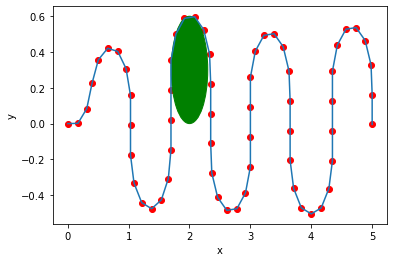

In [35]:
fig, ax = plt.subplots()

cercle = plt.Circle((xp, yp), R, color='g')

ax.plot(x,y)
ax.scatter(x,y,c='r')
ax.add_patch(cercle)

ax.set_ylabel("y")
ax.set_xlabel("x")

plt.show()